# **Data-Driven E-commerce Strategies: Leveraging Analytics from Exploration to Segmentation for Performance Optimization**

---

## 1. Project Overview

* **Business Context:**

Kestrel E-commerce, a rising star in the e-commerce industry, has experienced rapid growth since its inception in 2018, surpassing 30,000 customers and 50,000 transactions in its inaugural year. The company is experiencing fluctuations in monthly sales and profits, struggling to maintain consistent customer acquisition and retention rates, and lacks insights into customer segmentation. In today's competitive e-commerce landscape, understanding customer transaction data is crucial for success. To address these challenges, the company aims to identify seasonal trends, optimize sales performance, improve customer acquisition and retention strategies, and tailor personalized marketing campaigns for better customer engagement.

* **Objective:**

This project aims to leverage customer behavior data to answer key business questions and provide actionable insights for improving Kestrel E-commerce's performance. The objectives are:
  1. Exploratory Data Analysis (EDA): Conduct a thorough exploration of the transaction data to uncover patterns, trends, and relationships among different variables. This will involve descriptive statistics, data visualization, and exploratory data analysis techniques.
  2. Cohort Analysis: Analyze customer behavior based on their acquisition cohorts to understand customer retention rates, average quantity sold per cohort, and average total sales per cohort.
  3. Pareto Analysis: Identify the most significant factors (customers and products) driving sales and profit, allowing us to prioritize efforts for maximum impact.
  4. RFM Analysis: Segment customers based on their Recency, Frequency, and Monetary value using KMeans clustering. This segmentation will provide a foundation for personalized marketing and customer relationship management strategies.

* **Expected Outcomes:**
1. Data-driven insights: Comprehensive understanding of customer behavior, sales patterns, and key performance indicators.
2. Actionable recommendations: Specific strategies for optimizing marketing, enhancing customer retention, and elevate overall business performance.
3. Customer segmentation model: A robust RFM model for targeted customer engagement.
4. Improved decision-making: Data-backed insights to inform marketing and business strategies.

* **Data Source:**

The primary data source for this project is the first year (2018) of transaction history of Kestrel E-commerce in the United States, obtained from Kaggle [https://www.kaggle.com/datasets/carrie1/ecommerce-data/data](https://www.kaggle.com/datasets/carrie1/ecommerce-data/data).  

* **Methodology:**

The project will follow these steps:
  1. Business Understanding: Defining the problem, understanding business needs, and setting clear objectives.
  2. Data Wrangling: Cleaning, transforming, and preparing the data for analysis.
  3. EDA: Exploring the data to identify trends, patterns, and relationships among variables.
  4. Cohort Analysis: Analyzing customer cohorts to understand retention and purchasing behavior.
  5. Pareto Analysis: Identifying the most significant factors driving sales and profit.
  6. RFM Analysis: Segmenting customers based on their purchasing patterns.
  7. Actionable Recommendations: Developing data-backed recommendations for Kestrel E-commerce.

By applying a rigorous data analysis approach, this project seeks to equip Kestrel E-commerce with the insights and recommendations necessary to optimize its marketing efforts, build stronger customer relationships, and achieve sustainable sales growth in the competitive e-commerce market.

---

## 2. Data Wrangling

### 2.1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import datetime
import random
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

from matplotlib.ticker import PercentFormatter
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', None)
pd.set_option("display.float_format", "{:.2f}".format)

### 2.2. Load Dataset

In [2]:
df = pd.read_csv('/content/2018_year_trx.csv')
df

Order_Date      Time  Aging  Customer_Id  Gender Device_Type  \
0      2018-01-02  10:56:33   8.00        37077  Female         Web   
1      2018-07-24  20:41:37   2.00        59173  Female         Web   
2      2018-11-08  08:38:49   8.00        41066  Female         Web   
3      2018-04-18  19:28:06   7.00        50741  Female         Web   
4      2018-08-13  21:18:39   9.00        53639  Female         Web   
...           ...       ...    ...          ...     ...         ...   
51277  2018-02-28  22:59:50   6.00        78489  Female      Mobile   
51278  2018-02-28  13:19:25   2.00        91941  Female      Mobile   
51279  2018-02-28  10:25:07   6.00        63313    Male         Web   
51280  2018-02-28  10:50:08   7.00        86485    Male         Web   
51281  2018-02-28  11:09:40   5.00        81129    Male         Web   

      Customer_Login_type    Product_Category            Product  Sales  \
0                  Member  Auto & Accessories  Car Media Players 140.00   
1                  Member  Auto & Accessories       Car Speakers 211.00   
2                  Member  Auto & Accessories    Car Body Covers 117.00   
3                  Member  Auto & Accessories    Car & Bike Care 118.00   
4                  Member  Auto & Accessories               Tyre 250.00   
...                   ...                 ...                ...    ...   
51277              Member    Home & Furniture          Shoe Rack 124.00   
51278              Member    Home & Furniture          Umbrellas  70.00   
51279              Member    Home & Furniture    Dinner Crockery 133.00   
51280              Member    Home & Furniture        Sofa Covers 216.00   
51281              Member    Home & Furniture         Bed Sheets 211.00   

       Quantity  Discount  Profit  Shipping_Cost Order_Priority Payment_method  
0          1.00      0.30   46.00           4.60         Medium    credit_card  
1          1.00      0.30  112.00          11.20         Medium    credit_card  
2          5.00      0.10   31.20           3.10       Critical    credit_card  
3          1.00      0.30   26.20           2.60           High    credit_card  
4          1.00      0.30  160.00          16.00       Critical    credit_card  
...         ...       ...     ...            ...            ...            ...  
51277      4.00      0.30   19.20           1.90         Medium    money_order  
51278      5.00      0.20   14.00           1.40         Medium    credit_card  
51279      1.00      0.30   39.70           4.00         Medium    credit_card  
51280      1.00      0.20  131.70          13.20         Medium    credit_card  
51281      5.00      0.30   99.40           9.90         Medium    credit_card  

[51282 rows x 16 columns]

### 2.3. Data Understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51282 entries, 0 to 51281
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order_Date           51282 non-null  object 
 1   Time                 51282 non-null  object 
 2   Aging                51282 non-null  float64
 3   Customer_Id          51282 non-null  int64  
 4   Gender               51282 non-null  object 
 5   Device_Type          51282 non-null  object 
 6   Customer_Login_type  51282 non-null  object 
 7   Product_Category     51282 non-null  object 
 8   Product              51282 non-null  object 
 9   Sales                51282 non-null  float64
 10  Quantity             51282 non-null  float64
 11  Discount             51282 non-null  float64
 12  Profit               51282 non-null  float64
 13  Shipping_Cost        51282 non-null  float64
 14  Order_Priority       51282 non-null  object 
 15  Payment_method       51282 non-null 

In [4]:
print("First Transactions {}".format(df.Order_Date.min()))
print("Last Transactions {}".format(df.Order_Date.max()))
print("Day of Transactions {}".format(df.Order_Date.nunique()),"Days")

First Transactions 2018-01-01
Last Transactions 2018-12-30
Day of Transactions 356 Days


The dataset describes the first year of transaction history of **Kestrel E-commerce** in the United States. Consist of 16 features and > 50.000 trx rows:

* `Order_Date`: The date the product was ordered.
* `Aging`: The time from the day the product is ordered to the day it is delivered.
* `Customer_Id`: Unique id created for each customer.
* `Gender`: Gender of customer.
* `Device_Type`: The device the customer uses to actualize the transaction (Web/Mobile).
* `Customer_Login_Type`: The type the customer logged in. Such as Member, Guest etc.
* `Product_Category`: The category of each products.
* `Product`: The description of products.
* `Sales`: Total sales amount (product price * quantity)
* `Quantity`: Unit amount of product.
* `Discount`: Percent discount rate.
* `Profit`: Profit.
* `Shipping_Cost`: Shipping cost.
* `Order_Priority`: Order priority. Such as critical, high etc.
* `Payment_method`: Payment method.

### 2.4. Data Inspection

#### 2.4.1. Missing Value

In [5]:
df.isnull().sum().sum()

0

<Axes: >

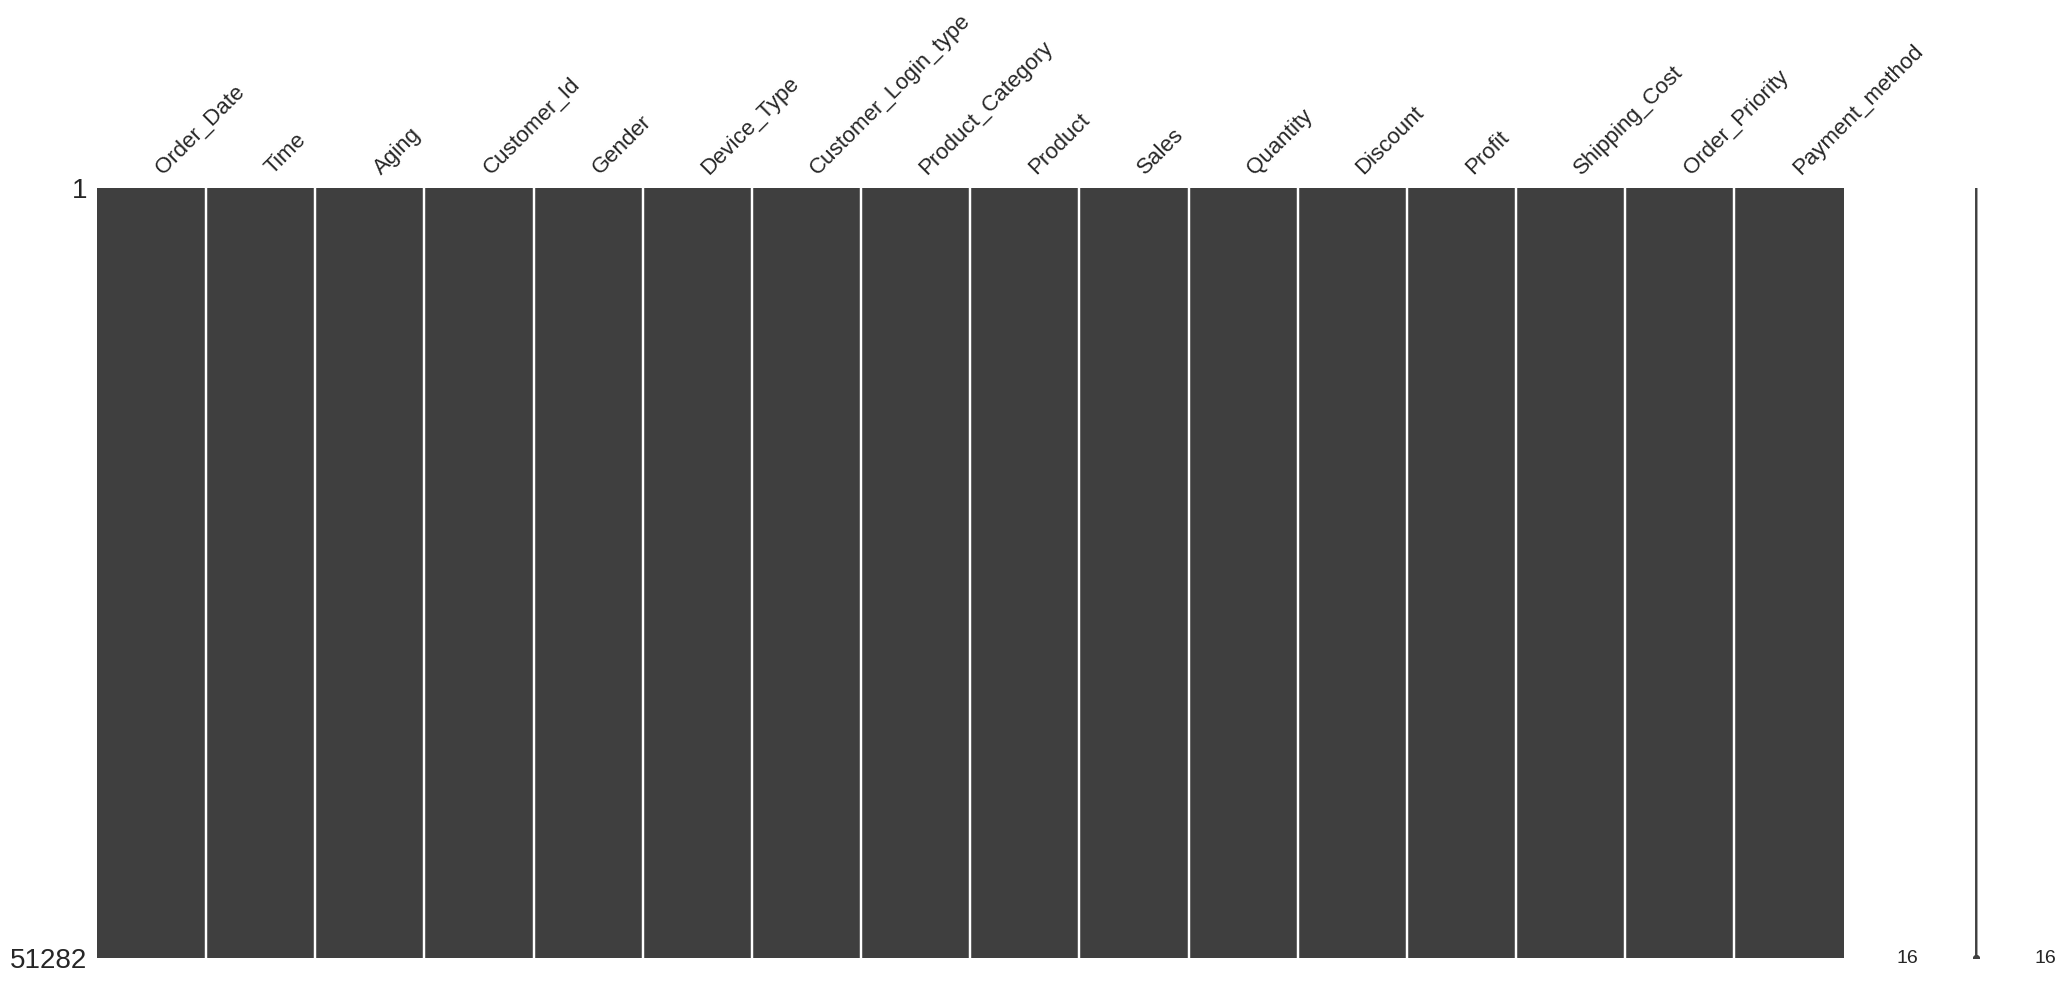

In [6]:
msno.matrix(df)

Nice, no missing values!

#### 2.4.2. Duplicate Check

In [7]:
df.duplicated().sum()

0

No duplicated too!

**The Dataset is Clean**

#### 2.4.3. Data Transform

In [8]:
# Change Datetime features to datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# Create new seasonality features, parse the date time into one single feature
df['Year'] = df['Order_Date'].dt.year
df['Quarter'] = df['Order_Date'].dt.quarter
df['Month'] = df['Order_Date'].dt.month
df['Week'] = df['Order_Date'].dt.isocalendar().week
df['Day_of_Week'] = df['Order_Date'].dt.dayofweek
df['Day'] = df['Order_Date'].dt.day
df['Hour'] = df['Time'].str.split(':').str[0].astype(int)

# Change Customer Id to object
df.Customer_Id = df.Customer_Id.astype('object')

In [9]:
df.head(1)

Order_Date      Time  Aging Customer_Id  Gender Device_Type  \
0 2018-01-02  10:56:33   8.00       37077  Female         Web   

  Customer_Login_type    Product_Category            Product  Sales  Quantity  \
0              Member  Auto & Accessories  Car Media Players 140.00      1.00   

   Discount  Profit  Shipping_Cost Order_Priority Payment_method  Year  \
0      0.30   46.00           4.60         Medium    credit_card  2018   

   Quarter  Month  Week  Day_of_Week  Day  Hour  
0        1      1     1            1    2    10

## 3. Exploratory Data Analysis

We're starting the first step of analysis: identifying trends, patterns, and relationships among different variables. This will involve using descriptive statistics, data visualization techniques, and exploratory data analysis (EDA) methods. We aim to gain valuable insights into sales dynamics and uncover factors influencing sales.

### 3.1. Statistical Summary

* Categorical Features

In [10]:
df.describe(include='object').T

count unique          top   freq
Time                 51282  35273     19:54:45      7
Customer_Id          51282  38990        95831      6
Gender               51282      2         Male  28132
Device_Type          51282      2          Web  47624
Customer_Login_type  51282      4       Member  49089
Product_Category     51282      4      Fashion  25646
Product              51282     42        Suits   2332
Order_Priority       51282      4       Medium  29432
Payment_method       51282      5  credit_card  38131

Well done, in summary from categorical features, we already know that there were 38.990 customers and 42 SKU products in Kestrel E-commerce in 2018.

* Numerical Features

In [11]:
df.describe().T

count                           mean                  min  \
Order_Date       51282  2018-07-23 11:35:56.124956160  2018-01-01 00:00:00   
Aging         51282.00                           5.26                 1.00   
Sales         51282.00                         152.34                33.00   
Quantity      51282.00                           2.50                 1.00   
Discount      51282.00                           0.30                 0.10   
Profit        51282.00                          70.40                 0.50   
Shipping_Cost 51282.00                           7.04                 0.10   
Year          51282.00                        2018.00              2018.00   
Quarter       51282.00                           2.74                 1.00   
Month         51282.00                           7.24                 1.00   
Week          51282.00                          29.65                 1.00   
Day_of_Week   51282.00                           2.92                 0.00   
Day           51282.00                          15.52                 1.00   
Hour          51282.00                          14.77                 0.00   

                               25%                  50%                  75%  \
Order_Date     2018-05-07 00:00:00  2018-07-28 00:00:00  2018-10-17 00:00:00   
Aging                         3.00                 5.00                 8.00   
Sales                        85.00               133.00               218.00   
Quantity                      1.00                 2.00                 4.00   
Discount                      0.20                 0.30                 0.40   
Profit                       24.90                59.90               118.40   
Shipping_Cost                 2.50                 6.00                11.80   
Year                       2018.00              2018.00              2018.00   
Quarter                       2.00                 3.00                 4.00   
Month                         5.00                 7.00                10.00   
Week                         19.00                30.00                42.00   
Day_of_Week                   1.00                 3.00                 5.00   
Day                           8.00                16.00                23.00   
Hour                         11.00                15.00                19.00   

                               max   std  
Order_Date     2018-12-30 00:00:00   NaN  
Aging                        10.50  2.96  
Sales                       250.00 66.49  
Quantity                      5.00  1.51  
Discount                      0.50  0.13  
Profit                      167.50 48.73  
Shipping_Cost                16.80  4.87  
Year                       2018.00  0.00  
Quarter                       4.00  1.05  
Month                        12.00  3.23  
Week                         52.00 14.05  
Day_of_Week                   6.00  2.01  
Day                          30.00  8.63  
Hour                         23.00  5.33

The data looks nice, there were no negative values in the min columns. The max columns seem clear without extreme values in continuous numeric features like `Sales` and `Profit` based on the distance from 75 % percentile of data.

### 3.2. The Distribution of Features

#### 3.2.1. Categorical

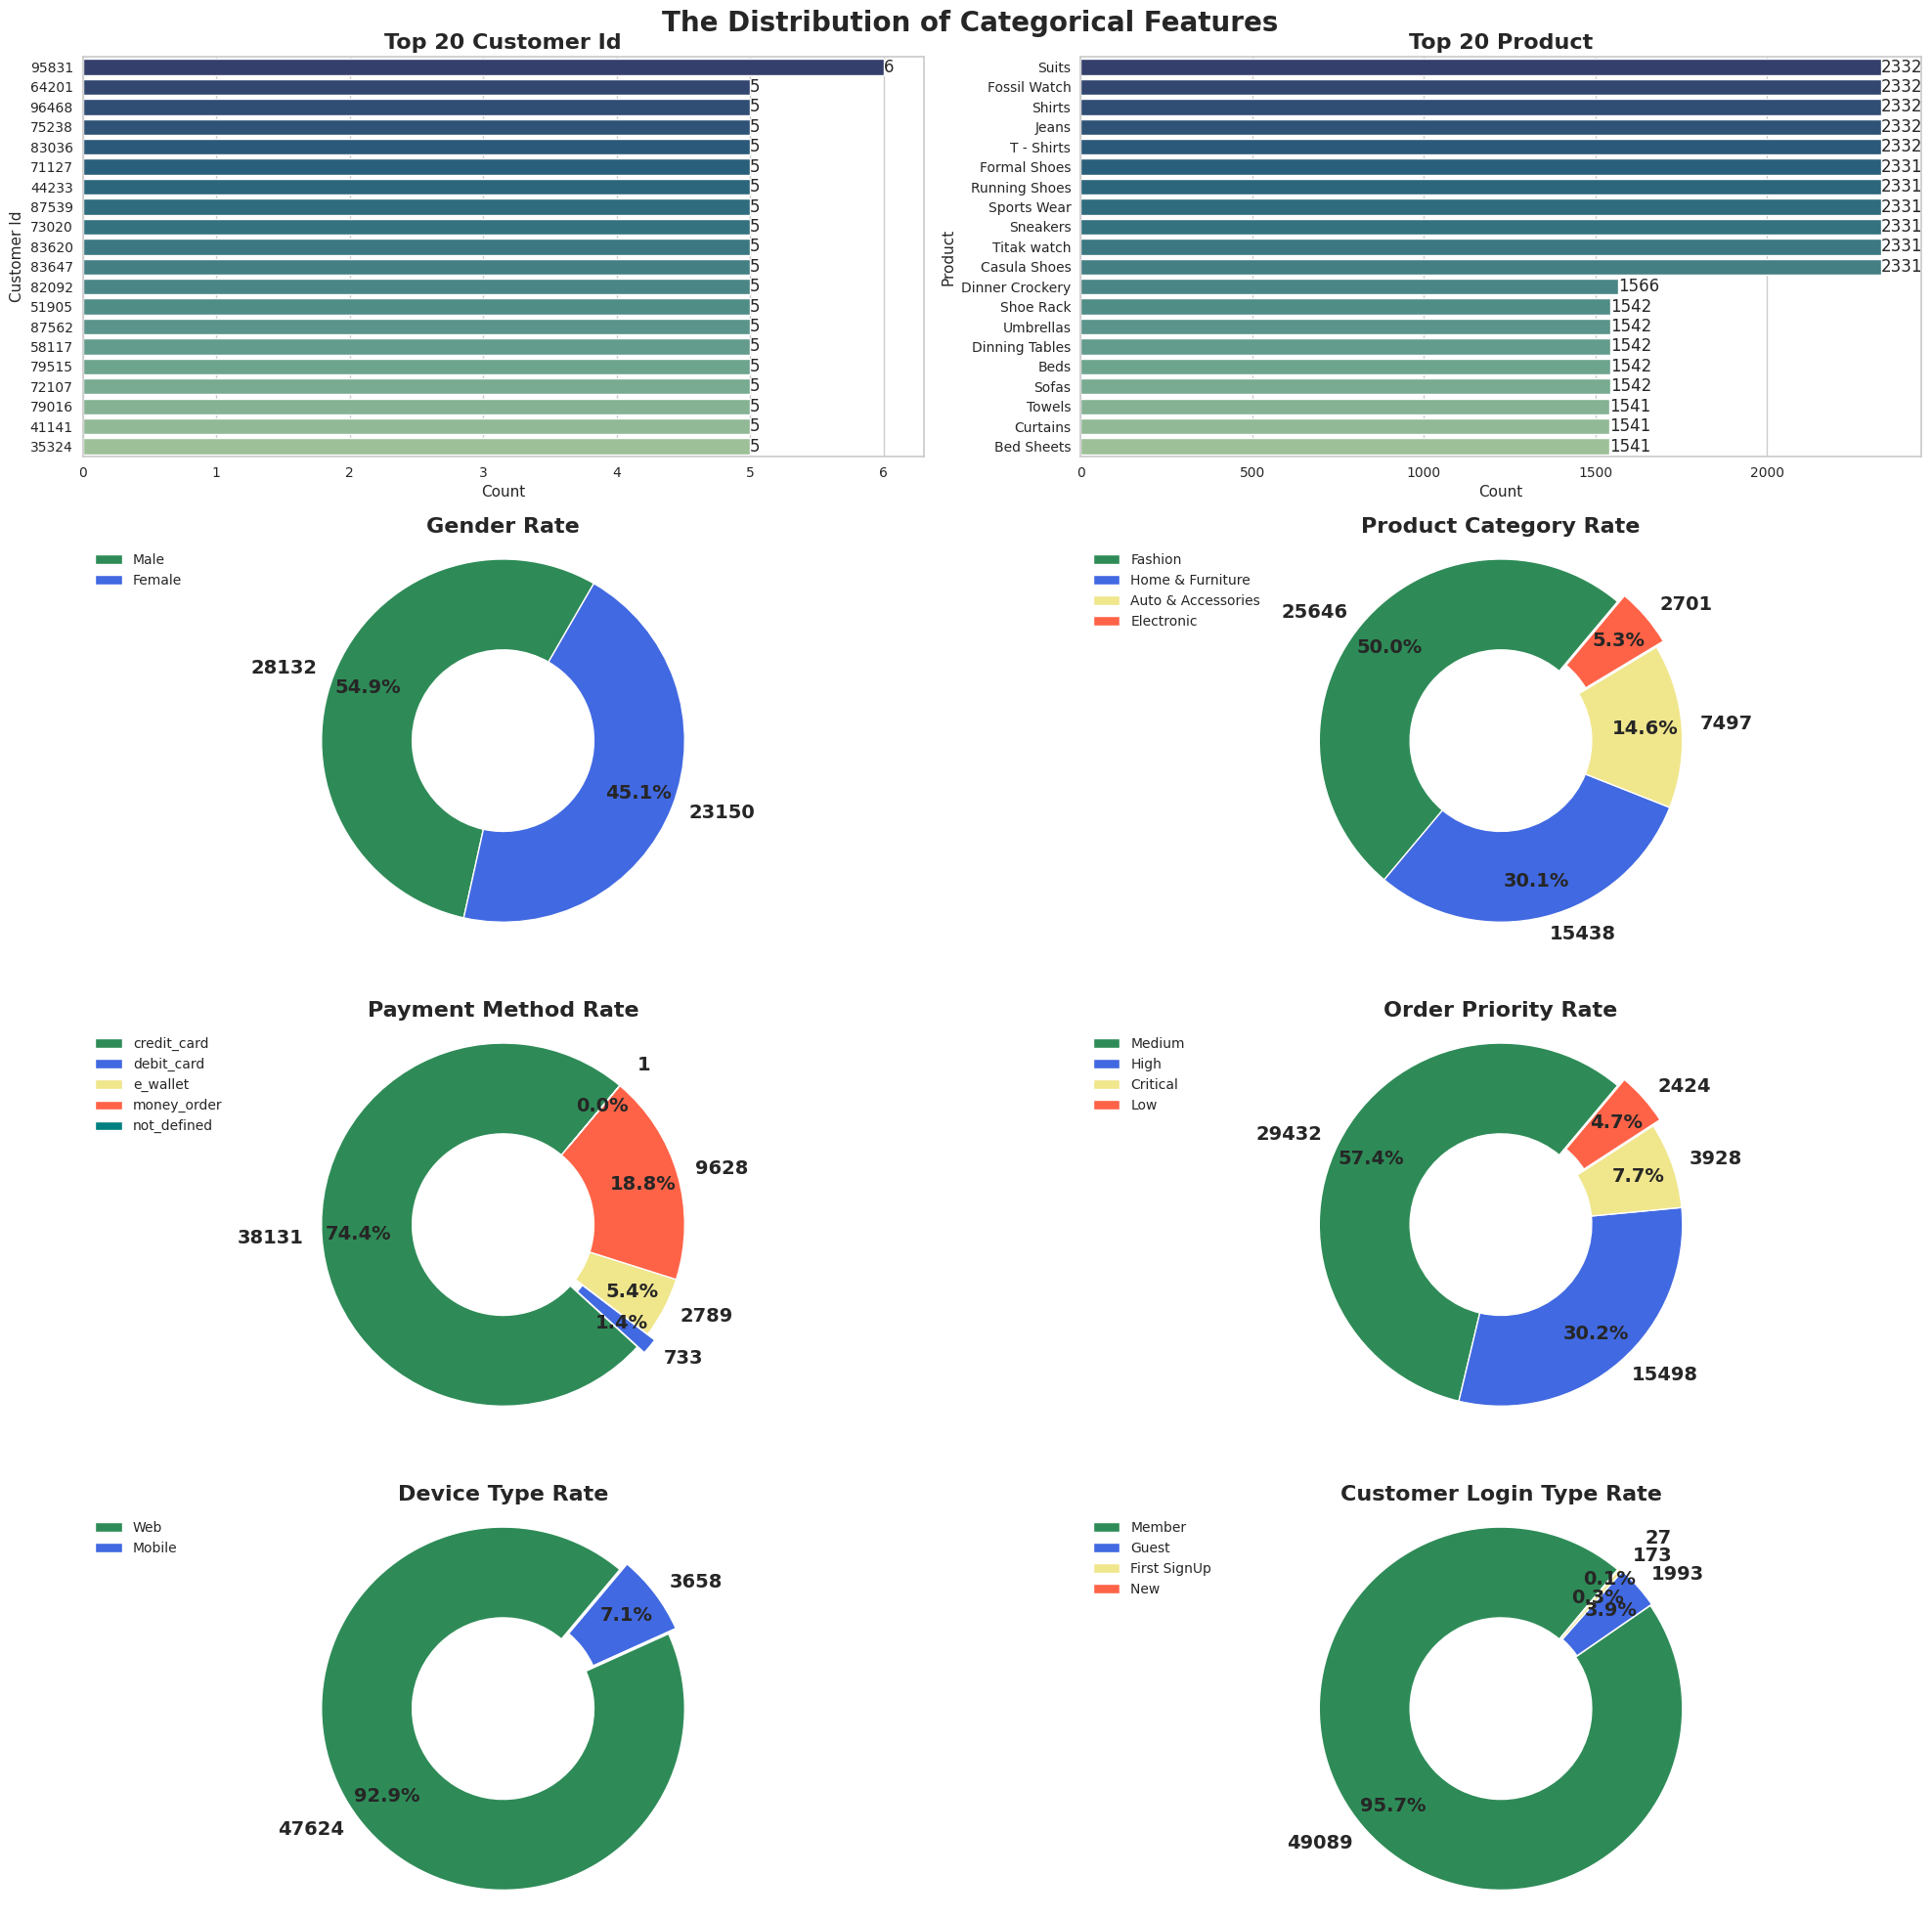

In [12]:
fig, axs = plt.subplots(4, 2, figsize=(20, 20))
plt.suptitle('The Distribution of Categorical Features', fontsize=20, fontweight='bold', ha='center')
sns.set_theme()

# Customer_Id
cust_20 = df['Customer_Id'].value_counts().sort_values(ascending=False).head(20)
cust_20 = cust_20.reset_index()
cust_20['Customer_Id'] = cust_20['Customer_Id'].astype(str)
ax = sns.barplot(y='Customer_Id', x=cust_20.columns[1], ax=axs[0, 0], palette='crest_r', data=cust_20)
for p in axs[0, 0].containers:
    axs[0, 0].bar_label(p, label_type='edge')
axs[0, 0].set_ylabel('Customer Id')
axs[0, 0].set_xlabel('Count')
axs[0, 0].set_title('Top 20 Customer Id', fontsize=16, fontweight='bold')

# Products
prod_20 = df['Product'].value_counts().sort_values(ascending=False).head(20)
prod_20 = prod_20.reset_index()
prod_20['Product'] = prod_20['Product'].astype(str)
ax = sns.barplot(y='Product', x=prod_20.columns[1], ax=axs[0, 1], palette='crest_r', data=prod_20)
for p in axs[0, 1].containers:
    axs[0, 1].bar_label(p, label_type='edge')
axs[0, 1].set_ylabel('Product')
axs[0, 1].set_xlabel('Count')
axs[0, 1].set_title('Top 20 Product', fontsize=16, fontweight='bold')

# Gender
gender_count = df['Gender'].value_counts().reset_index()
gender_count.columns = ['Gender', 'Count']
labels = gender_count['Count'].astype(str)
values = gender_count['Count']
axs[1, 0].pie(values, autopct='%1.1f%%', textprops={'fontsize': 14, 'fontweight': 'bold'}, labels=labels,
              colors=['seagreen', 'royalblue'], wedgeprops=dict(width=0.5), pctdistance=0.8, startangle=60)
axs[1, 0].set_title('Gender Rate', fontsize=16, fontweight='bold')
axs[1, 0].legend(labels = gender_count['Gender'], fontsize=10, loc='upper left')
axs[1, 0].axis('equal')

# Product Category
cat_count = df['Product_Category'].value_counts().reset_index()
cat_count.columns = ['Product_Category', 'Count']
labels = cat_count['Count'].astype(str)
values = cat_count['Count']
explode = [0, 0, 0, 0.05]
axs[1,1].pie(values, autopct='%1.1f%%', textprops={'fontsize': 14, 'fontweight': 'bold'}, labels=labels,
             colors=['seagreen', 'royalblue', 'khaki', 'tomato'], wedgeprops=dict(width=0.5),
             pctdistance=0.8, startangle=50, explode=explode)
axs[1,1].set_title('Product Category Rate', fontsize=16, fontweight='bold')
axs[1,1].legend(labels = cat_count['Product_Category'], fontsize=10, loc='upper left')
axs[1,1].axis('equal')

# Payment Method
pay_count = df['Payment_method'].value_counts().reset_index()
pay_count = pay_count.sort_values(by='Payment_method')
pay_count.columns = ['Payment_method', 'Count']
labels = pay_count['Count'].astype(str)
values = pay_count['Count']
explode = [0, 0.05, 0, 0, 0.05]
axs[2,0].pie(values, autopct='%1.1f%%', textprops={'fontsize': 14, 'fontweight': 'bold'}, labels=labels,
             colors=['seagreen', 'royalblue', 'khaki', 'tomato', 'teal'], wedgeprops=dict(width=0.5),
             pctdistance=0.8, startangle=50, explode=explode)
axs[2,0].set_title('Payment Method Rate', fontsize=16, fontweight='bold')
axs[2,0].legend(labels = pay_count['Payment_method'], fontsize=10, loc='upper left')
axs[2,0].axis('equal')

# Order Priority
order_count = df['Order_Priority'].value_counts().reset_index()
order_count.columns = ['Order_Priority', 'Count']
labels = order_count['Count'].astype(str)
values = order_count['Count']
explode = [0, 0, 0, 0.05]
axs[2,1].pie(values, autopct='%1.1f%%', textprops={'fontsize': 14, 'fontweight': 'bold'}, labels=labels,
             colors=['seagreen', 'royalblue', 'khaki', 'tomato'], wedgeprops=dict(width=0.5),
             pctdistance=0.8, startangle=50, explode=explode)
axs[2,1].set_title('Order Priority Rate', fontsize=16, fontweight='bold')
axs[2,1].legend(labels = order_count['Order_Priority'], fontsize=10, loc='upper left')
axs[2,1].axis('equal')

# Device Type
device_count = df['Device_Type'].value_counts().reset_index()
device_count.columns = ['Device_Type', 'Count']
labels = device_count['Count'].astype(str)
values = device_count['Count']
explode = [0, 0.05]
axs[3,0].pie(values, autopct='%1.1f%%', textprops={'fontsize': 14, 'fontweight': 'bold'}, labels=labels,
             colors=['seagreen', 'royalblue'], wedgeprops=dict(width=0.5), pctdistance=0.8, startangle=50,
             explode=explode)
axs[3,0].set_title('Device Type Rate', fontsize=16, fontweight='bold')
axs[3,0].legend(labels = device_count['Device_Type'], fontsize=10, loc='upper left')
axs[3,0].axis('equal')

# Login Type
login_count = df['Customer_Login_type'].value_counts().reset_index()
login_count.columns = ['Customer_Login_type', 'Count']
labels = login_count['Count'].astype(str)
values = login_count['Count']
explode = [0.01, 0, 0, 0.12]
axs[3,1].pie(values, autopct='%1.1f%%', textprops={'fontsize': 14, 'fontweight': 'bold'}, labels=labels,
             colors=['seagreen', 'royalblue', 'khaki', 'tomato'], wedgeprops=dict(width=0.5),
             pctdistance=0.8, startangle=50, explode=explode)
axs[3,1].set_title('Customer Login Type Rate', fontsize=16, fontweight='bold')
axs[3,1].legend(labels = login_count['Customer_Login_type'], fontsize=10, loc='upper left')
axs[3,1].axis('equal')

plt.tight_layout()
plt.show()

#### 3.2.2. Numerical

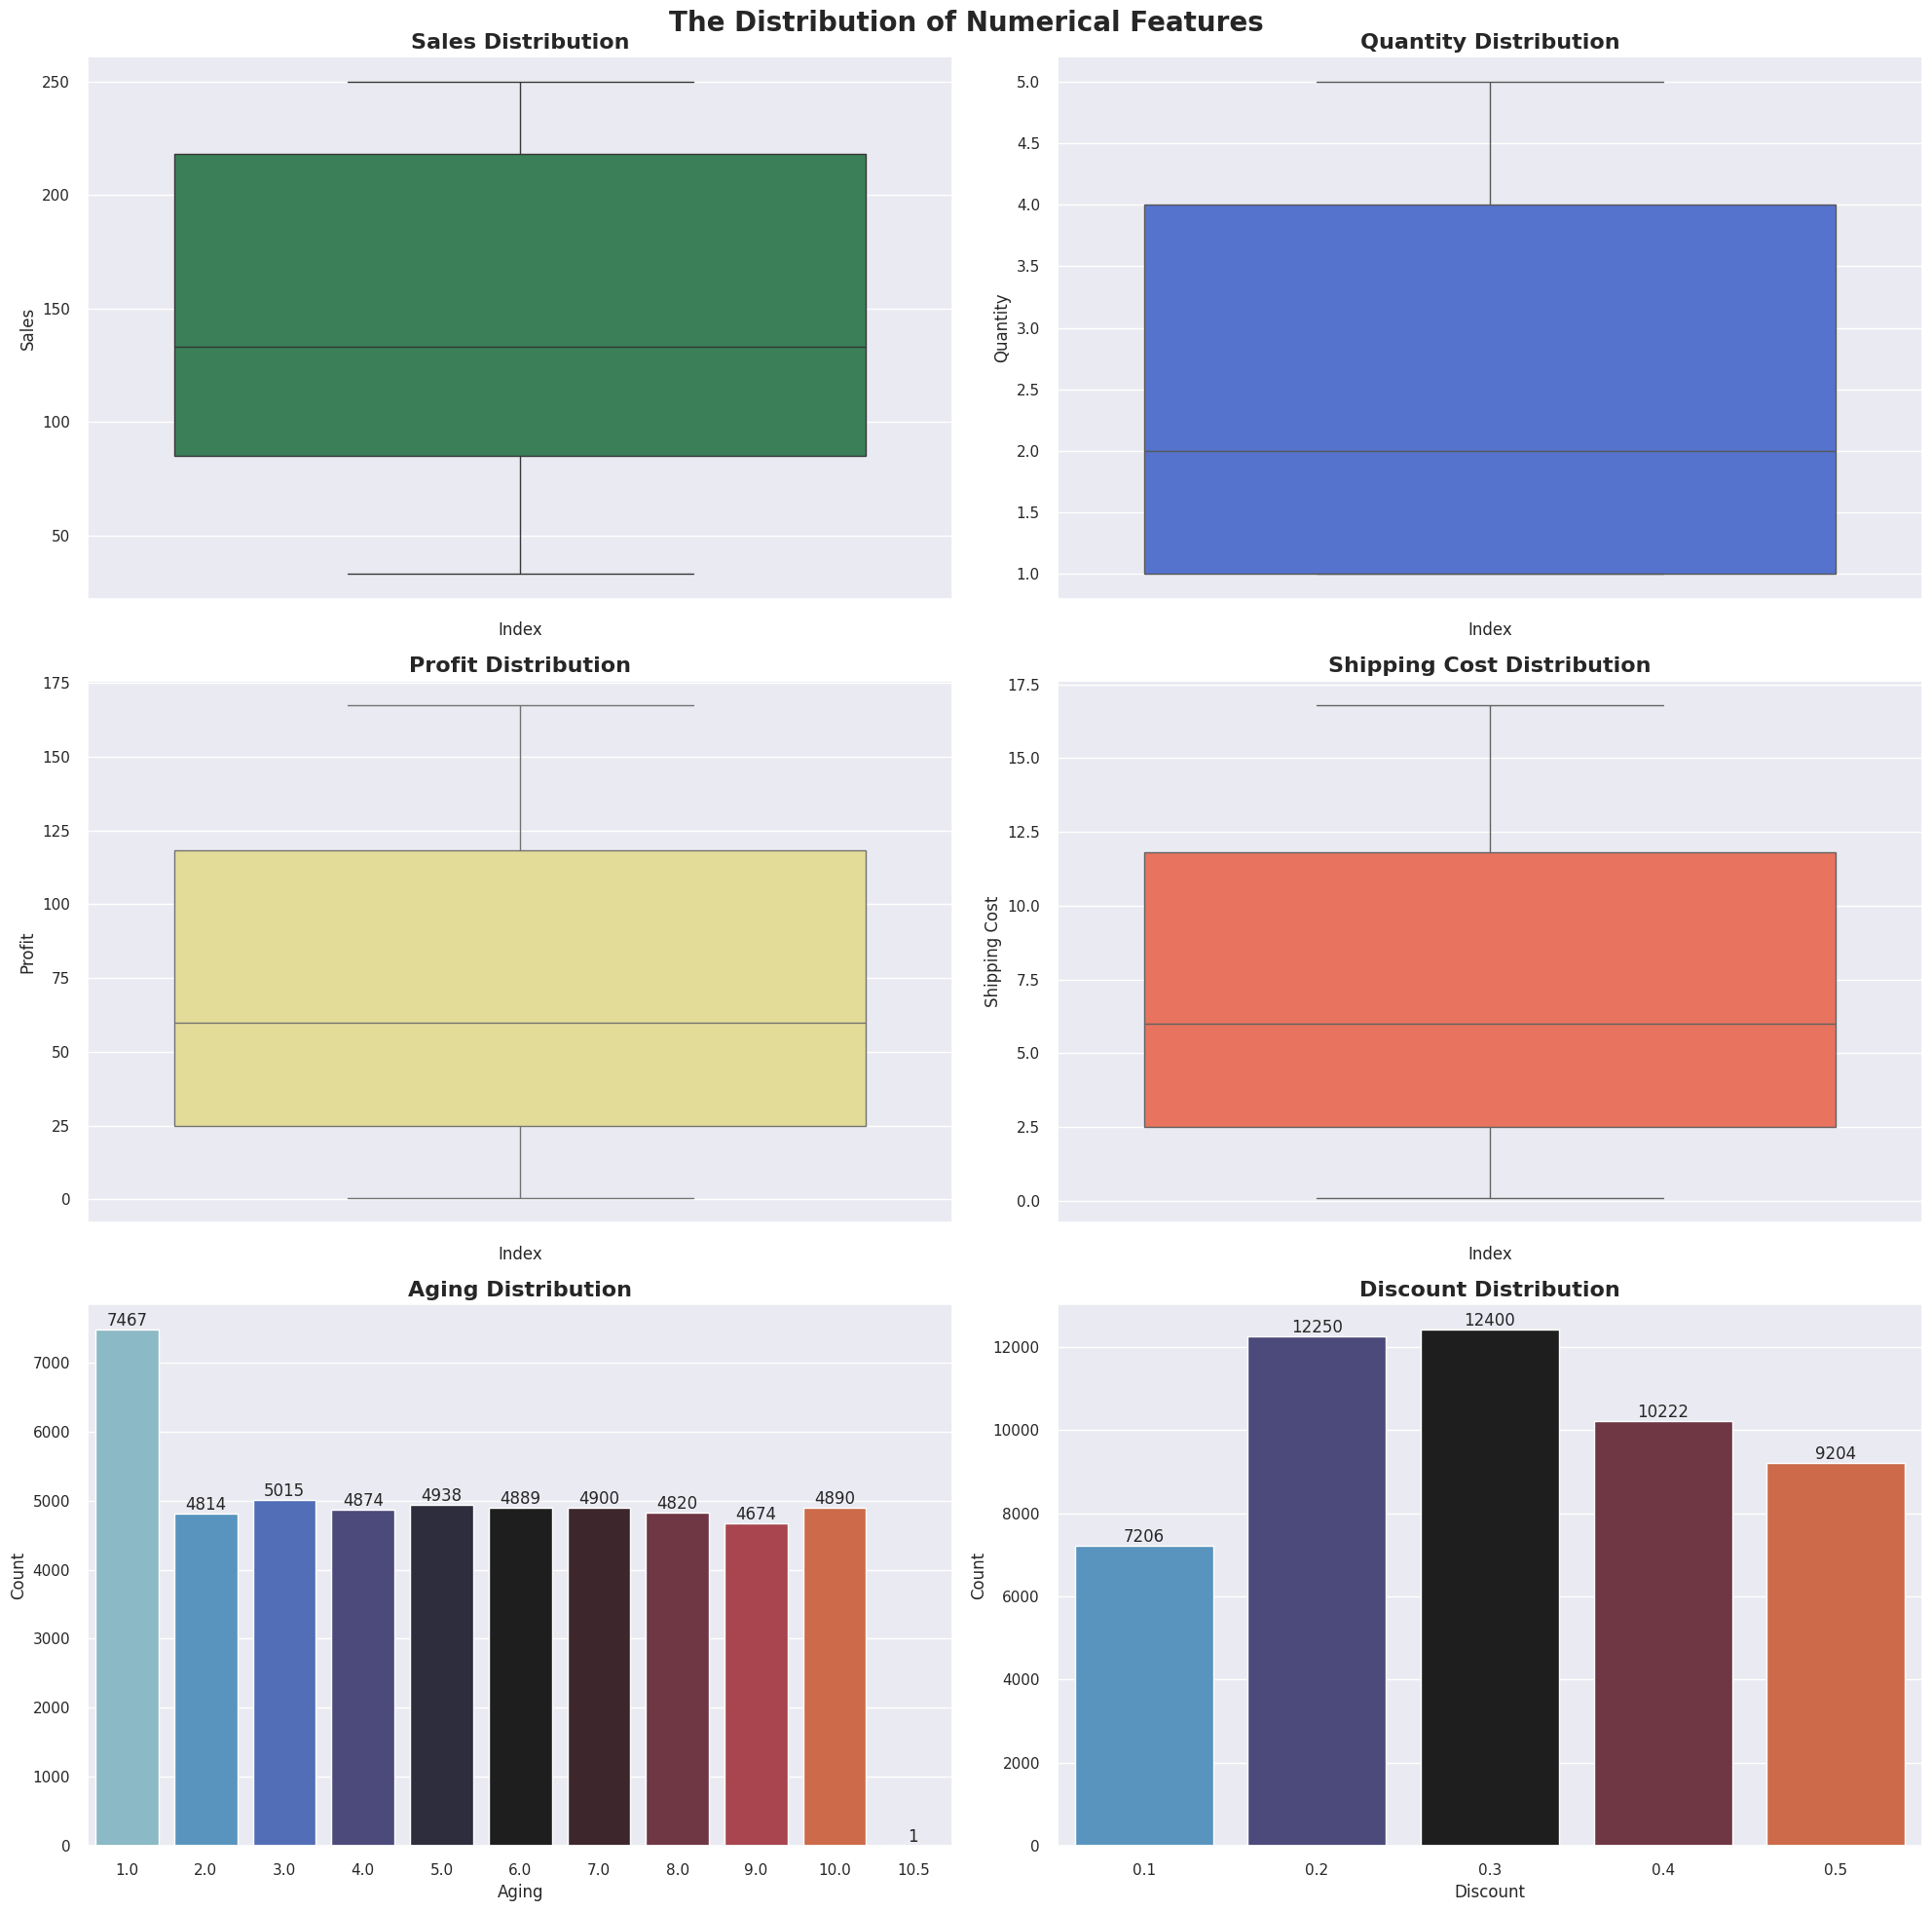

In [13]:
fig, axs = plt.subplots(3, 2, figsize=(20, 20))
plt.suptitle('The Distribution of Numerical Features', fontsize=20, fontweight='bold', ha='center')
sns.set_theme()

# Sales
sns.boxplot(y=df['Sales'], ax=axs[0, 0], color='seagreen')
axs[0, 0].set_ylabel('Sales')
axs[0, 0].set_xlabel('Index')
axs[0, 0].set_title('Sales Distribution', fontsize=16, fontweight='bold')

# Quantity
sns.boxplot(y=df['Quantity'], ax=axs[0, 1], color='royalblue')
axs[0, 1].set_ylabel('Quantity')
axs[0, 1].set_xlabel('Index')
axs[0, 1].set_title('Quantity Distribution', fontsize=16, fontweight='bold')

# Profit
sns.boxplot(y=df['Profit'], ax=axs[1, 0], color='khaki')
axs[1, 0].set_ylabel('Profit')
axs[1, 0].set_xlabel('Index')
axs[1, 0].set_title('Profit Distribution', fontsize=16, fontweight='bold')

# Shipping Cost
sns.boxplot(y=df['Shipping_Cost'], ax=axs[1, 1], color='tomato')
axs[1, 1].set_ylabel('Shipping Cost')
axs[1, 1].set_xlabel('Index')
axs[1, 1].set_title('Shipping Cost Distribution', fontsize=16, fontweight='bold')

# Aging
aging_count = df['Aging'].value_counts().reset_index()
ax = sns.barplot(x='Aging', y=aging_count.columns[1], data=aging_count, ax=axs[2, 0], palette='icefire')
for p in axs[2, 0].containers:
    axs[2, 0].bar_label(p, label_type='edge')
axs[2, 0].set_ylabel('Count')
axs[2, 0].set_xlabel('Aging')
axs[2, 0].set_title('Aging Distribution', fontsize=16, fontweight='bold')

# Discount
disc_count = df['Discount'].value_counts().reset_index()
ax = sns.barplot(x='Discount', y=disc_count.columns[1], data=disc_count, ax=axs[2, 1], palette='icefire')
for p in axs[2, 1].containers:
    axs[2, 1].bar_label(p, label_type='edge')
axs[2, 1].set_ylabel('Count')
axs[2, 1].set_xlabel('Discount')
axs[2, 1].set_title('Discount Distribution', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

### 3.3. Seasonality Analysis

#### 3.3.1. Sales Performance Trend

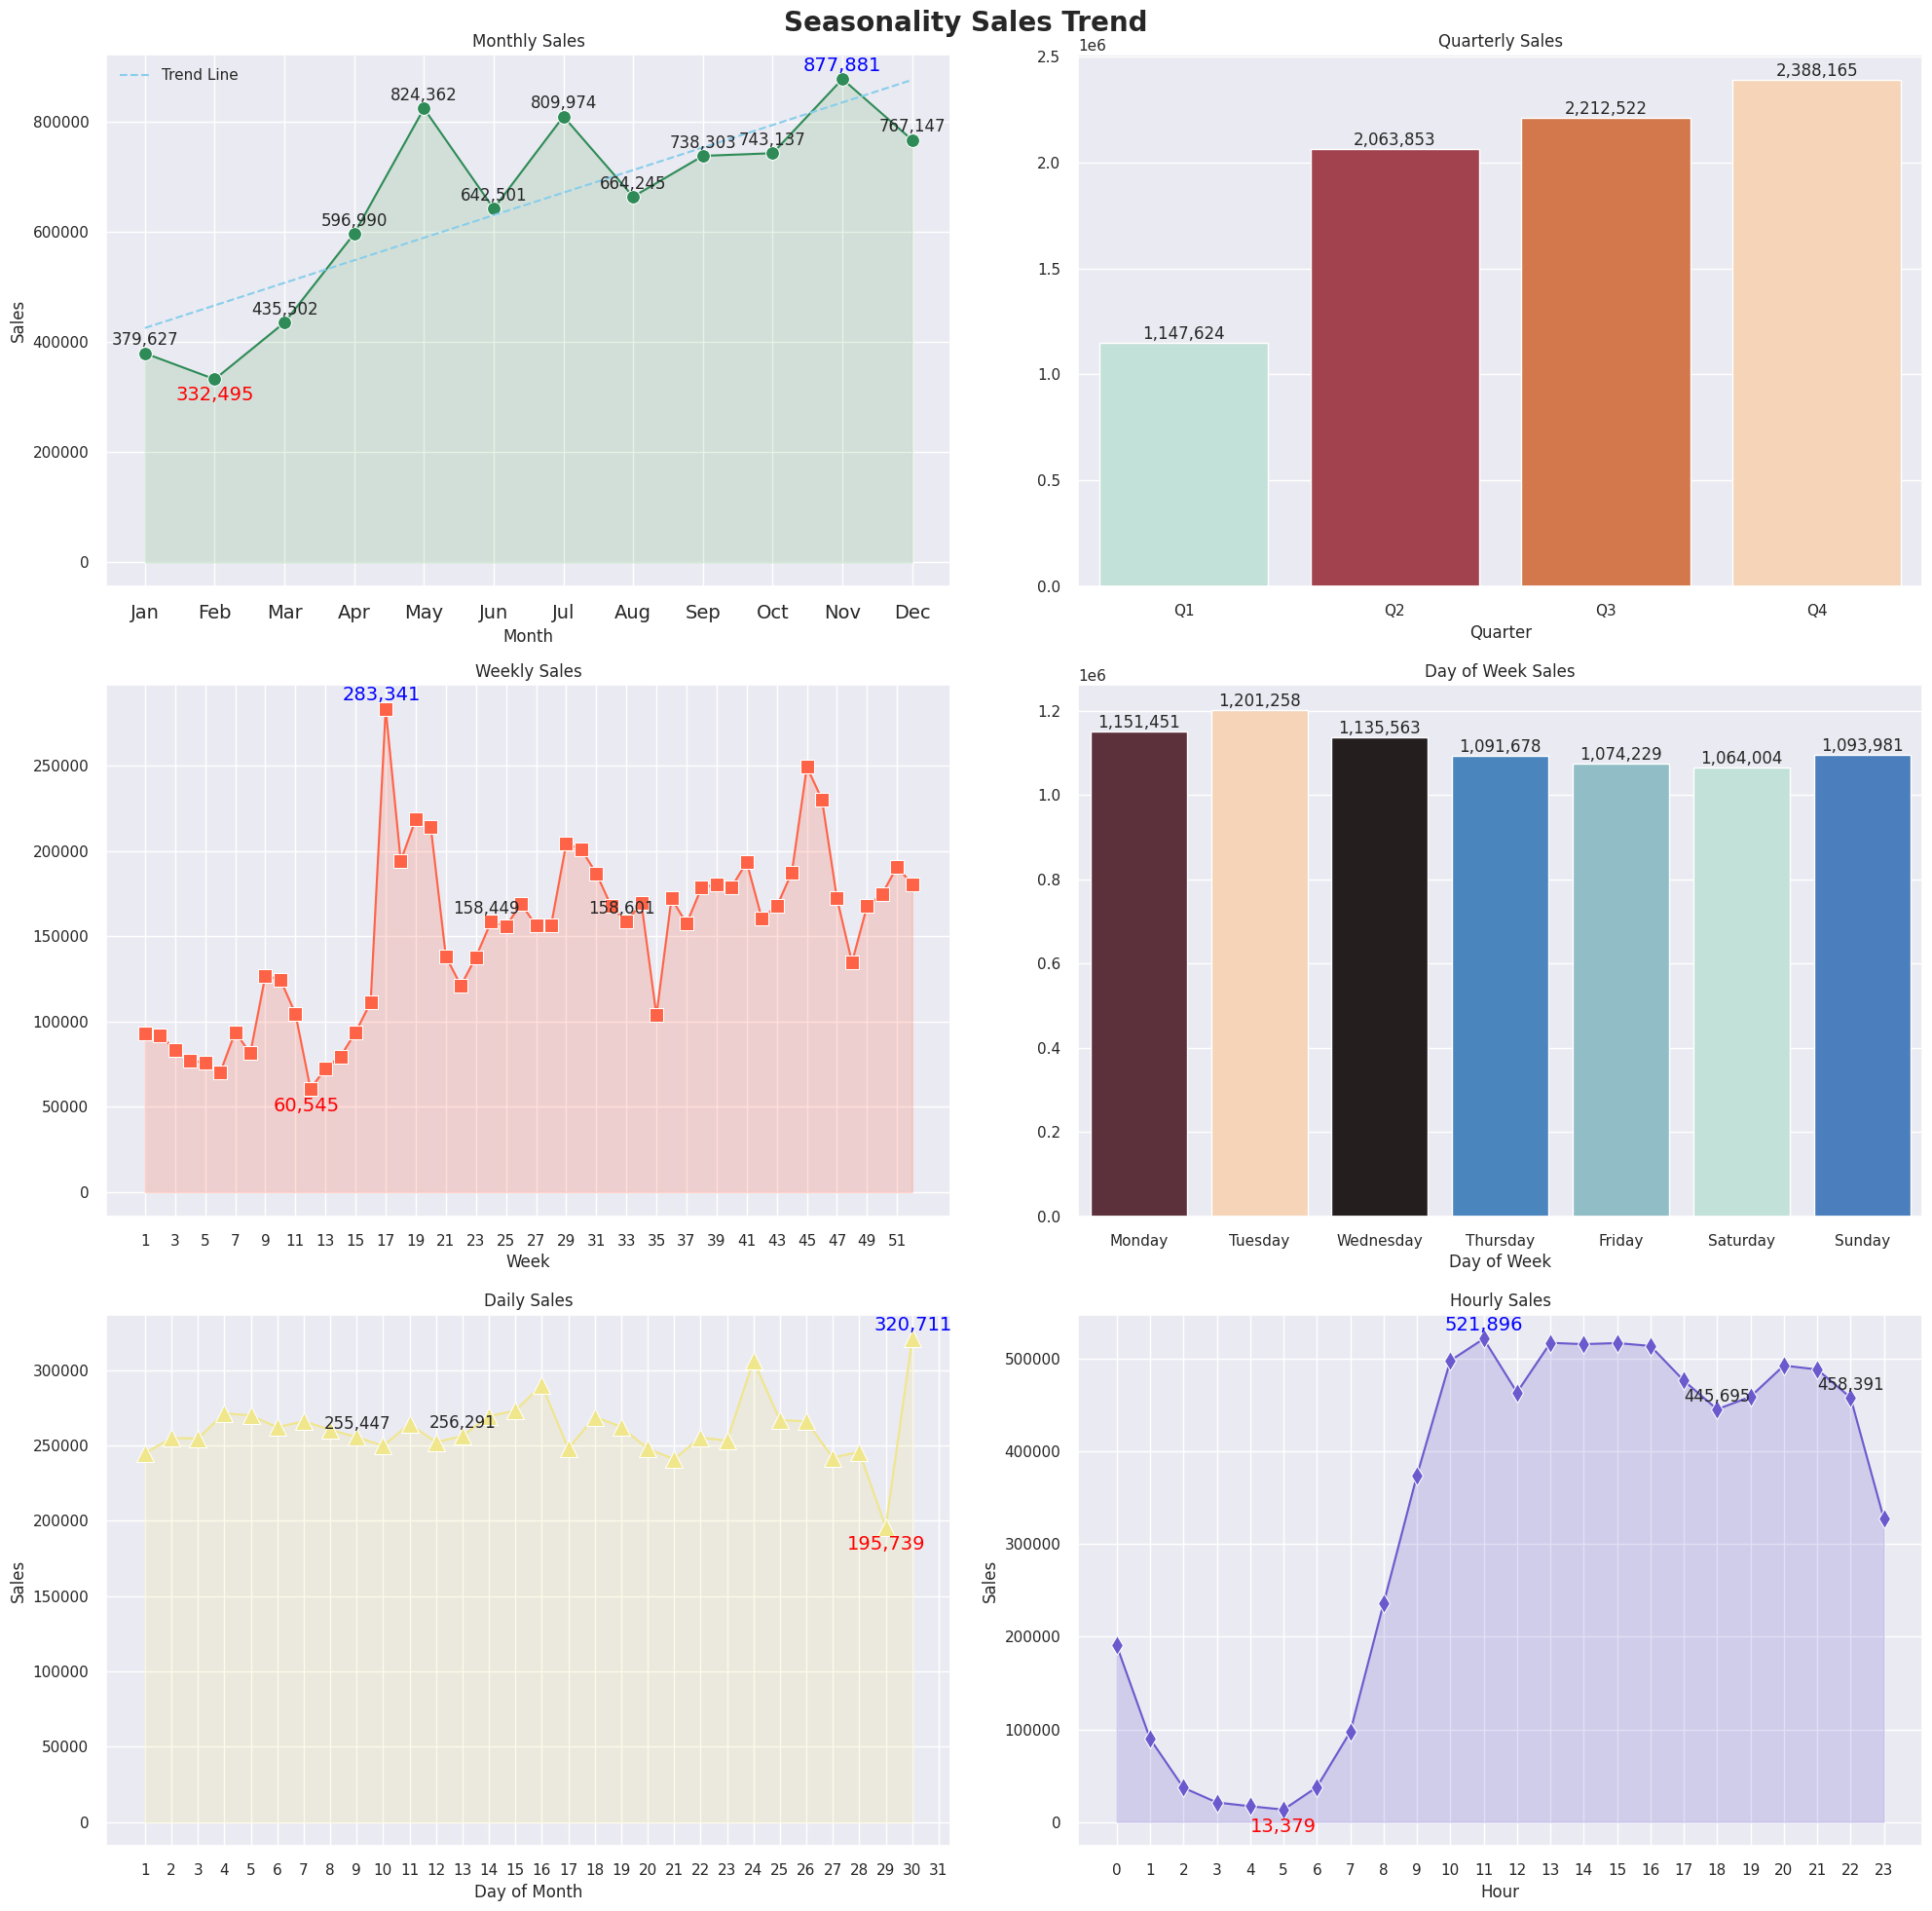

In [14]:
fig, axs = plt.subplots(3, 2, figsize=(20, 20))
plt.suptitle('Seasonality Sales Trend', fontsize=20, fontweight='bold', ha='center')

# Monthly
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()
sns.lineplot(x=monthly_sales.index, y='Sales', data=monthly_sales, marker='o',
             markersize=10, color='seagreen', ax=axs[0,0])
x = monthly_sales.index
y = monthly_sales['Sales']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
axs[0,0].plot(x, p(x), color='skyblue', linestyle='--', label='Trend Line')
for index, row in monthly_sales.iterrows():
  if row['Sales'] == monthly_sales['Sales'].max():
    axs[0,0].annotate(f"{row['Sales']:,.0f}", textcoords="offset points", fontsize=14,
                      xytext=(0, 6), ha='center', xy=(index, row['Sales']), color='blue')
  elif row['Sales'] == monthly_sales['Sales'].min():
    axs[0,0].annotate(f"{row['Sales']:,.0f}", textcoords="offset points", fontsize=14,
                      xytext=(0, -5), ha='center', va= 'top', xy=(index, row['Sales']), color='red')
  else:
    axs[0,0].annotate(f"{row['Sales']:,.0f}", textcoords="offset points",
                      xytext=(0, 6), ha='center', xy=(index, row['Sales']))
axs[0,0].fill_between(monthly_sales.index, monthly_sales['Sales'], color='green', alpha=0.1)
axs[0,0].set_title('Monthly Sales')
axs[0,0].set_xlabel('Month')
axs[0,0].set_ylabel('Sales')
axs[0,0].legend()
axs[0,0].set_xticks(range(0, 12, 1), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=14)

# Quarter
quarter_sales = df.groupby('Quarter')['Sales'].sum().reset_index()
cmap = sns.color_palette("icefire", as_cmap=True)
norm = plt.Normalize(quarter_sales['Sales'].min(), quarter_sales['Sales'].max())
colors = cmap(norm(quarter_sales['Sales']))
sns.barplot(x='Quarter', y='Sales', data=quarter_sales, ax=axs[0,1], palette=colors)
for p in axs[0,1].containers:
    axs[0,1].bar_label(p, label_type='edge', fmt='{:,.0f}'.format)
axs[0,1].set_title('Quarterly Sales')
axs[0,1].set_xlabel('Quarter')
axs[0,1].set_ylabel(' ')
axs[0,1].set_xticks(range(4))
axs[0,1].set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'])

# Weekly
weekly_sales = df.groupby('Week')['Sales'].sum().reset_index()
sns.lineplot(x='Week', y='Sales', data=weekly_sales, marker='s', color='tomato', markersize=10, ax=axs[1,0])
for index, row in weekly_sales.iterrows():
    if row['Sales'] == weekly_sales['Sales'].max():
        axs[1,0].annotate(f"{row['Sales']:,.0f}", textcoords="offset points", fontsize=14,
                          xytext=(8,6), ha='center', xy=(index, row['Sales']), color='blue')
    elif row['Sales'] == weekly_sales['Sales'].min():
        axs[1,0].annotate(f"{row['Sales']:,.0f}", textcoords="offset points", fontsize=14,
                          xytext=(8,-6), ha='center', va= 'top', xy=(index, row['Sales']), color='red')
    else:
        if row['Week'] in [33, 24]:
            axs[1,0].annotate(f"{row['Sales']:,.0f}", textcoords="offset points",
                            xytext=(8,6), ha='center', xy=(index, row['Sales']))
axs[1,0].fill_between(weekly_sales.index+1, weekly_sales['Sales'], color='tomato', alpha=0.2)
axs[1,0].set_title('Weekly Sales')
axs[1,0].set_xlabel('Week')
axs[1,0].set_ylabel(' ')
axs[1,0].set_xticks(range(1, 53, 2))

# Dayofweek
dow_sales = df.groupby('Day_of_Week')['Sales'].sum().reset_index()
cmap = sns.color_palette("icefire", as_cmap=True)
norm = plt.Normalize(dow_sales['Sales'].min(), dow_sales['Sales'].max())
colors = cmap(norm(dow_sales['Sales']))
sns.barplot(x='Day_of_Week', y='Sales', data=dow_sales, ax=axs[1,1], palette=colors)
for p in axs[1,1].containers:
    axs[1,1].bar_label(p, label_type='edge', fmt='{:,.0f}'.format)
axs[1,1].set_title('Day of Week Sales')
axs[1,1].set_xlabel('Day of Week')
axs[1,1].set_ylabel(' ')
axs[1,1].set_xticks(range(7))
axs[1,1].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Daily
daily_sales = df.groupby('Day')['Sales'].sum().reset_index()
sns.lineplot(x='Day', y='Sales', data=daily_sales, marker='^', markersize=13, color='khaki', ax=axs[2,0])
for index, row in daily_sales.iterrows():
    if row['Sales'] == daily_sales['Sales'].max():
        axs[2,0].annotate(f"{row['Sales']:,.0f}", textcoords="offset points", fontsize=14,
                          xytext=(20,6), ha='center', xy=(index, row['Sales']), color='blue')
    elif row['Sales'] == daily_sales['Sales'].min():
        axs[2,0].annotate(f"{row['Sales']:,.0f}", textcoords="offset points", fontsize=14,
                          xytext=(20,-6), ha='center', va= 'top', xy=(index, row['Sales']), color='red')
    else:
        if row['Day'] in [13, 9]:
            axs[2,0].annotate(f"{row['Sales']:,.0f}", textcoords="offset points",
                            xytext=(20,6), ha='center', xy=(index, row['Sales']))
axs[2,0].fill_between(daily_sales.index + 1, daily_sales['Sales'], color='khaki', alpha=0.2)
axs[2,0].set_title('Daily Sales')
axs[2,0].set_xlabel('Day of Month')
axs[2,0].set_ylabel('Sales')
axs[2,0].set_xticks(range(1, 32, 1))

# Hourly
hourly_sales = df.groupby('Hour')['Sales'].sum().reset_index()
sns.lineplot(x='Hour', y='Sales', data=hourly_sales, marker='d', color='slateblue', markersize=10, ax=axs[2,1])
for index, row in hourly_sales.iterrows():
    if row['Sales'] == hourly_sales['Sales'].max():
        axs[2,1].annotate(f"{row['Sales']:,.0f}", textcoords="offset points", fontsize=14,
                          xytext=(0,6), ha='center', xy=(index, row['Sales']), color='blue')
    elif row['Sales'] == hourly_sales['Sales'].min():
        axs[2,1].annotate(f"{row['Sales']:,.0f}", textcoords="offset points", fontsize=14,
                          xytext=(0,-6), ha='center', va= 'top', xy=(index, row['Sales']), color='red')
    else:
        if row['Hour'] in [22, 18]:
            axs[2,1].annotate(f"{row['Sales']:,.0f}", textcoords="offset points",
                            xytext=(0,6), ha='center', xy=(index, row['Sales']))
axs[2,1].fill_between(hourly_sales.index, hourly_sales['Sales'], color='slateblue', alpha=0.2)
axs[2,1].set_title('Hourly Sales')
axs[2,1].set_xlabel('Hour')
axs[2,1].set_ylabel('Sales')
axs[2,1].set_xticks(range(0, 24, 1))

plt.tight_layout()
plt.show()

Based on the seasonality sales trend, the sales are highest in November and May, with a dip in February. Across four quarters, sales are highest in Q4 and lowest in Q1. Then sales appear to fluctuate with a peak around week 17.

Sales on a peak around the 24th and 30th day of the month, but dip drasticly in 29th. Also highest sales on Tuesday and Monday, with a dip on Saturday. In the middle of afternoon and late evening are peak of sales, with a dip in the early morning.

#### 3.3.2. Month-Over-Month Changes Rate

##### 3.3.2.1. Sales



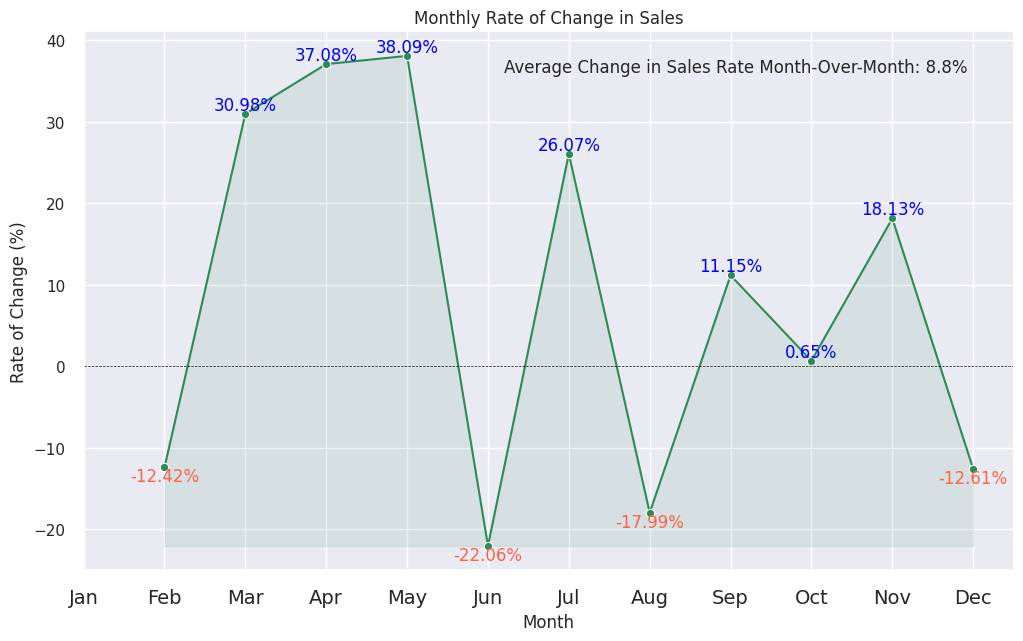

Year  Month     Sales  MoM_Change  Rate_Change
0   2018      1 379627.00         NaN          NaN
1   2018      2 332495.00   -47132.00       -12.42
2   2018      3 435502.00   103007.00        30.98
3   2018      4 596990.00   161488.00        37.08
4   2018      5 824362.00   227372.00        38.09
5   2018      6 642501.00  -181861.00       -22.06
6   2018      7 809974.00   167473.00        26.07
7   2018      8 664245.00  -145729.00       -17.99
8   2018      9 738303.00    74058.00        11.15
9   2018     10 743137.00     4834.00         0.65
10  2018     11 877881.00   134744.00        18.13
11  2018     12 767147.00  -110734.00       -12.61

In [15]:
monthly_rate_change = df.groupby(['Year','Month'])['Sales'].sum().reset_index()
monthly_rate_change['MoM_Change'] = monthly_rate_change['Sales'].diff()
monthly_rate_change['Rate_Change'] = (monthly_rate_change['MoM_Change'] / monthly_rate_change['Sales'].shift(1)) * 100

plt.figure(figsize=(12, 7))
sns.lineplot(x='Month', y='Rate_Change', data=monthly_rate_change, marker='o', color='seagreen')
text_to_add = f"Average Change in Sales Rate Month-Over-Month: {monthly_rate_change['Rate_Change'].mean():.1f}%"
plt.text(0.95, 0.95, text_to_add, transform=plt.gca().transAxes, ha='right', va='top')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5)
for x, y in zip(monthly_rate_change['Month'], monthly_rate_change['Rate_Change']):
  if y > 0:
    plt.text(x, y, f'{y:.2f}%', ha='center', va='bottom', color='blue')
  else:
    plt.text(x, y, f'{y:.2f}%', ha='center', va='top', color='tomato')
plt.fill_between(monthly_rate_change['Month'], monthly_rate_change['Rate_Change'], monthly_rate_change['Rate_Change'].min(),
                 color='seagreen', alpha=0.1)
plt.title('Monthly Rate of Change in Sales')
plt.xlabel('Month')
plt.ylabel('Rate of Change (%)')
plt.xticks(range(1, 13, 1), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=14)
plt.show()

monthly_rate_change

##### 3.3.2.2. Profit

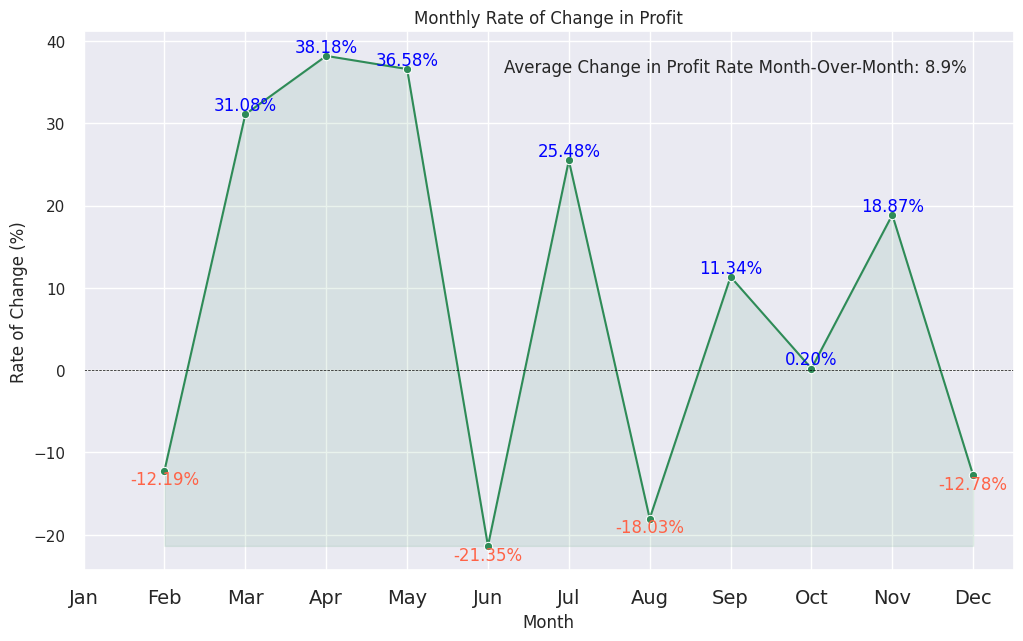

Year  Month    Profit  MoM_Change  Rate_Change
0   2018      1 174573.60         NaN          NaN
1   2018      2 153288.20   -21285.40       -12.19
2   2018      3 200936.80    47648.60        31.08
3   2018      4 277646.20    76709.40        38.18
4   2018      5 379205.80   101559.60        36.58
5   2018      6 298246.10   -80959.70       -21.35
6   2018      7 374242.90    75996.80        25.48
7   2018      8 306771.50   -67471.40       -18.03
8   2018      9 341558.10    34786.60        11.34
9   2018     10 342228.50      670.40         0.20
10  2018     11 406808.70    64580.20        18.87
11  2018     12 354838.50   -51970.20       -12.78

In [16]:
monthly_rate_change_profit = df.groupby(['Year','Month'])['Profit'].sum().reset_index()
monthly_rate_change_profit['MoM_Change'] = monthly_rate_change_profit['Profit'].diff()
monthly_rate_change_profit['Rate_Change'] = (monthly_rate_change_profit['MoM_Change'] / monthly_rate_change_profit['Profit'].shift(1)) * 100

plt.figure(figsize=(12, 7))
sns.lineplot(x='Month', y='Rate_Change', data=monthly_rate_change_profit, marker='o', color='seagreen')
text_to_add = f"Average Change in Profit Rate Month-Over-Month: {monthly_rate_change_profit['Rate_Change'].mean():.1f}%"
plt.text(0.95, 0.95, text_to_add, transform=plt.gca().transAxes, ha='right', va='top')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5)
for x, y in zip(monthly_rate_change_profit['Month'], monthly_rate_change_profit['Rate_Change']):
  if y > 0:
    plt.text(x, y, f'{y:.2f}%', ha='center', va='bottom', color='blue')
  else:
    plt.text(x, y, f'{y:.2f}%', ha='center', va='top', color='tomato')
plt.fill_between(monthly_rate_change_profit['Month'], monthly_rate_change_profit['Rate_Change'], monthly_rate_change_profit['Rate_Change'].min(),
                 color='seagreen', alpha=0.1)
plt.title('Monthly Rate of Change in Profit')
plt.xlabel('Month')
plt.ylabel('Rate of Change (%)')
plt.xticks(range(1, 13, 1), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=14)
plt.show()

monthly_rate_change_profit

## Additional EDA

#### Product Performance Trend

##### Product Categories

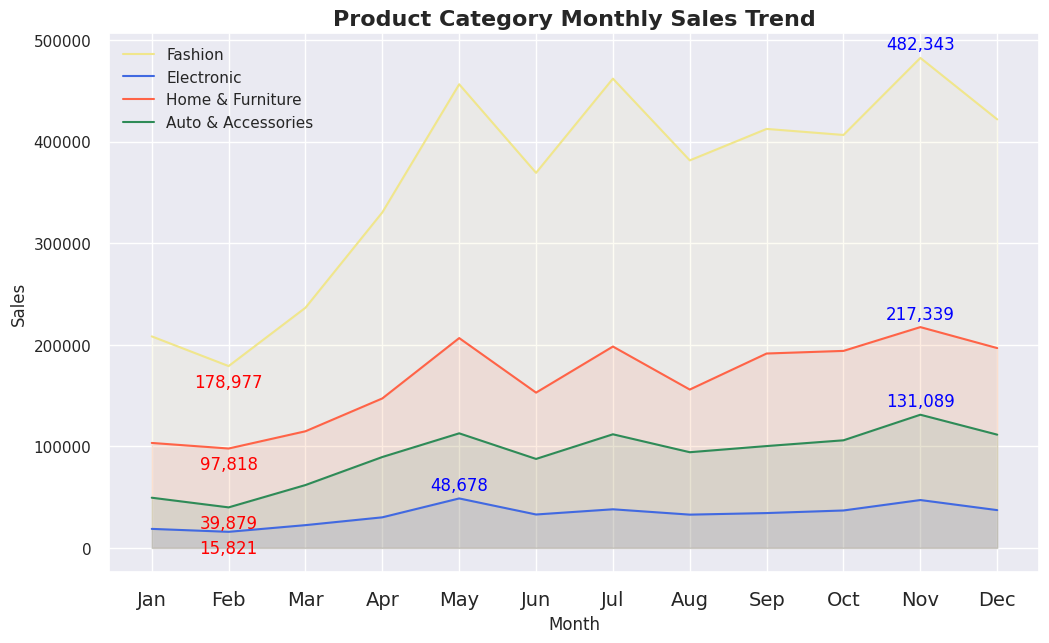

In [ ]:
fash_trend = df[df['Product_Category'] == 'Fashion'].groupby('Month')['Sales'].sum().reset_index()
elec_trend = df[df['Product_Category'] == 'Electronic'].groupby('Month')['Sales'].sum().reset_index()
home_trend = df[df['Product_Category'] == 'Home & Furniture'].groupby('Month')['Sales'].sum().reset_index()
auto_trend = df[df['Product_Category'] == 'Auto & Accessories'].groupby('Month')['Sales'].sum().reset_index()

plt.figure(figsize=(12, 7))
# Fashion
sns.lineplot(x='Month', y='Sales', data=fash_trend, color='khaki', label='Fashion')
for index, row in fash_trend.iterrows():
    if row['Sales'] == fash_trend['Sales'].max():
        plt.annotate(f"{row['Sales']:,.0f}", textcoords="offset points", fontsize=12,
                      xytext=(0,6), ha='center', xy=(row['Month'], row['Sales']), color='blue')
    else:
        if row['Sales'] == fash_trend['Sales'].min():
            plt.annotate(f"{row['Sales']:,.0f}", textcoords="offset points", fontsize=12,
                         xytext=(0,-5), ha='center', va= 'top', xy=(row['Month'], row['Sales']), color='red')
plt.fill_between(fash_trend['Month'], fash_trend['Sales'], color='khaki', alpha=0.1)
# Electronic
sns.lineplot(x='Month', y='Sales', data=elec_trend, color='royalblue', label='Electronic')
for index, row in elec_trend.iterrows():
    if row['Sales'] == elec_trend['Sales'].max():
        plt.annotate(f"{row['Sales']:,.0f}", textcoords="offset points", fontsize=12,
                      xytext=(0,6), ha='center', xy=(row['Month'], row['Sales']), color='blue')
    else:
        if row['Sales'] == elec_trend['Sales'].min():
            plt.annotate(f"{row['Sales']:,.0f}", textcoords="offset points", fontsize=12,
                         xytext=(0,-5), ha='center', va= 'top', xy=(row['Month'], row['Sales']), color='red')
plt.fill_between(elec_trend['Month'], elec_trend['Sales'], color='royalblue', alpha=0.1)
# Home & Furniture
sns.lineplot(x='Month', y='Sales', data=home_trend, color='tomato', label='Home & Furniture')
for index, row in home_trend.iterrows():
    if row['Sales'] == home_trend['Sales'].max():
        plt.annotate(f"{row['Sales']:,.0f}", textcoords="offset points", fontsize=12,
                      xytext=(0,6), ha='center', xy=(row['Month'], row['Sales']), color='blue')
    else:
        if row['Sales'] == home_trend['Sales'].min():
          plt.annotate(f"{row['Sales']:,.0f}", textcoords="offset points", fontsize=12,
                       xytext=(0,-5), ha='center', va= 'top', xy=(row['Month'], row['Sales']), color='red')
plt.fill_between(home_trend['Month'], home_trend['Sales'], color='tomato', alpha=0.1)
# Auto
sns.lineplot(x='Month', y='Sales', data=auto_trend, color='seagreen', label= 'Auto & Accessories')
for index, row in auto_trend.iterrows():
    if row['Sales'] == auto_trend['Sales'].max():
        plt.annotate(f"{row['Sales']:,.0f}", textcoords="offset points", fontsize=12,
                      xytext=(0,6), ha='center', xy=(row['Month'], row['Sales']), color='blue')
    else:
        if row['Sales'] == auto_trend['Sales'].min():
            plt.annotate(f"{row['Sales']:,.0f}", textcoords="offset points", fontsize=12,
                         xytext=(0,-5), ha='center', va= 'top', xy=(row['Month'], row['Sales']), color='red')
plt.fill_between(auto_trend['Month'], auto_trend['Sales'], color='seagreen', alpha=0.1)

plt.title('Product Category Monthly Sales Trend', fontsize=16, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(range(1, 13, 1), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=14)
plt.legend()
plt.show()

##### Products SKU

In [ ]:
# Fashion
monthly_fash_trend = df[df['Product_Category'] == 'Fashion'].groupby(['Month', 'Product']).agg({'Sales': 'sum', 'Quantity': 'sum'}).reset_index()
top_fash_by_month = monthly_fash_trend.loc[monthly_fash_trend.groupby('Month')['Sales'].idxmax()].reset_index(drop=True)
poor_fash_by_month = monthly_fash_trend.loc[monthly_fash_trend.groupby('Month')['Sales'].idxmin()].reset_index(drop=True)
# Electric
monthly_elec_trend = df[df['Product_Category'] == 'Electronic'].groupby(['Month', 'Product']).agg({'Sales': 'sum', 'Quantity': 'sum'}).reset_index()
top_elec_by_month = monthly_elec_trend.loc[monthly_elec_trend.groupby('Month')['Sales'].idxmax()].reset_index(drop=True)
poor_elec_by_month = monthly_elec_trend.loc[monthly_elec_trend.groupby('Month')['Sales'].idxmin()].reset_index(drop=True)
# Home
monthly_home_trend = df[df['Product_Category'] == 'Home & Furniture'].groupby(['Month', 'Product']).agg({'Sales': 'sum', 'Quantity': 'sum'}).reset_index()
top_home_by_month = monthly_home_trend.loc[monthly_home_trend.groupby('Month')['Sales'].idxmax()].reset_index(drop=True)
poor_home_by_month = monthly_home_trend.loc[monthly_home_trend.groupby('Month')['Sales'].idxmin()].reset_index(drop=True)
# Auto
monthly_auto_trend = df[df['Product_Category'] == 'Auto & Accessories'].groupby(['Month', 'Product']).agg({'Sales': 'sum', 'Quantity': 'sum'}).reset_index()
top_auto_by_month = monthly_auto_trend.loc[monthly_auto_trend.groupby('Month')['Sales'].idxmax()].reset_index(drop=True)
poor_auto_by_month = monthly_auto_trend.loc[monthly_auto_trend.groupby('Month')['Sales'].idxmin()].reset_index(drop=True)

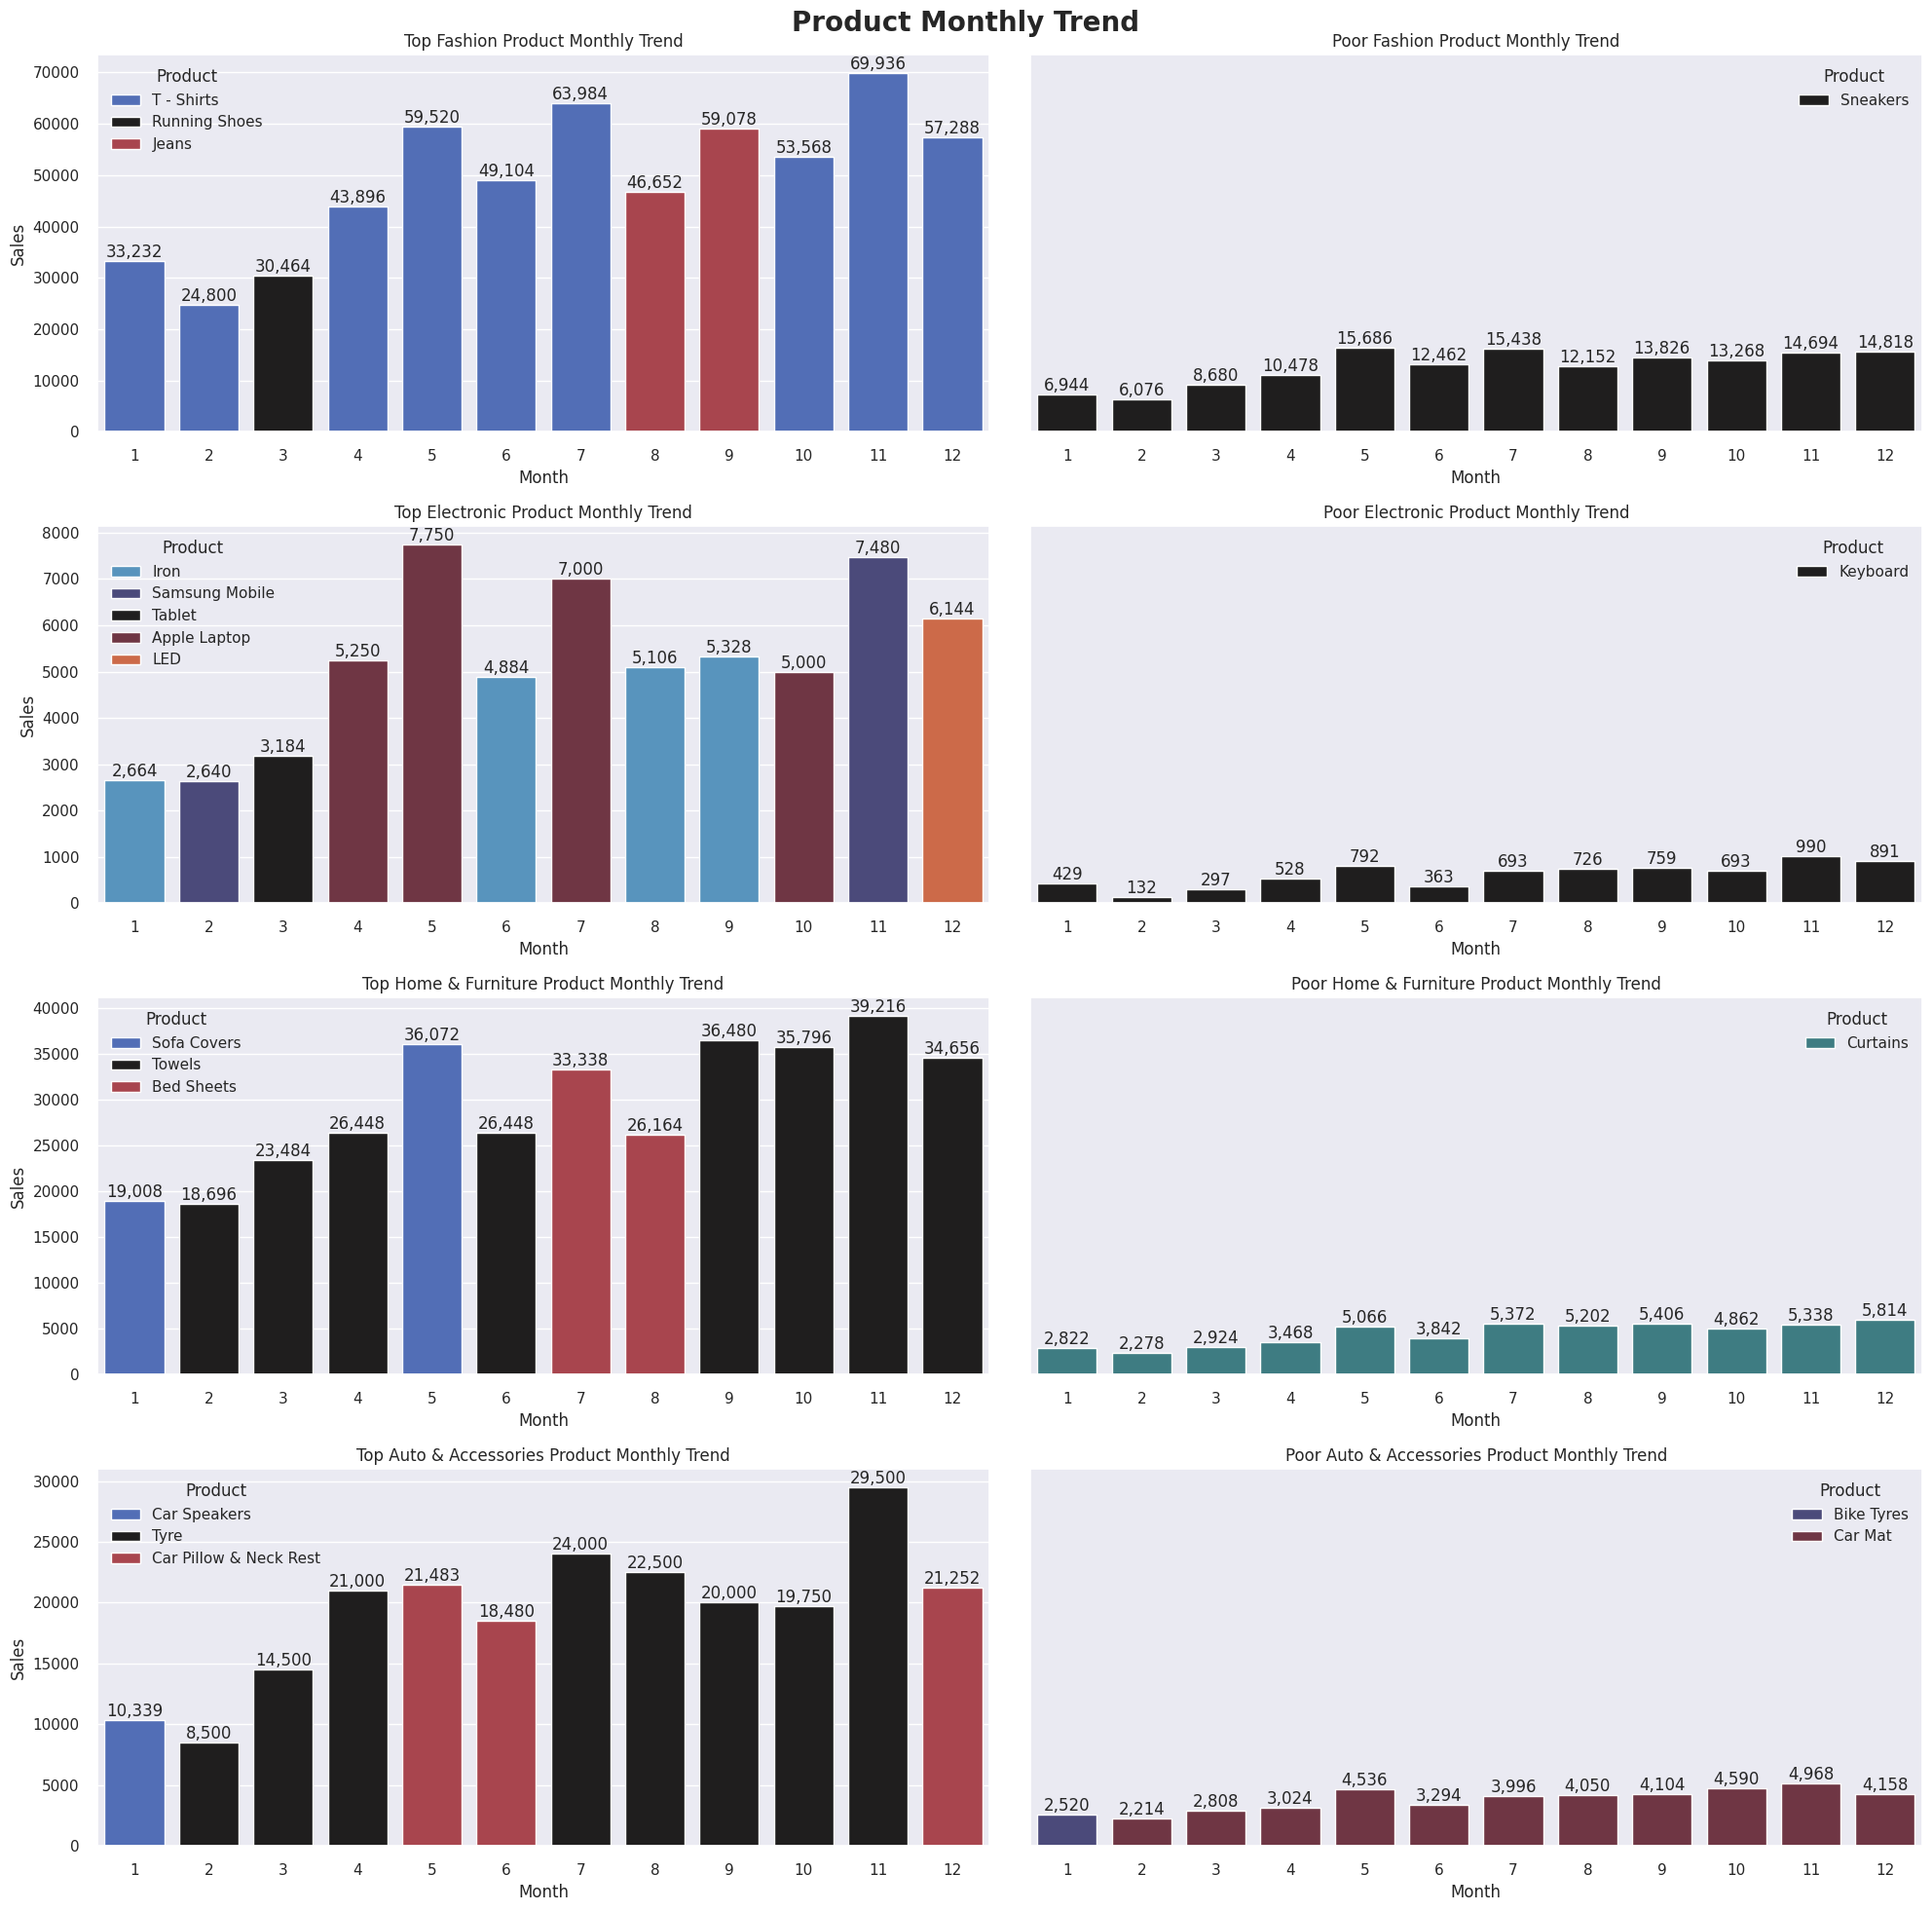

In [ ]:
fig, axs = plt.subplots(4, 2, figsize=(20, 20))
plt.suptitle('Product Monthly Trend', fontsize=20, fontweight='bold', ha='center')

# Fashion
sns.barplot(x='Month', y='Sales', hue='Product', data=top_fash_by_month, ax=axs[0,0], palette='icefire')
for p in axs[0,0].containers:
    axs[0,0].bar_label(p, label_type='edge', fmt='{:,.0f}'.format)
axs[0,0].set_title('Top Fashion Product Monthly Trend')
sns.barplot(x='Month', y='Sales', hue='Product', data=poor_fash_by_month, ax=axs[0,1], palette='icefire')
for p in axs[0,1].containers:
    axs[0,1].bar_label(p, label_type='edge', fmt='{:,.0f}'.format)
axs[0,1].set_ylim(0, 70000)
axs[0,1].set_yticks([ ])
axs[0,1].set_ylabel(' ')
axs[0,1].set_title('Poor Fashion Product Monthly Trend')

# Electric
sns.barplot(x='Month', y='Sales', hue='Product', data=top_elec_by_month, ax=axs[1,0], palette='icefire')
for p in axs[1,0].containers:
    axs[1,0].bar_label(p, label_type='edge', fmt='{:,.0f}'.format)
axs[1,0].set_title('Top Electronic Product Monthly Trend')
sns.barplot(x='Month', y='Sales', hue='Product', data=poor_elec_by_month, ax=axs[1,1], palette='icefire')
for p in axs[1,1].containers:
    axs[1,1].bar_label(p, label_type='edge', fmt='{:,.0f}'.format)
axs[1,1].set_ylim(0, 8000)
axs[1,1].set_yticks([ ])
axs[1,1].set_ylabel(' ')
axs[1,1].set_title('Poor Electronic Product Monthly Trend')

# Home
sns.barplot(x='Month', y='Sales', hue='Product', data=top_home_by_month, ax=axs[2,0], palette='icefire')
for p in axs[2,0].containers:
    axs[2,0].bar_label(p, label_type='edge', fmt='{:,.0f}'.format)
axs[2,0].set_title('Top Home & Furniture Product Monthly Trend')
sns.barplot(x='Month', y='Sales', hue='Product', data=poor_home_by_month, ax=axs[2,1], palette='crest')
for p in axs[2,1].containers:
    axs[2,1].bar_label(p, label_type='edge', fmt='{:,.0f}'.format)
axs[2,1].set_ylim(0, 40000)
axs[2,1].set_yticks([ ])
axs[2,1].set_ylabel(' ')
axs[2,1].set_title('Poor Home & Furniture Product Monthly Trend')

# Auto
sns.barplot(x='Month', y='Sales', hue='Product', data=top_auto_by_month, ax=axs[3,0], palette='icefire')
for p in axs[3,0].containers:
    axs[3,0].bar_label(p, label_type='edge', fmt='{:,.0f}'.format)
axs[3,0].set_title('Top Auto & Accessories Product Monthly Trend')
sns.barplot(x='Month', y='Sales', hue='Product', data=poor_auto_by_month, ax=axs[3,1], palette='icefire')
for p in axs[3,1].containers:
    axs[3,1].bar_label(p, label_type='edge', fmt='{:,.0f}'.format)
axs[3,1].set_ylim(0, 30000)
axs[3,1].set_yticks([ ])
axs[3,1].set_ylabel(' ')
axs[3,1].set_title('Poor Auto & Accessories Product Monthly Trend')

plt.tight_layout()
plt.show()

##### Popular Product Categories

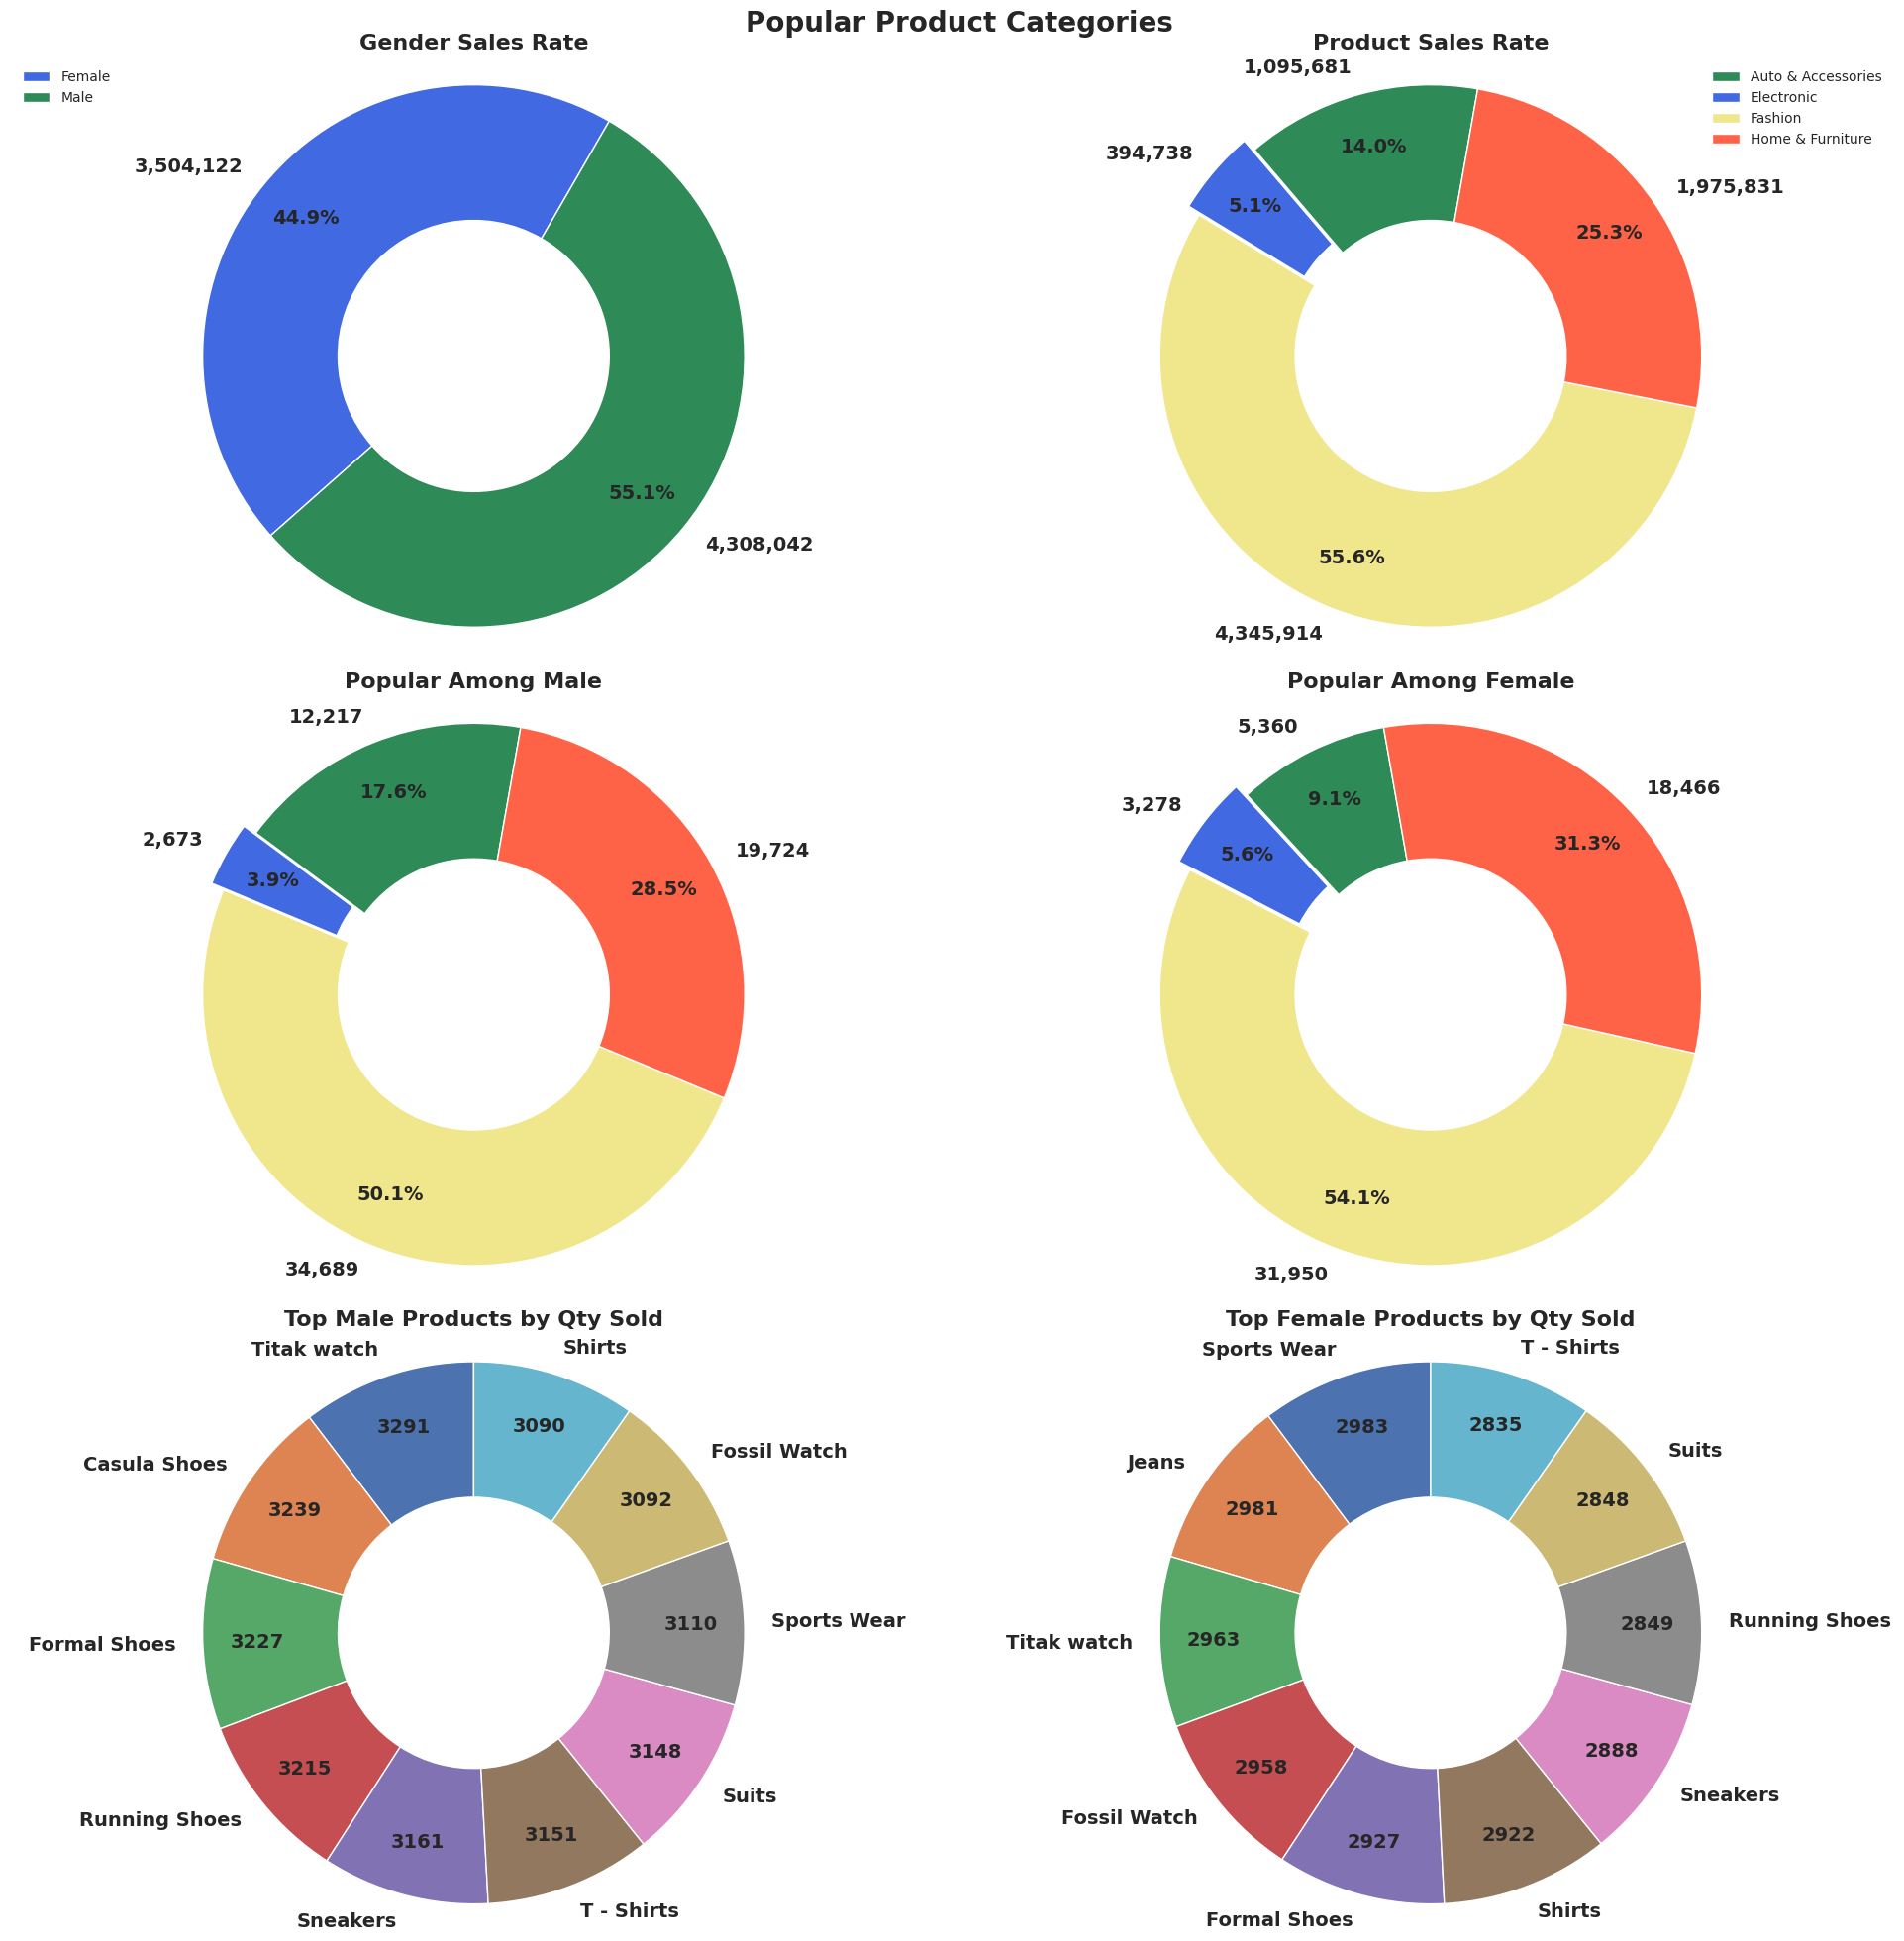

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(20, 20))
plt.suptitle('Popular Product Categories', fontsize=20, fontweight='bold', ha='center')
sns.set_theme()

# Gender Sales
gender_spend = df.groupby('Gender')['Sales'].sum().reset_index()
labels = gender_spend['Sales'].apply(lambda x: "{:,.0f}".format(x))
values = gender_spend['Sales']
axs[0,0].pie(values, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 14, 'fontweight': 'bold'},
        colors=['royalblue', 'seagreen'], wedgeprops=dict(width=0.5), pctdistance=0.8, startangle=60)
axs[0,0].set_title('Gender Sales Rate', fontsize=16, fontweight='bold')
axs[0,0].legend(labels=gender_spend['Gender'], fontsize=10, loc='upper left')
axs[0,0].axis('equal')

# Sales Rate
prod_sales = df.groupby('Product_Category')['Sales'].sum().reset_index()
labels = prod_sales['Sales'].apply(lambda x: "{:,.0f}".format(x))
values = prod_sales['Sales']
explode = [0, 0.05, 0, 0]
axs[0,1].pie(values, autopct='%1.1f%%', textprops={'fontsize': 14, 'fontweight': 'bold'}, labels=labels,
        colors=['seagreen', 'royalblue', 'khaki', 'tomato'], wedgeprops=dict(width=0.5), pctdistance=0.8,
        startangle=80, explode=explode)
axs[0,1].set_title('Product Sales Rate', fontsize=16, fontweight='bold')
axs[0,1].legend(labels=prod_sales['Product_Category'], fontsize=10, loc='upper right')
axs[0,1].axis('equal')

# Male Pop Categories
male_pop = df[df['Gender'] == 'Male'].groupby('Product_Category')['Quantity'].sum().reset_index()
labels = male_pop['Quantity'].apply(lambda x: "{:,.0f}".format(x))
values = male_pop['Quantity']
explode = [0, 0.05, 0, 0]
axs[1,0].pie(values, autopct='%1.1f%%', textprops={'fontsize': 14, 'fontweight': 'bold'}, labels=labels,
           colors=['seagreen', 'royalblue', 'khaki', 'tomato'], wedgeprops=dict(width=0.5), pctdistance=0.8,
           startangle=80, explode=explode)
axs[1,0].set_title('Popular Among Male', fontsize=16, fontweight='bold')
axs[1,0].axis('equal')

# Female Pop Categories
female_pop = df[df['Gender'] == 'Female'].groupby('Product_Category')['Quantity'].sum().reset_index()
labels = female_pop['Quantity'].apply(lambda x: "{:,.0f}".format(x))
values = female_pop['Quantity']
explode = [0, 0.05, 0, 0]
axs[1,1].pie(values, autopct='%1.1f%%', textprops={'fontsize': 14, 'fontweight': 'bold'}, labels=labels,
           colors=['seagreen', 'royalblue', 'khaki', 'tomato'], wedgeprops=dict(width=0.5), pctdistance=0.8,
           startangle=100, explode=explode)
axs[1,1].set_title('Popular Among Female', fontsize=16, fontweight='bold')
axs[1,1].axis('equal')

# Male Pop Products
male_pop_prod = df[df['Gender'] == 'Male'].groupby('Product')['Quantity'].sum().reset_index()
male_pop_prod.sort_values(by='Quantity', ascending=False, inplace=True)
top_male = male_pop_prod.head(10)
labels = top_male['Product']
values = top_male['Quantity']
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_format
axs[2,0].pie(values, textprops={'fontsize': 14, 'fontweight': 'bold'}, labels=labels,
             autopct=autopct_format(values), wedgeprops=dict(width=0.5), pctdistance=0.8, startangle=90)
axs[2,0].set_title('Top Male Products by Qty Sold', fontsize=16, fontweight='bold')
axs[2,0].axis('equal')

# Female Pop Products
female_pop_prod = df[df['Gender'] == 'Female'].groupby('Product')['Quantity'].sum().reset_index()
female_pop_prod.sort_values(by='Quantity', ascending=False, inplace=True)
top_female = female_pop_prod.head(10)
labels = top_female['Product']
values = top_female['Quantity']
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_format
axs[2,1].pie(values, textprops={'fontsize': 14, 'fontweight': 'bold'}, labels=labels,
             autopct=autopct_format(values), wedgeprops=dict(width=0.5), pctdistance=0.8, startangle=90)
axs[2,1].set_title('Top Female Products by Qty Sold', fontsize=16, fontweight='bold')
axs[2,1].axis('equal')

plt.tight_layout()
plt.show()

### Customer Registered Type Performance

In [ ]:
cust_reg = df.groupby('Customer_Login_type')['Customer_Id'].nunique().reset_index()
cust_reg.columns = ['Customer_Login_type', 'TotalCustomers']
cust_reg['TotalSales'] = df.groupby('Customer_Login_type')['Sales'].sum().reset_index()['Sales']
cust_reg['AvgSales'] = df.groupby('Customer_Login_type')['Sales'].mean().reset_index()['Sales']
cust_reg

Customer_Login_type  TotalCustomers  TotalSales  AvgSales
0        First SignUp             173    25747.00    148.83
1               Guest            1975   307895.00    154.49
2              Member           37744  7473840.00    152.25
3                New               27     4682.00    173.41

In [ ]:
cust_reg_melt = pd.melt(cust_reg, id_vars=['Customer_Login_type'],
                        value_vars=['TotalCustomers', 'TotalSales', 'AvgSales'],
                        var_name='Metrics', value_name='Value')

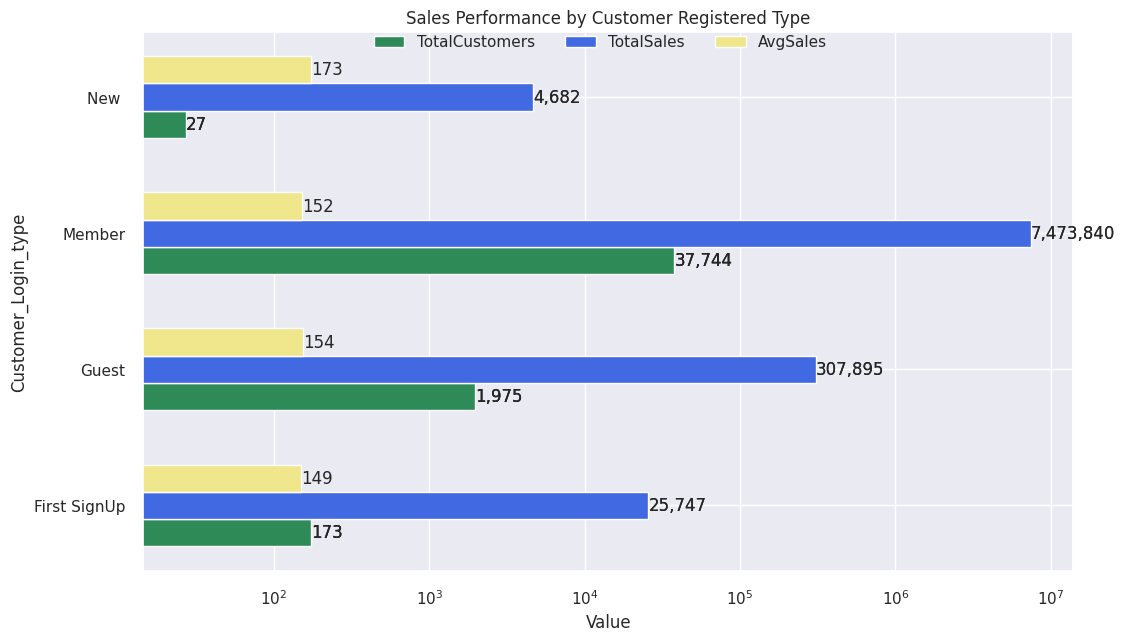

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))

width = 0.2
x_pos = np.arange(len(cust_reg_melt['Customer_Login_type'].unique()))

ax.barh(x_pos - width, cust_reg_melt[cust_reg_melt['Metrics'] == 'TotalCustomers']['Value'],
        width, label='TotalCustomers', color='seagreen')
for p in ax.containers:
    ax.bar_label(p, label_type='edge', fmt='{:,.0f}'.format)
ax.barh(x_pos, cust_reg_melt[cust_reg_melt['Metrics'] == 'TotalSales']['Value'],
        width, label='TotalSales', color='royalblue')
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fmt='{:,.0f}'.format)
ax.barh(x_pos + width, cust_reg_melt[cust_reg_melt['Metrics'] == 'AvgSales']['Value'],
        width, label='AvgSales', color='khaki')
for j in ax.containers:
    ax.bar_label(j, label_type='edge', fmt='{:,.0f}'.format)
ax.set_title('Sales Performance by Customer Registered Type')
ax.set_xlabel('Value')
ax.set_ylabel('Customer_Login_type')
ax.set_yticks(x_pos)
ax.set_xscale('log')
ax.set_yticklabels(cust_reg_melt['Customer_Login_type'].unique())
ax.legend(loc='upper right', bbox_to_anchor=(0.75, 1.02), ncol=len(cust_reg_melt['Customer_Login_type'].unique()))
plt.show()

### Service Performance

##### Order Priority Performance Metrics

In [ ]:
low_quantile = df['Aging'].quantile(0.33)
high_quantile = df['Aging'].quantile(0.66)
df['Shipping_Types'] = pd.cut(df['Aging'], bins=[0, low_quantile, high_quantile, float('inf')],
                              labels=['Regular', 'Express', 'Standard'])

In [ ]:
ship_type = df['Shipping_Types'].value_counts().reset_index()
ship_type.columns = ['Shipping_Types', 'Count']
ship_type['Min_Day'] = df.groupby('Shipping_Types')['Aging'].min().reset_index()['Aging']
ship_type['Max_Day'] = df.groupby('Shipping_Types')['Aging'].max().reset_index()['Aging']
ship_type['Avg_Day'] = df.groupby('Shipping_Types')['Aging'].mean().reset_index()['Aging']
ship_type

Shipping_Types  Count  Min_Day  Max_Day  Avg_Day
0        Express  19601     1.00     3.00     1.86
1        Regular  17296     4.00     7.00     5.50
2       Standard  14385     8.00    10.50     9.00

In [ ]:
service_perform = df.groupby('Order_Priority')['Customer_Id'].nunique().reset_index()
service_perform.columns = ['Order_Priority', 'TotalCustomers']
service_perform['AvgSales'] = df.groupby('Order_Priority')['Sales'].mean().reset_index()['Sales']
service_perform['AvgShippingCost'] = df.groupby('Order_Priority')['Shipping_Cost'].mean().reset_index()['Shipping_Cost']
service_perform['AvgExpressShip'] = df[df['Shipping_Types'] == 'Express'].groupby('Order_Priority')['Shipping_Cost'].mean().reset_index()['Shipping_Cost']
service_perform['AvgRegularShip'] = df[df['Shipping_Types'] == 'Regular'].groupby('Order_Priority')['Shipping_Cost'].mean().reset_index()['Shipping_Cost']
service_perform['AvgStandardShip'] = df[df['Shipping_Types'] == 'Standard'].groupby('Order_Priority')['Shipping_Cost'].mean().reset_index()['Shipping_Cost']
service_perform.fillna(0, inplace=True)

total_row = service_perform[['TotalCustomers', 'AvgSales', 'AvgShippingCost', 'AvgExpressShip',
                             'AvgRegularShip', 'AvgStandardShip']].sum()
total_df = pd.DataFrame([total_row], index=['Total'])
service_perform = pd.concat([service_perform, total_df])
service_perform

Order_Priority  TotalCustomers  AvgSales  AvgShippingCost  \
0           Critical         3778.00    157.28             7.22   
1               High        14206.00    155.16             7.18   
2                Low         2381.00    149.61             6.98   
3             Medium        24574.00    150.42             6.95   
Total            NaN        44939.00    612.47            28.33   

       AvgExpressShip  AvgRegularShip  AvgStandardShip  
0                7.01            7.38             7.23  
1                7.11            7.36             7.04  
2                6.93            7.22             6.78  
3                6.90            7.04             6.91  
Total           27.95           29.00            27.97

In [ ]:
order_met = service_perform.dropna(subset=['Order_Priority'])

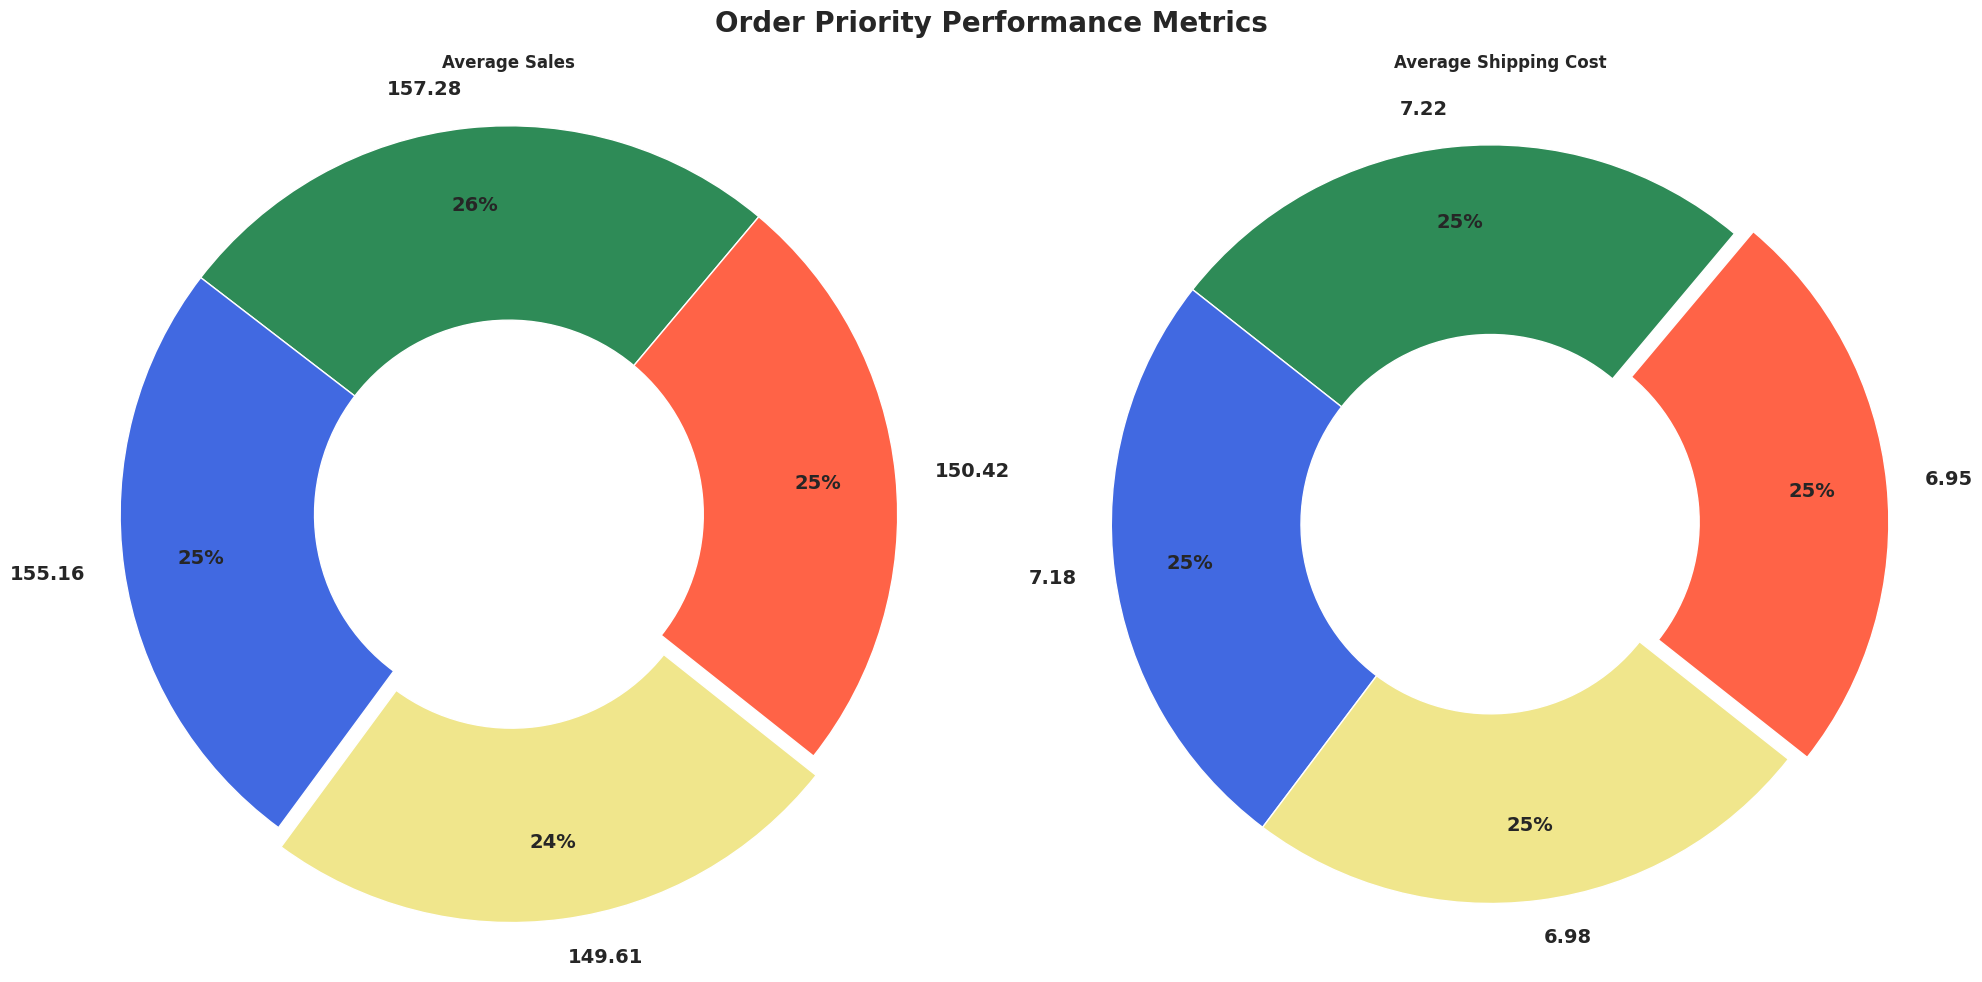

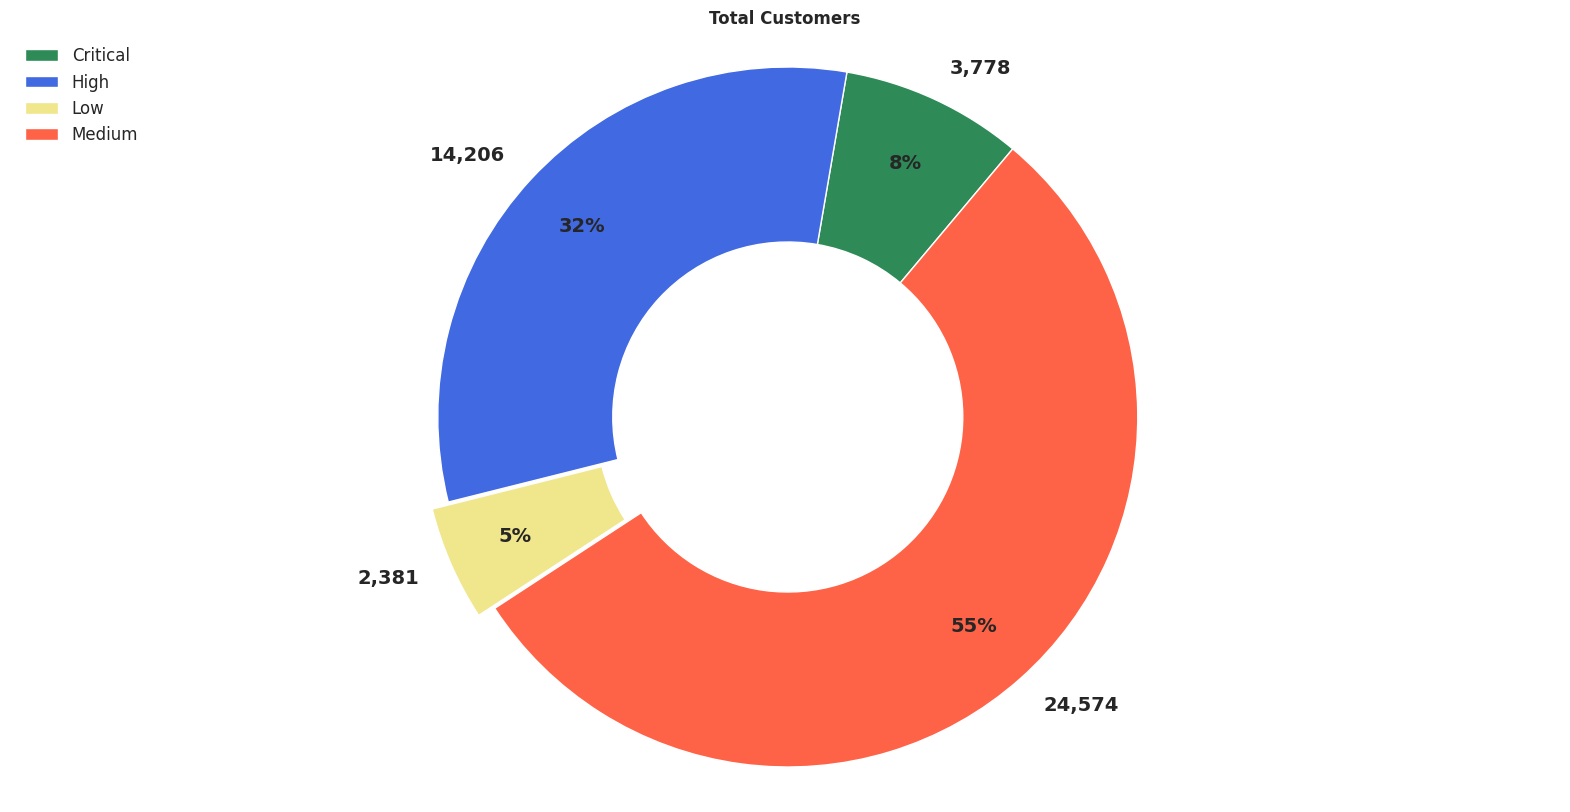

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
plt.suptitle('Order Priority Performance Metrics', fontsize=20, fontweight='bold', ha='center')
sns.set_theme()

# Average Sales
labels = order_met['AvgSales'].apply(lambda x: "{:,.2f}".format(x))
values = order_met['AvgSales']
explode = [0, 0, 0.05, 0]
axs[0].pie(values, labels=labels, autopct='%1.f%%', textprops={'fontsize': 14, 'fontweight': 'bold'},
           colors=['seagreen', 'royalblue', 'khaki', 'tomato'], wedgeprops=dict(width=0.5),
           pctdistance=0.8, startangle=50, explode=explode)
axs[0].set_title('Average Sales', fontweight='bold')
axs[0].axis('equal')

# Average Ship-Cost
labels = order_met['AvgShippingCost'].apply(lambda x: "{:,.2f}".format(x))
values = order_met['AvgShippingCost']
explode = [0, 0, 0, 0.05]
axs[1].pie(values, labels=labels, autopct='%1.f%%', textprops={'fontsize': 14, 'fontweight': 'bold'},
           colors=['seagreen', 'royalblue', 'khaki', 'tomato'], wedgeprops=dict(width=0.5),
           pctdistance=0.8, startangle=50, explode=explode)
axs[1].set_title('Average Shipping Cost', fontweight='bold')
axs[1].axis('equal')

plt.tight_layout()
plt.show()

# Total Customers
plt.figure(figsize=(20, 10))
labels = order_met['TotalCustomers'].apply(lambda x: "{:,.0f}".format(x))
values = order_met['TotalCustomers']
explode = [0, 0, 0.05, 0]
plt.pie(values, labels=labels, autopct='%1.f%%', textprops={'fontsize': 14, 'fontweight': 'bold'},
        colors=['seagreen', 'royalblue', 'khaki', 'tomato'], wedgeprops=dict(width=0.5),
        pctdistance=0.8, startangle=50, explode=explode)
plt.title('Total Customers', fontweight='bold')
plt.legend(labels=order_met['Order_Priority'], fontsize=12, loc='upper left')
plt.axis('equal')
plt.show()

##### Average Ship-Cost per Order Prioity

In [ ]:
order_met_melted = pd.melt(order_met, id_vars=['Order_Priority'],
                           value_vars=['AvgExpressShip', 'AvgRegularShip', 'AvgStandardShip'],
                           var_name='Shipping_Type', value_name='Value')

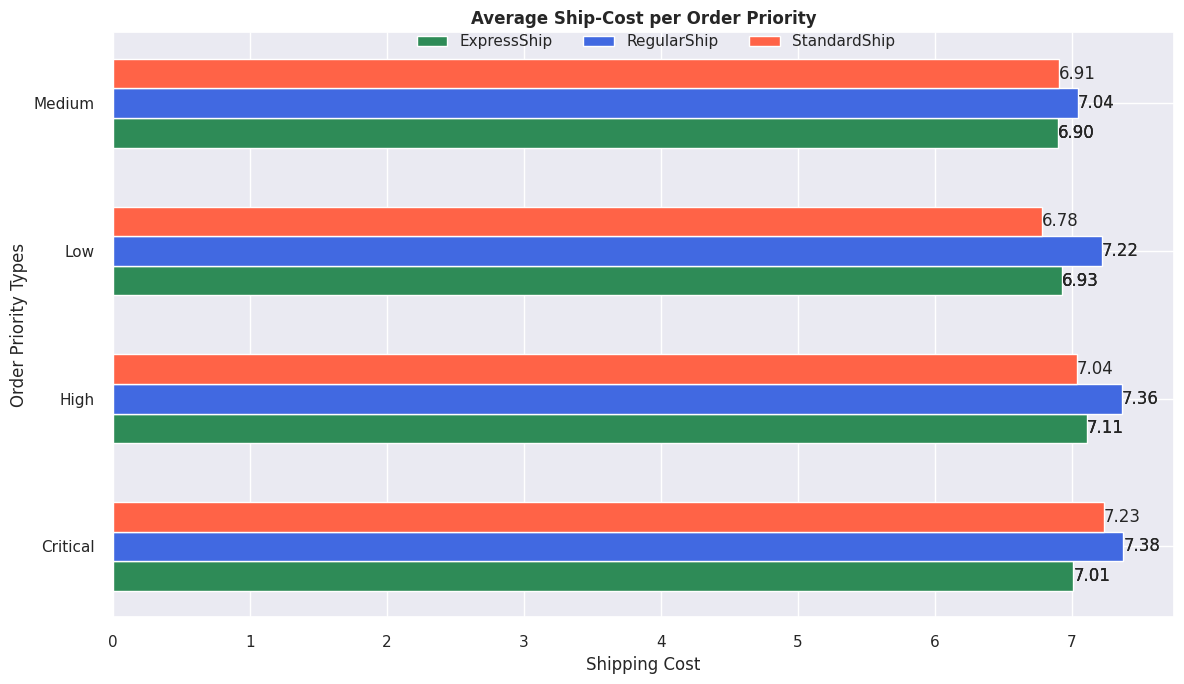

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))

width = 0.2
x_pos = np.arange(len(order_met_melted['Order_Priority'].unique()))

ax.barh(x_pos - width, order_met_melted[order_met_melted['Shipping_Type'] == 'AvgExpressShip']['Value'],
        width, label='ExpressShip', color='seagreen')
for p in ax.containers:
    ax.bar_label(p, label_type='edge', fmt='{:,.2f}'.format)
ax.barh(x_pos, order_met_melted[order_met_melted['Shipping_Type'] == 'AvgRegularShip']['Value'],
        width, label='RegularShip', color='royalblue')
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fmt='{:,.2f}'.format)
ax.barh(x_pos + width, order_met_melted[order_met_melted['Shipping_Type'] == 'AvgStandardShip']['Value'],
        width, label='StandardShip', color='tomato')
for j in ax.containers:
    ax.bar_label(j, label_type='edge', fmt='{:,.2f}'.format)

ax.set_yticks(x_pos)
ax.set_yticklabels(order_met_melted['Order_Priority'].unique())
ax.set_ylabel('Order Priority Types')
ax.set_xlabel('Shipping Cost')
ax.set_title('Average Ship-Cost per Order Priority', fontweight='bold')
ax.legend(loc='upper right', bbox_to_anchor=(0.75, 1.02), ncol=len(order_met_melted['Shipping_Type'].unique()))

plt.tight_layout()
plt.show()

### Discount Optimization

In [ ]:
disc_perfom = df.groupby('Discount')['Customer_Id'].nunique().reset_index()
disc_perfom.columns = ['Discount', 'TotalCustomers']
disc_perfom['TotalSales'] = df.groupby('Discount')['Sales'].sum().reset_index()['Sales']
disc_perfom['TotalProfit'] = df.groupby('Discount')['Profit'].sum().reset_index()['Profit']
disc_perfom['TotalUseFashion'] = df[df['Product_Category'] == 'Fashion'].groupby('Discount')['Customer_Id'].nunique().reset_index()['Customer_Id']
disc_perfom['TotalUseElectronic'] = df[df['Product_Category'] == 'Electronic'].groupby('Discount')['Customer_Id'].nunique().reset_index()['Customer_Id']
disc_perfom['TotalUseHome'] = df[df['Product_Category'] == 'Home & Furniture'].groupby('Discount')['Customer_Id'].nunique().reset_index()['Customer_Id']
disc_perfom['TotalUseAuto'] = df[df['Product_Category'] == 'Auto & Accessories'].groupby('Discount')['Customer_Id'].nunique().reset_index()['Customer_Id']
disc_perfom.fillna(0, inplace=True)

sum_row = disc_perfom[['TotalCustomers', 'TotalSales', 'TotalProfit', 'TotalUseFashion',
                       'TotalUseElectronic', 'TotalUseHome', 'TotalUseAuto']].sum()
sum_df = pd.DataFrame([sum_row], index=['Total'])
disc_perfom = pd.concat([disc_perfom, sum_df])

disc_perfom

Discount  TotalCustomers  TotalSales  TotalProfit  TotalUseFashion  \
0          0.10         6952.00  1110747.00    555700.90          3011.00   
1          0.20        11397.00  1766701.00    836354.80          2932.00   
2          0.30        11501.00  1826933.00    815845.00          4124.00   
3          0.40         9652.00  1603246.00    728805.70          6894.00   
4          0.50         8735.00  1504537.00    673638.50          7769.00   
Total       NaN        48237.00  7812164.00   3610344.90         24730.00   

       TotalUseElectronic  TotalUseHome  TotalUseAuto  
0                 1075.00       1050.00       1949.00  
1                 1594.00       4856.00       2423.00  
2                    0.00       4812.00       2965.00  
3                    0.00       2929.00          0.00  
4                    0.00       1020.00          0.00  
Total             2669.00      14667.00       7337.00

##### Discount Performance Metrics

In [ ]:
disc_perfom_melted = pd.melt(disc_perfom, id_vars=['Discount'],
                             value_vars=['TotalCustomers', 'TotalSales', 'TotalProfit'],
                             var_name='Metric', value_name='Value')
disc_perfom_melted = disc_perfom_melted.dropna(subset=['Discount'])

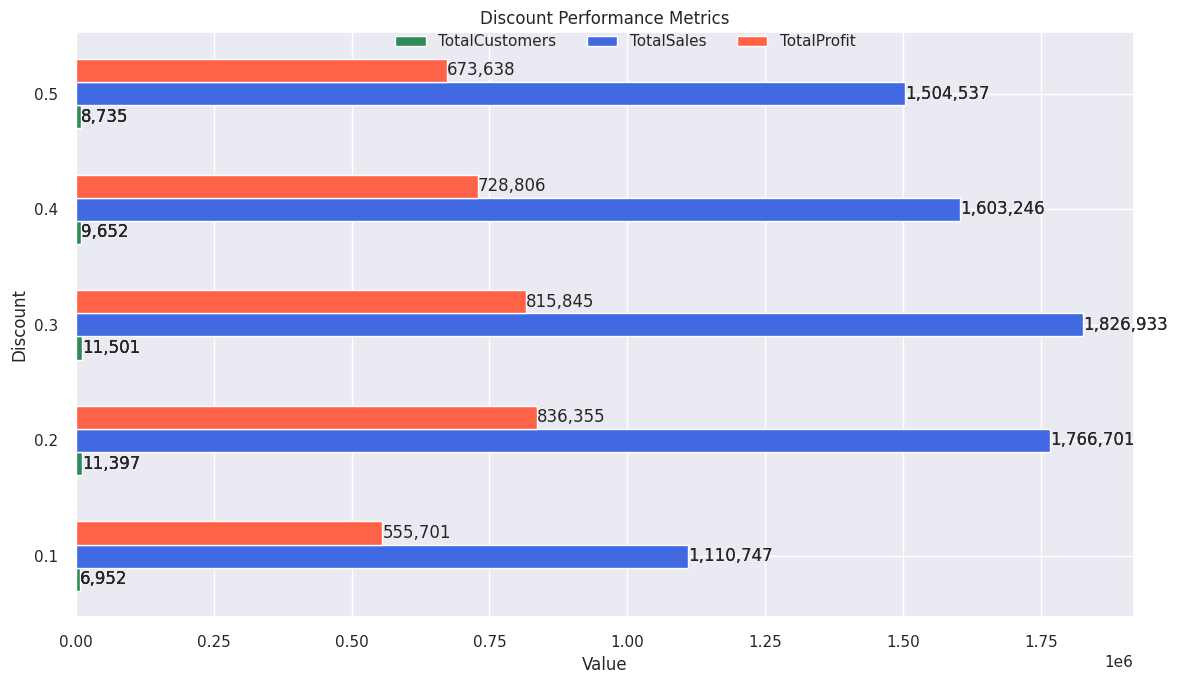

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))

width = 0.2
x_pos = np.arange(len(disc_perfom_melted['Discount'].unique()))

ax.barh(x_pos - width, disc_perfom_melted[disc_perfom_melted['Metric'] == 'TotalCustomers']['Value'],
       width, label='TotalCustomers', color='seagreen')
for p in ax.containers:
    ax.bar_label(p, label_type='edge', fmt='{:,.0f}'.format)
ax.barh(x_pos, disc_perfom_melted[disc_perfom_melted['Metric'] == 'TotalSales']['Value'],
       width, label='TotalSales', color='royalblue')
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fmt='{:,.0f}'.format)
ax.barh(x_pos + width, disc_perfom_melted[disc_perfom_melted['Metric'] == 'TotalProfit']['Value'],
       width, label='TotalProfit', color='tomato')
for j in ax.containers:
    ax.bar_label(j, label_type='edge', fmt='{:,.0f}'.format)

ax.set_yticks(x_pos)
ax.set_yticklabels(disc_perfom_melted['Discount'].unique())
ax.set_ylabel('Discount')
ax.set_xlabel('Value')
ax.set_title('Discount Performance Metrics')
ax.legend(loc='upper right', bbox_to_anchor=(0.75, 1.02), ncol=len(disc_perfom_melted['Metric'].unique()))

plt.tight_layout()
plt.show()

#### Discount Usage by Product Categories

In [ ]:
disc_prod = pd.melt(disc_perfom, id_vars=['Discount'],
                    value_vars=['TotalUseFashion', 'TotalUseElectronic', 'TotalUseHome', 'TotalUseAuto'],
                    var_name='Product', value_name='Value')
disc_prod = disc_prod.dropna(subset=['Discount'])

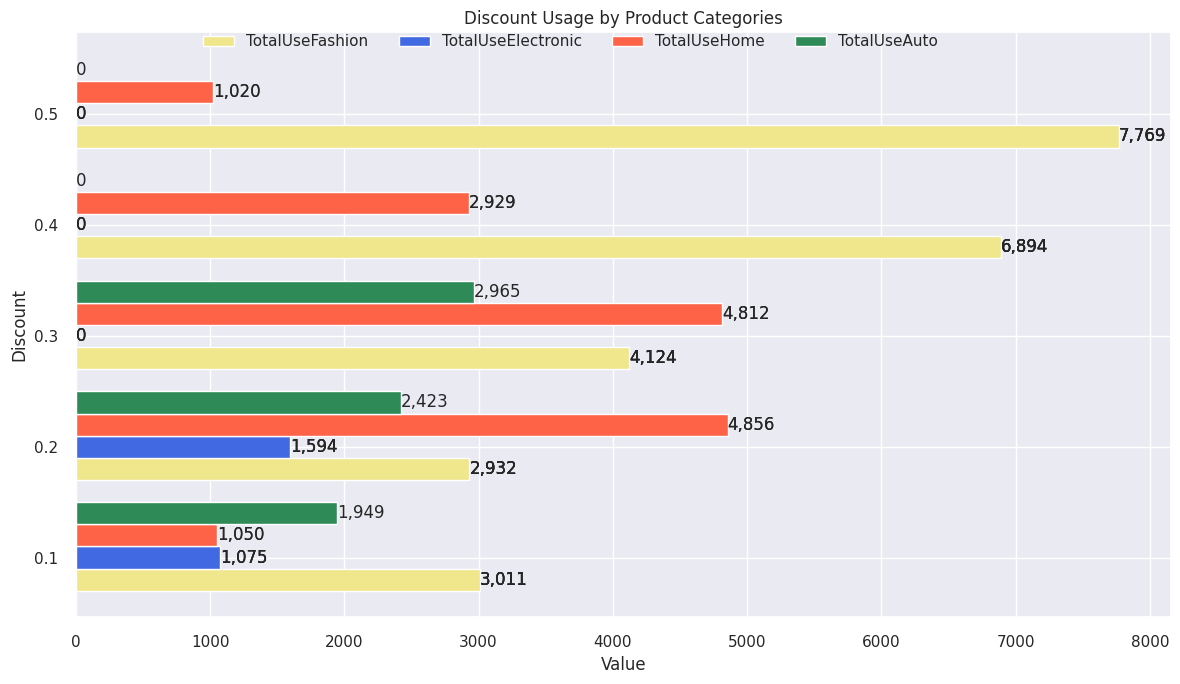

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))

width = 0.2
x_pos = np.arange(len(disc_prod['Discount'].unique()))

ax.barh(x_pos - width, disc_prod[disc_prod['Product'] == 'TotalUseFashion']['Value'],
       width, label='TotalUseFashion', color='khaki')
for p in ax.containers:
    ax.bar_label(p, label_type='edge', fmt='{:,.0f}'.format)
ax.barh(x_pos, disc_prod[disc_prod['Product'] == 'TotalUseElectronic']['Value'],
       width, label='TotalUseElectronic', color='royalblue')
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fmt='{:,.0f}'.format)
ax.barh(x_pos + width, disc_prod[disc_prod['Product'] == 'TotalUseHome']['Value'],
       width, label='TotalUseHome', color='tomato')
for j in ax.containers:
    ax.bar_label(j, label_type='edge', fmt='{:,.0f}'.format)
ax.barh(x_pos + width + width, disc_prod[disc_prod['Product'] == 'TotalUseAuto']['Value'],
       width, label='TotalUseAuto', color='seagreen')
for k in ax.containers:
    ax.bar_label(k, label_type='edge', fmt='{:,.0f}'.format)

ax.set_yticks(x_pos)
ax.set_yticklabels(disc_prod['Discount'].unique())
ax.set_ylabel('Discount')
ax.set_xlabel('Value')
ax.set_title('Discount Usage by Product Categories')
ax.legend(loc='upper right', bbox_to_anchor=(0.8, 1.02), ncol=len(disc_prod['Product'].unique()))

plt.tight_layout()
plt.show()

## 4. Cohort Analysis

Acquisition cohort analysis is a powerful technique used to understand the behavior of customers acquired during a specific time period. By grouping customers into cohorts based on their initial purchase date (acquisition date), we can track their engagement, retention, and spending patterns over time. This analysis provides valuable insights into customer lifecycle and helps identify trends, patterns, and areas for improvement in marketing and customer relationship management.

Then we'll create acquisition cohorts by grouping customers based on the month of their first purchase. This allows us to track the retention rate of each cohort over subsequent months and analyze how customer behavior evolves over time.

In [ ]:
def get_month(x):
    try:
        return datetime.datetime(x.year, x.month, 1)
    except (TypeError, ValueError):
        print(f"Error: Invalid date format encountered for {x}. Returning None.")
        return None

df['InvoiceMonth'] = df['Order_Date'].apply(get_month)

grouping = df.groupby('Customer_Id')['InvoiceMonth']
df['CohortMonth'] = grouping.transform('min')

In [ ]:
def get_date_int(df, column):
    try:
        year = df[column].dt.year
        month = df[column].dt.month
        day = df[column].dt.day
        return year, month, day
    except AttributeError:
        print(f"Error: Column '{column}' does not have a datetime dtype. Returning None.")
        return None, None, None

invoice_year, invoice_month, _ = get_date_int(df, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date_int(df, 'CohortMonth')

years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

df['CohortIndex'] = years_diff * 12 + months_diff + 1

In [ ]:
df.head(1)

Order_Date      Time  Aging Customer_Id  Gender Device_Type  \
0 2018-01-02  10:56:33   8.00       37077  Female         Web   

  Customer_Login_type    Product_Category            Product  Sales  Quantity  \
0              Member  Auto & Accessories  Car Media Players 140.00      1.00   

   Discount  Profit  Shipping_Cost Order_Priority Payment_method  Year  \
0      0.30   46.00           4.60         Medium    credit_card  2018   

   Quarter  Month  Week  Day_of_Week  Day  Hour InvoiceMonth CohortMonth  \
0        1      1     1            1    2    10   2018-01-01  2018-01-01   

   CohortIndex  
0            1

### 4.1. Acquisition Cohort

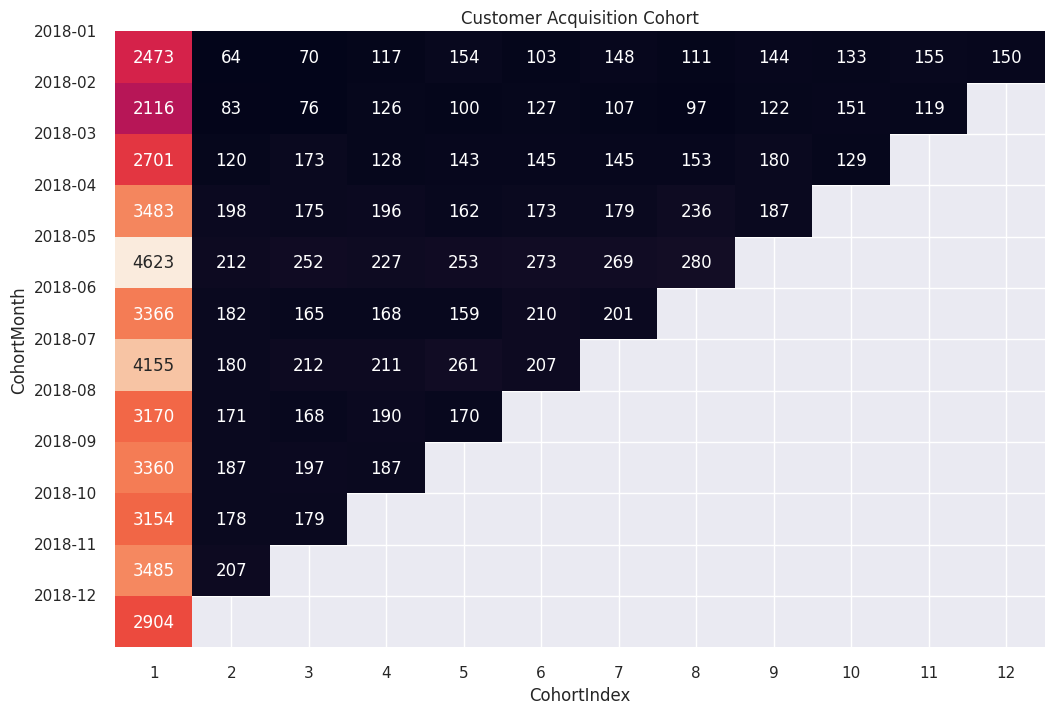

In [ ]:
acq_cohort = df.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = acq_cohort['Customer_Id'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth',
                                 columns='CohortIndex',
                                 values='Customer_Id')

plt.figure(figsize=(12, 8))
plt.title('Customer Acquisition Cohort')
sns.heatmap(data = cohort_counts,
            annot = True,
            cbar = False,
            fmt = 'g')
yticks_labels = cohort_counts.index.strftime('%Y-%m').unique()
plt.yticks(range(len(yticks_labels)), yticks_labels)
plt.show()

In the Cohort Table, we had insights that `2.473 customers` made transactions in **January**, but in **February**, only `64 of the same customers` retained and made transactions. However had increased again in May `(154 customers)` and November `(155 customers)`.

### 4.2. Customer Retention rate

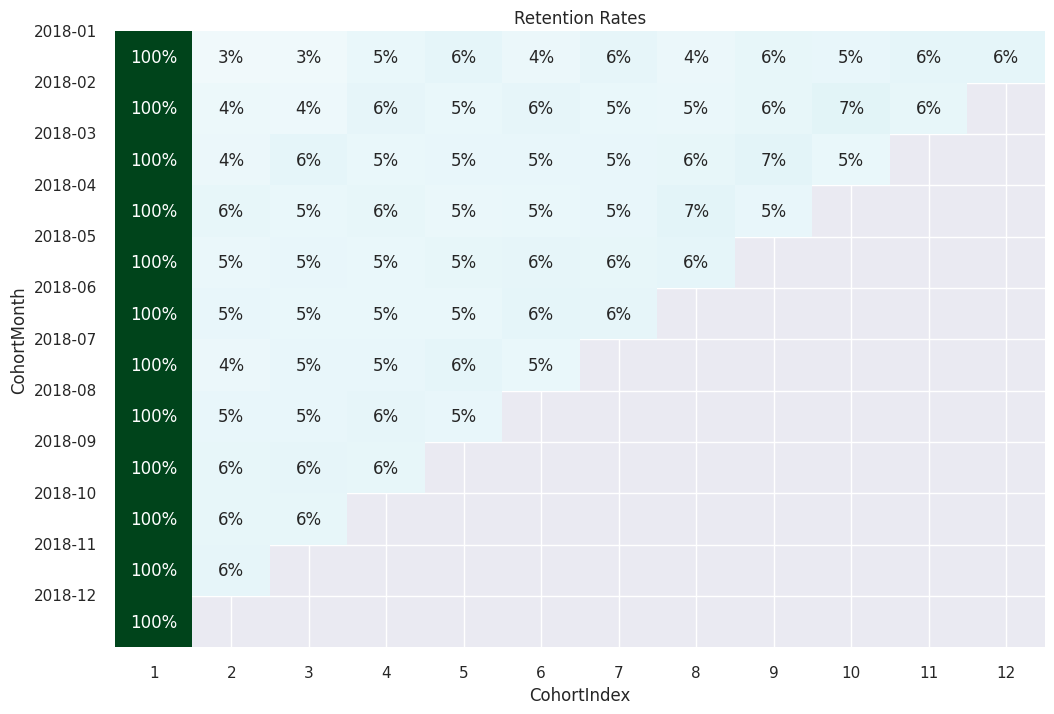

In [ ]:
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention.round(3) * 100

plt.figure(figsize=(12, 8))
plt.title('Retention Rates')
sns.heatmap(data = retention,
            annot = True,
            cbar = False,
            fmt = '.0%',
            vmin = 0.0,
            vmax = 0.5,
            cmap = 'BuGn',
            annot_kws={'size': 12})
yticks_labels = retention.index.strftime('%Y-%m').unique()
plt.yticks(range(len(yticks_labels)), yticks_labels)
plt.show()

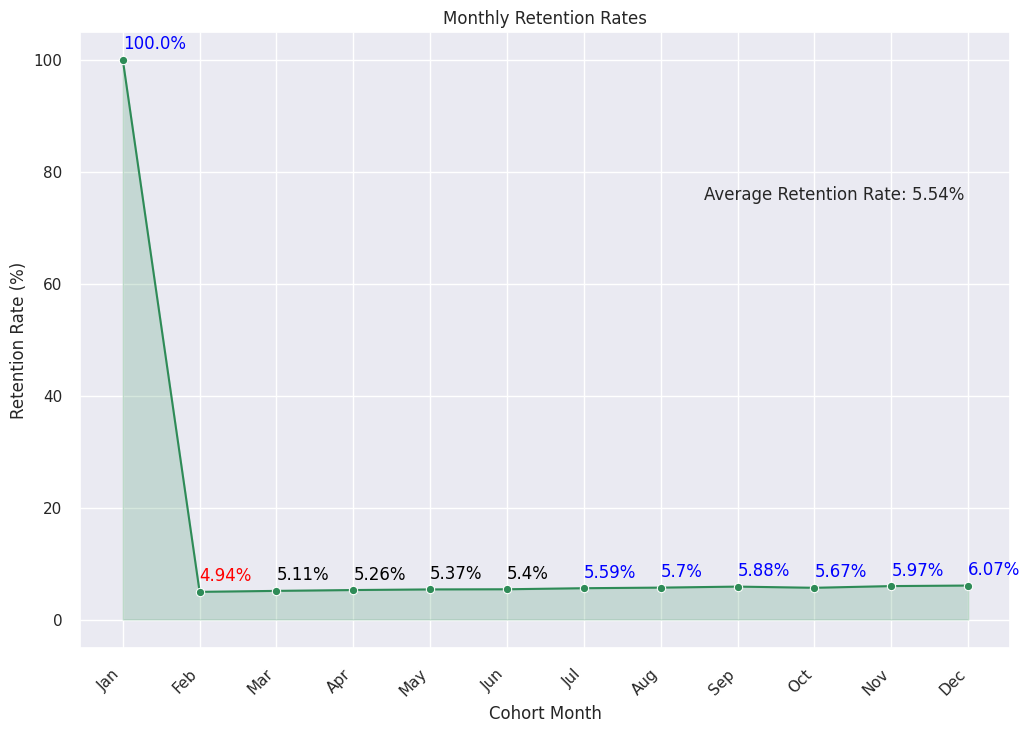

In [ ]:
cust_cohort_month = df.groupby('CohortIndex')['Customer_Id'].nunique()
customer_per_month = df.groupby('CohortMonth')['Customer_Id'].nunique().values
customers = customer_per_month.cumsum()
customers = customers[::-1]

plt.figure(figsize=(12, 8))
month = cust_cohort_month.index.values
monthly_rate = 100*(cust_cohort_month / customers)
sns.lineplot(x=month, y=monthly_rate, marker='o', color='seagreen')
for x_val, y_val in zip(month, monthly_rate):
    if y_val > 5.5:
        plt.text(x_val, y_val+2, s = str(round(y_val, 2)) + "%", color = 'blue')
    elif y_val < 5:
        plt.text(x_val, y_val+2, s = str(round(y_val, 2)) + "%", color = 'red')
    else:
        plt.text(x_val, y_val+2, s = str(round(y_val, 2)) + "%", color = 'black')
plt.fill_between(month, monthly_rate, 0, color='seagreen', alpha=0.2)
plt.title('Monthly Retention Rates')
plt.xlabel('Cohort Month')
plt.ylabel('Retention Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.xticks(range(1, 13, 1), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
mean_cohort_index_2_to_12 = monthly_rate.loc[monthly_rate.index.isin(range(2, 13))].mean()
text_add = f'Average Retention Rate: {mean_cohort_index_2_to_12:.2f}%'
plt.text(0.95, 0.75, text_add, transform=plt.gca().transAxes, ha='right', va='top')
plt.show()

The **average customer retention rate is `5.54%`**. This means, on average, 5.54% of customers acquired in a specific month are still active in the following months. The rate seems logical to be a low trend because the **average of frequency orders per customer during the year is only 1-2 times**, and the **maximum order is 6 times with only one customer**.

### 4.3. Total Quantity Sold per Cohort

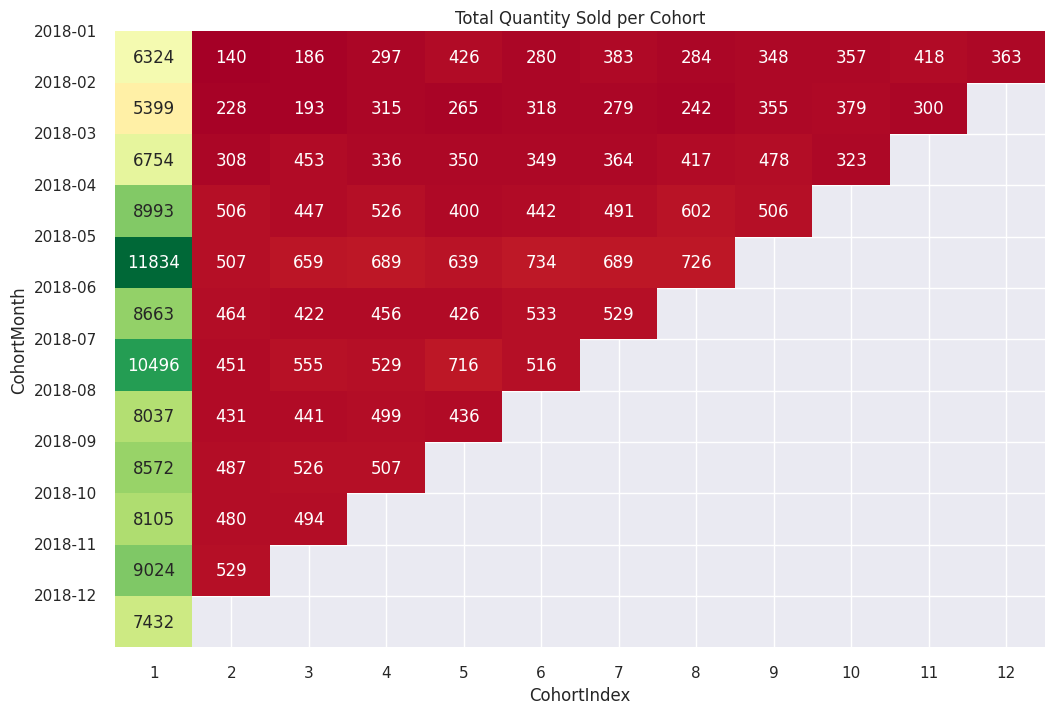

In [ ]:
qty_cohort = df.groupby(['CohortMonth', 'CohortIndex'])['Quantity'].sum().reset_index()
total_quantity = qty_cohort.pivot_table(index='CohortMonth',
                                         columns='CohortIndex',
                                         values='Quantity')

plt.figure(figsize=(12, 8))
plt.title('Total Quantity Sold per Cohort')
sns.heatmap(data=total_quantity,
            annot=True,
            cbar = False,
            fmt='.0f',
            cmap='RdYlGn')

yticks_labels = total_quantity.index.strftime('%Y-%m').unique()
plt.yticks(range(len(yticks_labels)), yticks_labels)
plt.show()

### 4.4. Average Total Sales per Cohort

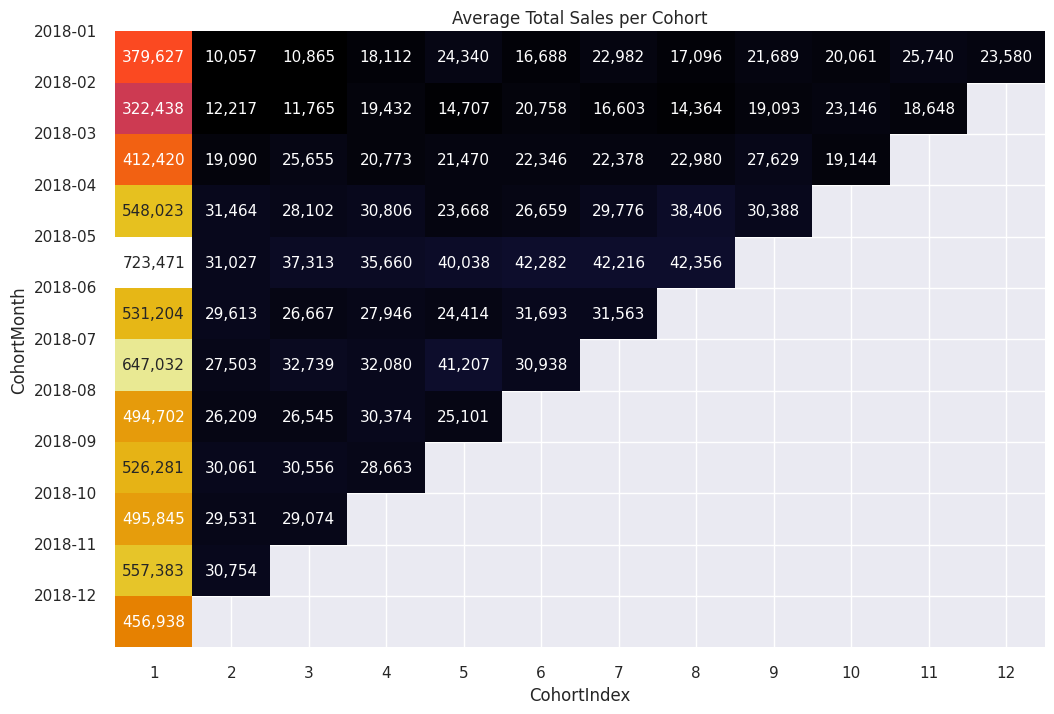

In [ ]:
sales_cohort = df.groupby(['CohortMonth', 'CohortIndex'])['Sales'].sum().reset_index()
average_total_sales = sales_cohort.pivot_table(index='CohortMonth',
                                             columns='CohortIndex',
                                             values='Sales')

plt.figure(figsize=(12, 8))
plt.title('Average Total Sales per Cohort')
sns.heatmap(data=average_total_sales,
            annot=True,
            cbar = False,
            fmt=',.0f',
            cmap='CMRmap',
            annot_kws={'size': 11})

yticks_labels = average_total_sales.index.strftime('%Y-%m').unique()
plt.yticks(range(len(yticks_labels)), yticks_labels)
plt.show()

## 5. Pareto Analysis

Identify the most impactful factors driving the total sales and profit.

### 5.1. Customer vs Sales Pareto Chart

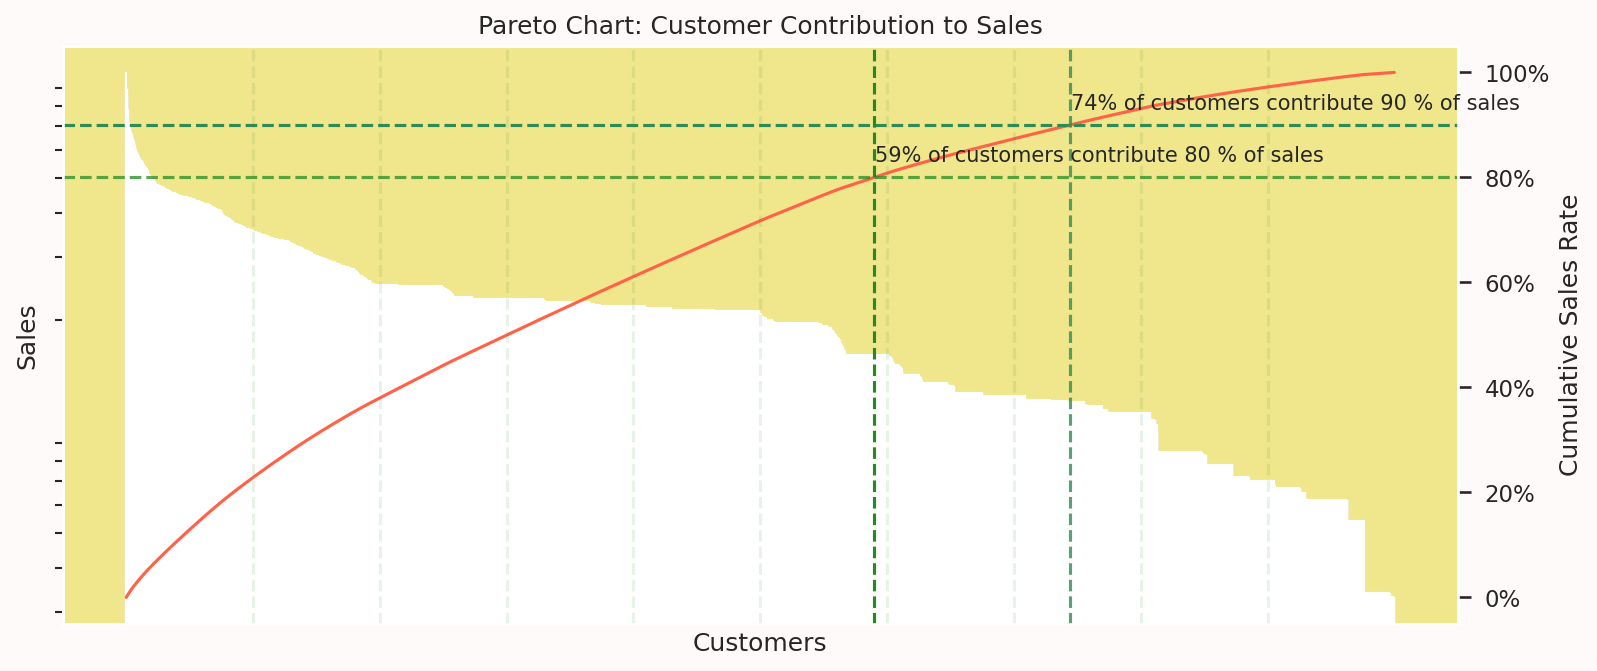

In [ ]:
cust_pareto = pd.DataFrame(df.groupby('Customer_Id')['Sales'].sum())
cust_pareto = cust_pareto.sort_values(by='Sales', ascending=False)
cust_pareto['CumulativeRate'] = (cust_pareto['Sales'].cumsum() / cust_pareto['Sales'].sum() * 100).round(2)

plt.rcParams['axes.facecolor'] = 'khaki'
fig, ax = plt.subplots(figsize=(12, 5), dpi=150, facecolor='snow')
plt.rcParams['axes.grid'] = False

sns.barplot(x=np.arange(len(cust_pareto)), y=cust_pareto['Sales'], ax=ax)

ax2 = ax.twinx()

sns.lineplot(x=np.arange(len(cust_pareto)), y=cust_pareto['CumulativeRate'], ax=ax2, color='tomato')
ax2.axhline(80, color='forestgreen', linestyle='dashed', alpha=0.75)
ax2.axhline(90, color='seagreen', linestyle='dashed', alpha=1)

vlines = [int(len(cust_pareto) * x / 10) for x in range(1, 10)]
for vline in vlines:
    ax2.axvline(vline, color='forestgreen', linestyle='dashed', alpha=0.1)

interaction_80 = (cust_pareto.shape[0] - cust_pareto[cust_pareto.CumulativeRate >= 80].shape[0])
ax2.axvline(interaction_80, color='forestgreen', linestyle='dashed', alpha=1)

interaction_80_percentage = round((interaction_80 / cust_pareto.shape[0]) * 100)
plt.text(interaction_80 + 25, 83, str(interaction_80_percentage) + '% of customers contribute 80 % of sales',
         fontsize=10)

interaction_90 = (cust_pareto.shape[0] - cust_pareto[cust_pareto.CumulativeRate >= 90].shape[0])
ax2.axvline(interaction_90, color='seagreen', linestyle='dashed', alpha=0.8)

interaction_90_percentage = round((interaction_90 / cust_pareto.shape[0]) * 100)
plt.text(interaction_90 + 25, 93, str(interaction_90_percentage) + '% of customers contribute 90 % of sales',
         fontsize=10)

ax2.yaxis.set_major_formatter(PercentFormatter())
ax.set_xticks([ ])
ax2.set_xticks([ ])
ax.set_yscale('log')
ax.set_yticks([ ])
ax.set_xlabel('Customers')
ax.set_ylabel('Sales')
ax2.set_ylabel('Cumulative Sales Rate')
plt.title('Pareto Chart: Customer Contribution to Sales')
plt.show()

Well, from the chart, we can get insights that with **a half amount of customers (59 %), it contribute 80 % of Sales**. Then **90 % of sales are boosted by customers by 74 %.**

In [39]:
high_value_cust = cust_pareto[cust_pareto['CumulativeRate'] < 80]
low_value_cust = cust_pareto[cust_pareto['CumulativeRate'] > 80]
cust_pareto['ParetoCustValue'] = np.where(cust_pareto.index.isin(high_value_cust.index), 'High', 'Low')
cust_pareto

Sales  CumulativeRate ParetoCustValue
Customer_Id                                       
87989       994.00            0.01            High
35324       949.00            0.02            High
79016       935.00            0.04            High
10436       929.00            0.05            High
51093       927.00            0.06            High
...            ...             ...             ...
47255        33.00          100.00             Low
47272        33.00          100.00             Low
35687        33.00          100.00             Low
26593        33.00          100.00             Low
45628        33.00          100.00             Low

[38990 rows x 3 columns]

In [43]:
cust_pareto['ParetoCustValue'].value_counts()

ParetoCustValue
High    22994
Low     15996
Name: count, dtype: int64

In [50]:
cust_sale_pareto = cust_pareto.groupby('ParetoCustValue')['ParetoCustValue'].count().reset_index(name='TotalCustomer') # Rename the 'ParetoCustValue' column to 'Count' during reset_index
cust_sale_pareto['Sales'] = cust_pareto.groupby('ParetoCustValue')['Sales'].sum().reset_index()['Sales']
cust_sale_pareto

ParetoCustValue  TotalCustomer      Sales
0            High          22994 6249292.00
1             Low          15996 1562872.00

In [53]:
cust_pareto.reset_index(inplace=True)
df = pd.merge(df, cust_pareto[['Customer_Id', 'ParetoCustValue']], on='Customer_Id', how='left')

### 5.2. Product vs Profit Pareto Chart

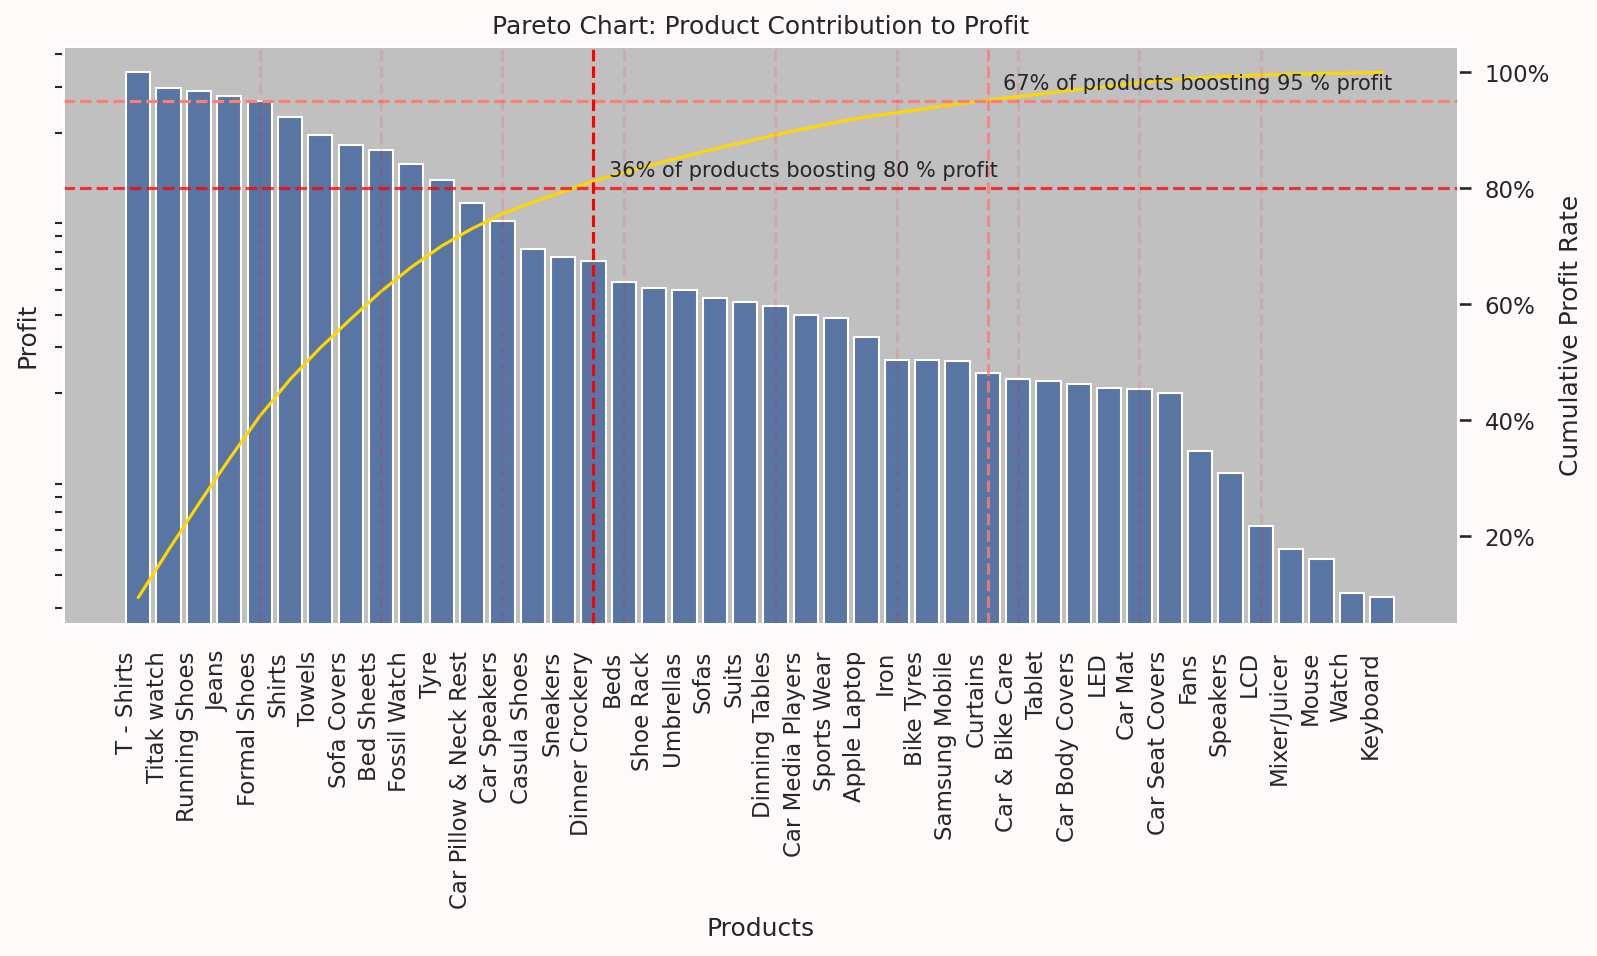

In [35]:
prod_pareto = pd.DataFrame(df.groupby('Product')['Profit'].sum())
prod_pareto = prod_pareto.sort_values(by='Profit', ascending=False)
prod_pareto['CumulativeRate'] = (prod_pareto['Profit'].cumsum() / prod_pareto['Profit'].sum() * 100).round(2)
prod_pareto = prod_pareto.reset_index()
prod_pareto.columns = ['Product', 'Profit', 'CumulativeRate']

plt.rcParams['axes.facecolor'] = 'silver'
fig, ax = plt.subplots(figsize=(12, 5), dpi=150, facecolor='snow')
plt.rcParams['axes.grid'] = False

sns.barplot(x=prod_pareto['Product'], y=prod_pareto['Profit'], ax=ax)

ax2 = ax.twinx()

sns.lineplot(x=np.arange(len(prod_pareto)), y=prod_pareto['CumulativeRate'], ax=ax2, color='gold')
ax2.axhline(80, color='red', linestyle='dashed', alpha=0.75)
ax2.axhline(95, color='salmon', linestyle='dashed', alpha=1)

vlines = [int(len(prod_pareto) * x / 10) for x in range(1, 10)]
for vline in vlines:
    ax2.axvline(vline, color='red', linestyle='dashed', alpha=0.1)

interaction_80 = (prod_pareto.shape[0] - prod_pareto[prod_pareto.CumulativeRate >= 80].shape[0])
ax2.axvline(interaction_80, color='red', linestyle='dashed', alpha=1)

interaction_80_percentage = round((interaction_80 / prod_pareto.shape[0]) * 100)
plt.text(interaction_80 + 0.5, 82, str(interaction_80_percentage) + '% of products boosting 80 % profit',
         fontsize=10)

interaction_95 = (prod_pareto.shape[0] - prod_pareto[prod_pareto.CumulativeRate >= 95].shape[0])
ax2.axvline(interaction_95, color='salmon', linestyle='dashed', alpha=0.8)

interaction_95_percentage = round((interaction_95 / prod_pareto.shape[0]) * 100)
plt.text(interaction_95 + 0.5, 97, str(interaction_95_percentage) + '% of products boosting 95 % profit',
         fontsize=10)

ax2.yaxis.set_major_formatter(PercentFormatter())
ax.set_xticks(np.arange(len(prod_pareto['Product'])))
ax.set_xticklabels(prod_pareto['Product'], rotation=90, ha='right')
ax.set_yscale('log')
ax.set_yticks([ ])
ax.set_xlabel('Products')
ax.set_ylabel('Profit')
ax2.set_ylabel('Cumulative Profit Rate')
plt.title('Pareto Chart: Product Contribution to Profit')
plt.show()

**36 % of products can boost 80 % of profit by year**. Then **95 % of profit was boosted by 67 % of products**, which means **37 % of products had a poor contribution**.

In [44]:
top_perform = prod_pareto[prod_pareto['CumulativeRate'] < 80]
mid_perform = prod_pareto[(prod_pareto['CumulativeRate'] > 80) & (prod_pareto['CumulativeRate'] < 95)]
low_perform = prod_pareto[prod_pareto['CumulativeRate'] > 95]
prod_pareto['ParetoProdValue'] = np.where(prod_pareto['Product'].isin(top_perform['Product']), 'Top',
                                          np.where(prod_pareto['Product'].isin(mid_perform['Product']), 'Mid', 'Low'))
prod_pareto

Product    Profit  CumulativeRate ParetoProdValue
0               T - Shirts 340720.60            9.44             Top
1              Titak watch 296718.20           17.66             Top
2            Running Shoes 289097.60           25.66             Top
3                    Jeans 276856.30           33.33             Top
4             Formal Shoes 265350.70           40.68             Top
5                   Shirts 230078.30           47.05             Top
6                   Towels 196828.20           52.51             Top
7              Sofa Covers 178920.50           57.46             Top
8               Bed Sheets 172262.90           62.23             Top
9             Fossil Watch 151271.70           66.42             Top
10                    Tyre 131880.00           70.08             Top
11  Car Pillow & Neck Rest 107735.80           73.06             Top
12            Car Speakers  92034.80           75.61             Top
13            Casula Shoes  71894.50           77.60             Top
14                Sneakers  66820.70           79.45             Top
15         Dinner Crockery  64287.50           81.23             Mid
16                    Beds  53592.50           82.72             Mid
17               Shoe Rack  50886.50           84.13             Mid
18               Umbrellas  49789.60           85.51             Mid
19                   Sofas  46283.90           86.79             Mid
20                   Suits  44831.30           88.03             Mid
21          Dinning Tables  43326.00           89.23             Mid
22       Car Media Players  39933.80           90.33             Mid
23             Sports Wear  38984.00           91.41             Mid
24            Apple Laptop  33025.00           92.33             Mid
25                    Iron  26833.20           93.07             Mid
26              Bike Tyres  26767.20           93.81             Mid
27          Samsung Mobile  26568.60           94.55             Mid
28                Curtains  23881.30           95.21             Low
29         Car & Bike Care  22700.30           95.84             Low
30                  Tablet  22312.70           96.46             Low
31         Car Body Covers  21629.90           97.06             Low
32                     LED  20910.00           97.64             Low
33                 Car Mat  20782.80           98.21             Low
34         Car Seat Covers  20006.90           98.77             Low
35                    Fans  12047.70           99.10             Low
36                Speakers   9909.20           99.37             Low
37                     LCD   6197.20           99.55             Low
38            Mixer/Juicer   5033.30           99.69             Low
39                   Mouse   4632.80           99.81             Low
40                   Watch   3428.50           99.91             Low
41                Keyboard   3292.40          100.00             Low

In [45]:
prod_pareto['ParetoProdValue'].value_counts()

ParetoProdValue
Top    15
Low    14
Mid    13
Name: count, dtype: int64

In [51]:
prod_profit_pareto = prod_pareto.groupby('ParetoProdValue')['ParetoProdValue'].count().reset_index(name='TotalProduct')
prod_profit_pareto['Profit'] = prod_pareto.groupby('ParetoProdValue')['Profit'].sum().reset_index()['Profit']
prod_profit_pareto.sort_values(by='Profit', ascending=False)

ParetoProdValue  TotalProduct     Profit
2             Top            15 2868470.80
1             Mid            13  545109.10
0             Low            14  196765.00

In [55]:
prod_pareto.reset_index(inplace=True)
df = pd.merge(df, prod_pareto[['Product', 'ParetoProdValue']], on='Product', how='left')

#### 5.2.1. Product Profit Margin

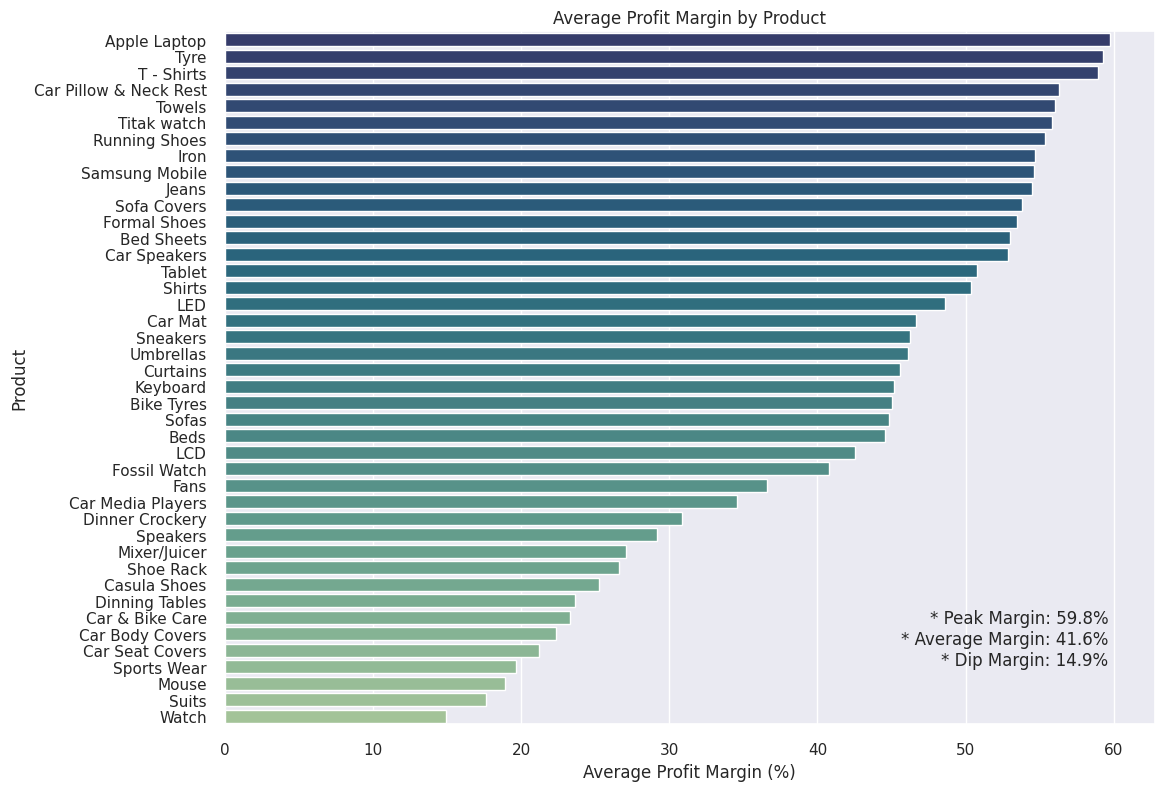

In [56]:
df['Profit_Margin'] = (df['Profit'] / df['Sales']) * 100
product_profit_margins = df.groupby('Product')['Profit_Margin'].mean().reset_index()
product_profit_margins = product_profit_margins.sort_values(by='Profit_Margin', ascending=False)

plt.figure(figsize=(12, 9))
sns.set_style('darkgrid')
sns.barplot(y='Product', x='Profit_Margin', data=product_profit_margins, palette='crest_r')
peak_margin = product_profit_margins['Profit_Margin'].max()
mean_margin = product_profit_margins['Profit_Margin'].mean()
dip_margin = product_profit_margins['Profit_Margin'].min()
text_to_add = f'''
* Peak Margin: {peak_margin:.1f}%
* Average Margin: {mean_margin:.1f}%
* Dip Margin: {dip_margin:.1f}%
'''
plt.text(0.95, 0.05, text_to_add, transform=plt.gca().transAxes, ha='right', va='bottom')
plt.title('Average Profit Margin by Product')
plt.xlabel('Average Profit Margin (%)')
plt.ylabel('Product')
plt.show()

In [57]:
df['Profit_Margin'].describe()

count   51282.00
mean       42.53
std        20.07
min         0.60
25%        25.07
50%        44.29
75%        56.29
max       100.00
Name: Profit_Margin, dtype: float64

In [59]:
profit_margin_group = df.groupby('ParetoProdValue')['Profit_Margin'].mean().reset_index()
profit_margin_group.columns = ['ParetoProdValue', 'AvgProfitMargin']
profit_margin_group.sort_values(by='AvgProfitMargin', ascending=False)

ParetoProdValue  AvgProfitMargin
2             Top            50.49
0             Low            34.12
1             Mid            32.29

## 6. RFM Analysis

Next, we'll build the KMeans clustering model with 3 features only according to RFM analysis. RFM (Recency, Frequency, Monetary) Analysis is a customer segmentation technique that uses customer behavior to group them into segments. It can be very useful for targeted marketing campaigns and other customer relationship management initiatives.

### 6.1. Build RFM DataFrame

In this case, I'll define the RFM features as follows:

* Recency (R): `Order_Date`, calculate the number of days since the customer's last purchase.
* Frequency (F): `Order_Date`, calculate the number of total order date for each customer. This represents how often the customer has made purchases.
* Monetary (M): `Sales`, calculate the total sales for each customer. This represents the total value of the customer's purchases.

In [61]:
last_transaction_date = df['Order_Date'].max()

rfm_df = df.groupby('Customer_Id').agg({
    'Order_Date': lambda x: (last_transaction_date - x.max()).days,
    'Sales': 'sum'})

rfm_df.rename(columns={
    'Order_Date': 'Recency',
    'Sales': 'Monetary'}, inplace=True)
rfm_df['Frequency'] = df.groupby('Customer_Id').agg({'Order_Date': 'count'})['Order_Date']
rfm_df = rfm_df[['Recency', 'Frequency', 'Monetary']]

rfm_df.head()

Recency  Frequency  Monetary
Customer_Id                              
10000             24          2    293.00
10002            132          1    149.00
10004            144          1     85.00
10006            144          2    440.00
10013            227          1    159.00

In [62]:
rfm_df.describe()

Recency  Frequency  Monetary
count 38990.00   38990.00  38990.00
mean    143.12       1.32    200.36
std      96.36       0.58    116.62
min       0.00       1.00     33.00
25%      58.00       1.00    117.00
50%     133.00       1.00    207.00
75%     221.00       2.00    245.00
max     363.00       6.00    994.00

### 6.2. Feature Scaling

In [63]:
scaler = StandardScaler()
rfm_scale = scaler.fit_transform(rfm_df)
rfm_scaled_df = pd.DataFrame(rfm_scale, index=rfm_df.index, columns=rfm_df.columns)
rfm_scaled_df.head()

Recency  Frequency  Monetary
Customer_Id                              
10000          -1.24       1.17      0.79
10002          -0.12      -0.54     -0.44
10004           0.01      -0.54     -0.99
10006           0.01       1.17      2.05
10013           0.87      -0.54     -0.35

### 6.3. Model Building

Why using K-means?
* K-means is a effective clustering algorithm for customer segmentation and RFM analysis due to its simplicity, efficiency, and interpretability.
* Computationally efficient algorithm, suitable for clustering large datasets.
* Can be relied on to determine appropriate value for 'k' (the number of clusters) using techniques like the elbow method or silhouette analysis.

#### 6.3.1. Find the Best K

##### 6.3.1.1. Elbow Method

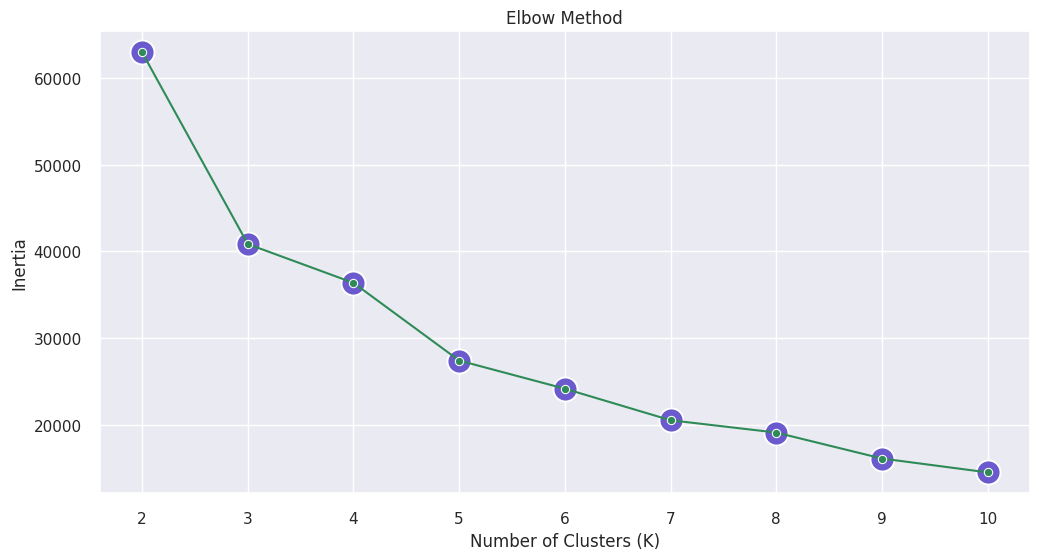

In [64]:
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(rfm_scaled_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
sns.set_style('darkgrid')
sns.lineplot(x=range(2, 11), y=inertia, marker='o', color='seagreen')
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='slateblue')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.xticks(range(2, 11))
plt.show()

Based on the elbow method, **5 clusters seems to be a reasonable choice**. Because after 5 clusters the inertia continues to decrease, but at a much slower rate.

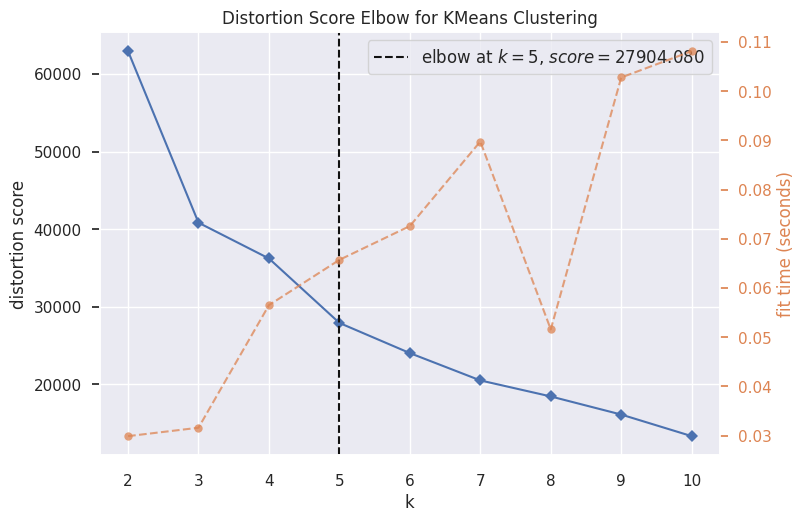

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [65]:
model = KMeans()

visualizer = KElbowVisualizer(model, k=(2,11), timings= True)
visualizer.fit(rfm_scaled_df)
visualizer.show()

The result of the score plot is show K 5 as the best and ideal choice. This suggests that adding more clusters beyond 5 may not be beneficial and could lead to overfitting.

Then we'll validate it in Silhouette Analysis below.

##### 6.3.1.2. Silhouette Analysis

In [66]:
range_n_clusters = list(range(2, 11))
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(rfm_scaled_df)
    preds = kmeans.predict(rfm_scaled_df)
    score_euclidean = silhouette_score(rfm_scaled_df, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

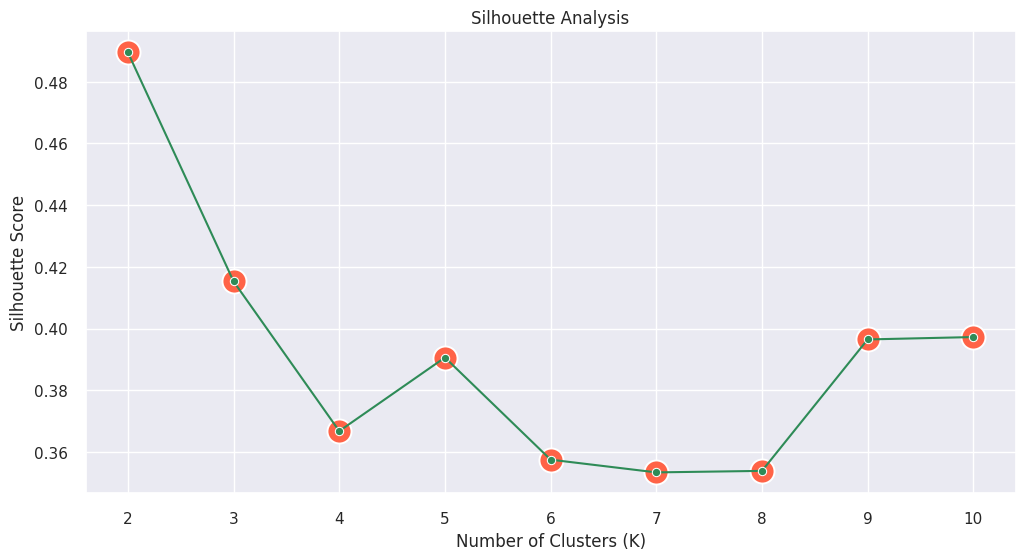

In [67]:
plt.figure(figsize=(12, 6))
sns.set_style('darkgrid')
sns.lineplot(x=range_n_clusters, y=arr_silhouette_score_euclidean, marker='o', color='seagreen')
sns.scatterplot(x=range_n_clusters, y=arr_silhouette_score_euclidean, s=300, color='tomato')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.xticks(range_n_clusters)
plt.show()

Yep, we'll choose 5 clusters to segment customers into 5 groups. Based on the plot, the highest Silhouette Score appears to be 2, 3, and 5 clusters.

Based on the Elbow Method and Silhouette Analysis suggest 5 clusters for better interpretation and more effective customer segmentation.

#### 6.3.3. Clustering with KMeans

In [68]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(rfm_scaled_df)

KMeans(n_clusters=5, random_state=0)

In [69]:
rfm_df['Cluster'] = kmeans.labels_
rfm_df.head()

Recency  Frequency  Monetary  Cluster
Customer_Id                                       
10000             24          2    293.00        4
10002            132          1    149.00        1
10004            144          1     85.00        1
10006            144          2    440.00        4
10013            227          1    159.00        2

### 6.4. Model Interpretation

#### 6.4.1. Cluster Visualization

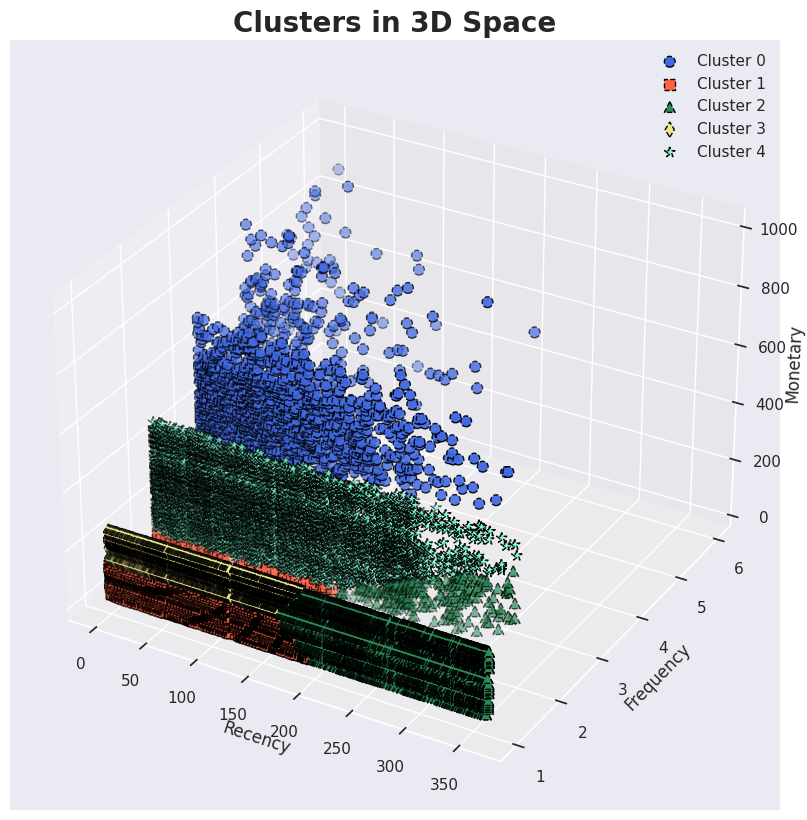

In [70]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
sns.set_style('darkgrid')

ax.scatter(rfm_df['Recency'][rfm_df.Cluster == 0], rfm_df['Frequency'][rfm_df.Cluster == 0],
           rfm_df['Monetary'][rfm_df.Cluster == 0], c='royalblue', s=60,  edgecolor='black',
           linestyle='--', marker='o')
ax.scatter(rfm_df['Recency'][rfm_df.Cluster == 1], rfm_df['Frequency'][rfm_df.Cluster == 1],
           rfm_df['Monetary'][rfm_df.Cluster == 1], c='tomato', s=60,  edgecolor='black',
           linestyle='--', marker='s')
ax.scatter(rfm_df['Recency'][rfm_df.Cluster == 2], rfm_df['Frequency'][rfm_df.Cluster == 2],
           rfm_df['Monetary'][rfm_df.Cluster == 2], c='seagreen', s=60,  edgecolor='black',
           linestyle='--', marker='^')
ax.scatter(rfm_df['Recency'][rfm_df.Cluster == 3], rfm_df['Frequency'][rfm_df.Cluster == 3],
           rfm_df['Monetary'][rfm_df.Cluster == 3], c='khaki', s=60,  edgecolor='black',
           linestyle='--', marker='d')
ax.scatter(rfm_df['Recency'][rfm_df.Cluster == 4], rfm_df['Frequency'][rfm_df.Cluster == 4],
           rfm_df['Monetary'][rfm_df.Cluster == 4], c='aquamarine', s=60,  edgecolor='black',
           linestyle='--', marker='*')

plt.title('Clusters in 3D Space', fontsize=20, fontweight='bold')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.legend(['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])
plt.show()

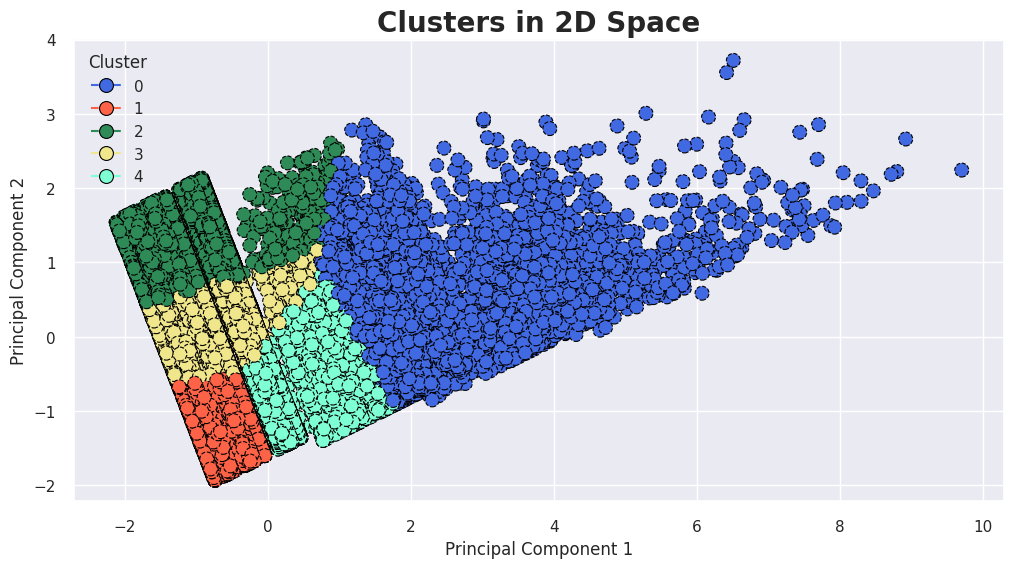

In [71]:
# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pcs = pca.fit_transform(rfm_scaled_df)

# Create the principal components df
pcs_df = pd.DataFrame(data=pcs, columns=['PC1', 'PC2'])

# Perform KMeans clustering on the principal components
kmeans = KMeans(n_clusters=5, random_state=0)
pcs_df['Cluster'] = kmeans.fit_predict(pcs_df[['PC1', 'PC2']])

plt.figure(figsize=(12, 6))
sns.set_style('darkgrid')
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pcs_df,
                palette=['royalblue', 'tomato', 'seagreen', 'khaki', 'aquamarine'],
                s=100, edgecolor='black', linestyle='--')
plt.title('Clusters in 2D Space', fontsize=20, fontweight='bold')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#### 6.4.2. Cluster Analysis

In [72]:
cluster_dist = rfm_df['Cluster'].value_counts().reset_index()
cluster_dist.columns = ['Cluster', 'Total Customers']
cluster_dist['Percentage'] = cluster_dist['Total Customers'] / cluster_dist['Total Customers'].sum() * 100

In [73]:
rfm_agg = rfm_df.groupby('Cluster').agg({
    'Recency': 'median',
    'Frequency': 'mean',
    'Monetary': 'mean'
})

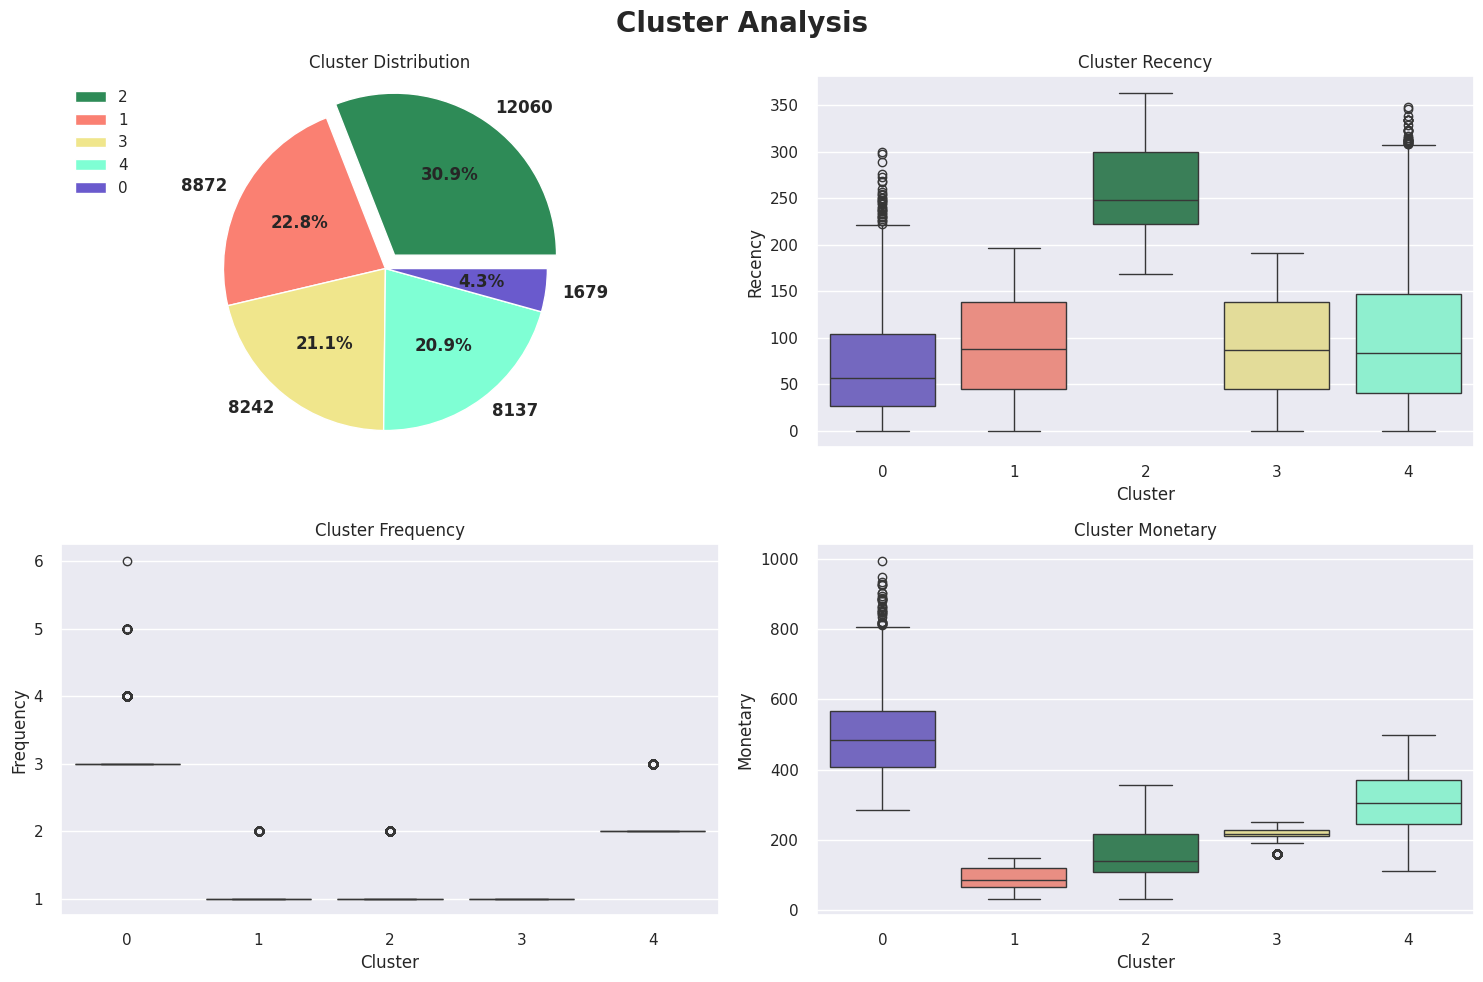

In [74]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
plt.suptitle('Cluster Analysis', fontsize=20, fontweight='bold', ha='center')
sns.set_theme()

# Cluster Distribution
cluster_colors = {
    0: 'slateblue',
    1: 'salmon',
    2: 'seagreen',
    3: 'khaki',
    4: 'aquamarine'
}
colors = [cluster_colors[cluster] for cluster in cluster_dist['Cluster']]
labels = cluster_dist['Total Customers'].astype(str)
explode = [0.1, 0, 0, 0, 0]
axs[0, 0].pie(cluster_dist['Total Customers'], labels=labels, autopct='%1.1f%%',
              colors=colors, explode=explode, textprops={'fontsize': 12, 'fontweight': 'bold'})
axs[0, 0].set_title('Cluster Distribution')
axs[0, 0].axis('equal')
axs[0, 0].legend(labels=cluster_dist['Cluster'], loc='upper left')

# Cluster Recency
sns.boxplot(x='Cluster', y='Recency', data=rfm_df, ax=axs[0,1],
            palette=['slateblue', 'salmon', 'seagreen', 'khaki', 'aquamarine'])
axs[0,1].set_title('Cluster Recency')
axs[0,1].set_xlabel('Cluster')
axs[0,1].set_ylabel('Recency')

# Cluster Frequency
sns.boxplot(x='Cluster', y='Frequency', data=rfm_df, ax=axs[1,0],
            palette=['slateblue', 'salmon', 'seagreen', 'khaki', 'aquamarine'])
axs[1,0].set_title('Cluster Frequency')
axs[1,0].set_xlabel('Cluster')
axs[1,0].set_ylabel('Frequency')

# Cluster Monetary
sns.boxplot(x='Cluster', y='Monetary', data=rfm_df, ax=axs[1,1],
            palette=['slateblue', 'salmon', 'seagreen', 'khaki', 'aquamarine'])
axs[1,1].set_title('Cluster Monetary')
axs[1,1].set_xlabel('Cluster')
axs[1,1].set_ylabel('Monetary')

plt.tight_layout()
plt.show()

In [75]:
perc = [0.1,0.2,0.3,00.4,0.5,0.6,0.7,0.8,0.9]
rfm_df[['Recency', 'Frequency', 'Monetary']].describe(percentiles=perc)

Recency  Frequency  Monetary
count 38990.00   38990.00  38990.00
mean    143.12       1.32    200.36
std      96.36       0.58    116.62
min       0.00       1.00     33.00
10%      23.00       1.00     70.00
20%      48.00       1.00    109.00
30%      72.00       1.00    122.00
40%      99.00       1.00    159.00
50%     133.00       1.00    207.00
60%     163.00       1.00    218.00
70%     198.00       1.00    228.00
80%     236.00       2.00    250.00
90%     287.00       2.00    354.10
max     363.00       6.00    994.00

In [76]:
rfm_agg

Recency  Frequency  Monetary
Cluster                              
0          56.00       3.17    499.19
1          88.00       1.01     93.30
2         248.00       1.02    153.37
3          87.00       1.00    216.71
4          83.00       2.02    308.53

In [77]:
cluster_dist.sort_values(by='Cluster', ascending=True)

Cluster  Total Customers  Percentage
4        0             1679        4.31
1        1             8872       22.75
0        2            12060       30.93
2        3             8242       21.14
3        4             8137       20.87

Here's a breakdown of the clusters and their potential customer segments based on percentiles to rank the customers based on the RFM metrics to identify strong or weak behavior patterns:

---
**Cluster 0: High recency, high frequency, high monetary**
  * `Distribution (4.31%):` Minority cluster with 1.679 customers.
  * `Recency (around 20%):` However, these customers have purchased very recently.
  * `Frequency (above 90%):` They purchase very frequently.
  * `Monetary (above 90%):` They spend a significant high amount of money.

Yeay, Cluster 0 represents the best customers, our `Champions Customers`, they are the company's most valuable assets. They purchase frequently, spend a lot of money, and have made purchases very recently.

---

**Cluster 1: Moderate recency, moderate frequency, low monetary**
  * `Distribution (22.75%):` 8.872 customers.
  * `Recency (around 30%):` Customers who had made purchased somewhat recently too.
  * `Frequency (50%)`: Their purchase frequency is moderate.
  * `Monetary (around 20%)`: They spend a small amount of money.

It represents the `Need Attention Customers`.	These customers have purchased recently but have only made one purchase. They need encouragement for repeat purchases and more spending.

---

**Cluster 2: Low recency, low frequency, low monetary**
  * `Distribution (30.93%):` Dominant clusters with 12.060 customers.
  * `Recency (above 80%):` Customers who hadn't made purchased in a long time.
  * `Frequency (50%):` Their purchase frequency is only 1 transactions.
  * `Monetary (30%):` They only spend a small amount of money when they make a purchase.

Very clear, it represents the `At-Risk/Lost Customers`. They haven't purchased recently and might be churned. It's the biggest problem for business.

---

**Cluster 3: Moderate recency, moderate frequency, moderate monetary**
  * `Distribution (21.14%):` 8.242 customers.
  * `Recency (around 30%):` Customers who had made purchases relatively recently.
  * `Frequency (around 50%):` They purchase frequently.
  * `Monetary (around 50%):` They spend a slightly good amount of money.

It represents the `Promising Customers`. They have a moderate purchasing history but haven't purchased recently. Treat them well then I promise they will be loyal.

---

**Cluster 4: Moderate recency, high frequency, high monetary**
  * `Distribution (20.87%):` 8.137 customers.
  * `Recency (around 30%):` Customers who had made purchases relatively recently.
  * `Frequency (above 80%):` They purchase very frequently.
  * `Monetary (around 80%):` They spend a significant amount of money.

  This cluster aligns with the `Loyal Customers`, as they have a high purchase frequency and high spending, even though their recent activity is moderate.

  ---

In [78]:
segment_mapping = {
    0: 'Champions',
    1: 'Need Attention',
    2: 'At-Risk/Lost',
    3: 'Promising',
    4: 'Loyal'}
rfm_df['Customer_Segment'] = rfm_df['Cluster'].map(segment_mapping)
rfm_df.head()

Recency  Frequency  Monetary  Cluster Customer_Segment
Customer_Id                                                        
10000             24          2    293.00        4            Loyal
10002            132          1    149.00        1   Need Attention
10004            144          1     85.00        1   Need Attention
10006            144          2    440.00        4            Loyal
10013            227          1    159.00        2     At-Risk/Lost

In [84]:
rfm_df.reset_index(inplace=True)
df = pd.merge(df, rfm_df[['Customer_Id','Recency', 'Frequency', 'Monetary', 'Customer_Segment']],
              on='Customer_Id', how='left')

In [86]:
df.head()

Order_Date      Time  Aging Customer_Id  Gender Device_Type  \
0 2018-01-02  10:56:33   8.00       37077  Female         Web   
1 2018-07-24  20:41:37   2.00       59173  Female         Web   
2 2018-11-08  08:38:49   8.00       41066  Female         Web   
3 2018-04-18  19:28:06   7.00       50741  Female         Web   
4 2018-08-13  21:18:39   9.00       53639  Female         Web   

  Customer_Login_type    Product_Category            Product  Sales  Quantity  \
0              Member  Auto & Accessories  Car Media Players 140.00      1.00   
1              Member  Auto & Accessories       Car Speakers 211.00      1.00   
2              Member  Auto & Accessories    Car Body Covers 117.00      5.00   
3              Member  Auto & Accessories    Car & Bike Care 118.00      1.00   
4              Member  Auto & Accessories               Tyre 250.00      1.00   

   Discount  Profit  Shipping_Cost Order_Priority Payment_method  Year  \
0      0.30   46.00           4.60         Medium    credit_card  2018   
1      0.30  112.00          11.20         Medium    credit_card  2018   
2      0.10   31.20           3.10       Critical    credit_card  2018   
3      0.30   26.20           2.60           High    credit_card  2018   
4      0.30  160.00          16.00       Critical    credit_card  2018   

   Quarter  Month  Week  Day_of_Week  Day  Hour ParetoCustValue  \
0        1      1     1            1    2    10             Low   
1        3      7    30            1   24    20            High   
2        4     11    45            3    8     8             Low   
3        2      4    16            2   18    19             Low   
4        3      8    33            0   13    21            High   

  ParetoProdValue  Profit_Margin  Recency  Frequency  Monetary  \
0             Mid          32.86      362          1    140.00   
1             Top          53.08      159          1    211.00   
2             Low          26.67       52          1    117.00   
3             Low          22.20      256          1    118.00   
4             Top          64.00      139          1    250.00   

  Customer_Segment  
0     At-Risk/Lost  
1        Promising  
2   Need Attention  
3     At-Risk/Lost  
4        Promising

## 7. Conclusion

**To summarize, Kestrel E-commerce has identified key areas for improvement, including customer retention, product performance, and targeted marketing strategies.**

* Kestrel E-commerce's sales performance and profit gained have been quite volatile and has a positive trend throughout the year.

* However, they have a problem with low rate of customer retention. The average of frequency orders per customer during the year is only 1-2 times. It’ll be validated by the dominance of At-Risk/Lost Customers in segmentation.

* 59% of customers contribute 80% of sales where they have high to moderate spending purchase throughout the year and it could be the High-Value customers. And only 36% of products perform well, boosting 80% of profit by year, meanwhile low-performing products like Mouse, Watch, Keyboard needs evaluation to sell better.

* There are 5 Clusters of Customers based on RFM/Spending Profile
  1. At-Risk/Lost Customers 30.93%
  2. Need Attention Customers 22.75%
  3. Promising Customers 21.14%
  4. Loyal Customers 20.87%
  5. Champions Customers 4.31%

### Recommendation

Key Takeaways to Boost Sales:

* **Peak Seasons:** Launch major campaigns, offer discounts, and run festive promotions.
* **Off-Peak Seasons:** Stimulate demand with targeted promotions and clearance sales.
* **Day-of-Week and Time-of-Day:** Optimize marketing efforts and offers for peak times.
* **Seasonal Stock Planning:** Adjust inventory levels to meet demand fluctuations.
* **Demand Forecasting:** Utilize historical data to accurately forecast future demand.

Improve Customer Retention Strategies:

* **Personalized Marketing:** Target specific customer segments with tailored campaigns.
* **Enhanced Customer Experience:** Improve website usability, customer service, and brand interactions.
* **Loyalty Programs:** Reward repeat purchases with points, discounts, or exclusive offers.
* **Product and Service Innovation:** Continuously introduce new offerings and incorporate customer feedback.


Optimize Resource allocation and Improve Profitability:

* **Identify High-Value Customers:** Focus on the top 59% of customers who drive 80% of sales.
* **Personalized Marketing:** Tailor marketing efforts to the needs and preferences of high-value customers.
* **Prioritize Top-Performing Products:** Concentrate on the 36% of products that generate 80% of profit.
* **Product Line Review:** Evaluate the performance of low-performing products and consider discontinuing or rebranding them.


Based on the analysis, the marketing team can develop targeted marketing strategies for each customer segment:

* `At-Risk/Lost Customers`:
  * Win-Back Campaigns: Offer limited-time discounts or special promotions.
  * Personalized Communication: Reach out with a sincere apology and offer to resolve any issues.
  * Re-Engagement: Send targeted emails or WhatsApp highlighting new products or promotions.
  * Social Media Engagement: Interact with them on social media to rekindle interest.
* `Need Attention`:
  * Also personalized campaigns: email or WhatsApp highlighting new products or special offers.
  * Social Media Engagement: Address campaigns to spark interest.
  * Offer tiered rewards based on purchase frequency.
  * Implement a subscription model for repeat purchases.
* `Promising`:
  * Targeted Marketing: Use email marketing and WhatsApp to promote relevant products.
  * Cross-Selling and Upselling: Suggest complementary products or higher-tier options.
  * Personalized Offers: Offer discounts or special deals to incentivize repeat purchases.
  * Customer Surveys: Gather feedback to understand their needs and preferences.
* `Loyal Customers`:
  * Personalized Marketing: Utilize data to tailor promotions and offers.
  * Loyalty Programs: Implement tiered loyalty programs with exclusive rewards.
  * Customer Advocacy: Encourage customer reviews and referrals.
  * Early Access: Provide early access to new products or sales.
* `Champions`:
  * VIP Treatment: Provide exceptional customer service and exclusive benefits.
  * Co-Creation: Involve them in product development or marketing campaigns.
  * Personalized Experiences: Tailor experiences to their individual preferences.
  * Exclusive Events: Invite them to special events or product launches.